<a href="https://colab.research.google.com/github/Tejas-Chaudhari-007/EE-769-Introduction-to-Machine-Learning/blob/main/Assignments/Assignment_1_Q_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment details

Assignment number: 1 (Q.2)

Course: EE 769 (Introduction to Machine Learning)

Instructor: [Prof. Amit Sethi](https://www.ee.iitb.ac.in/~asethi/)

Student name: Tejas Chaudhari

Student roll number: 10D110017


# Assignment questions

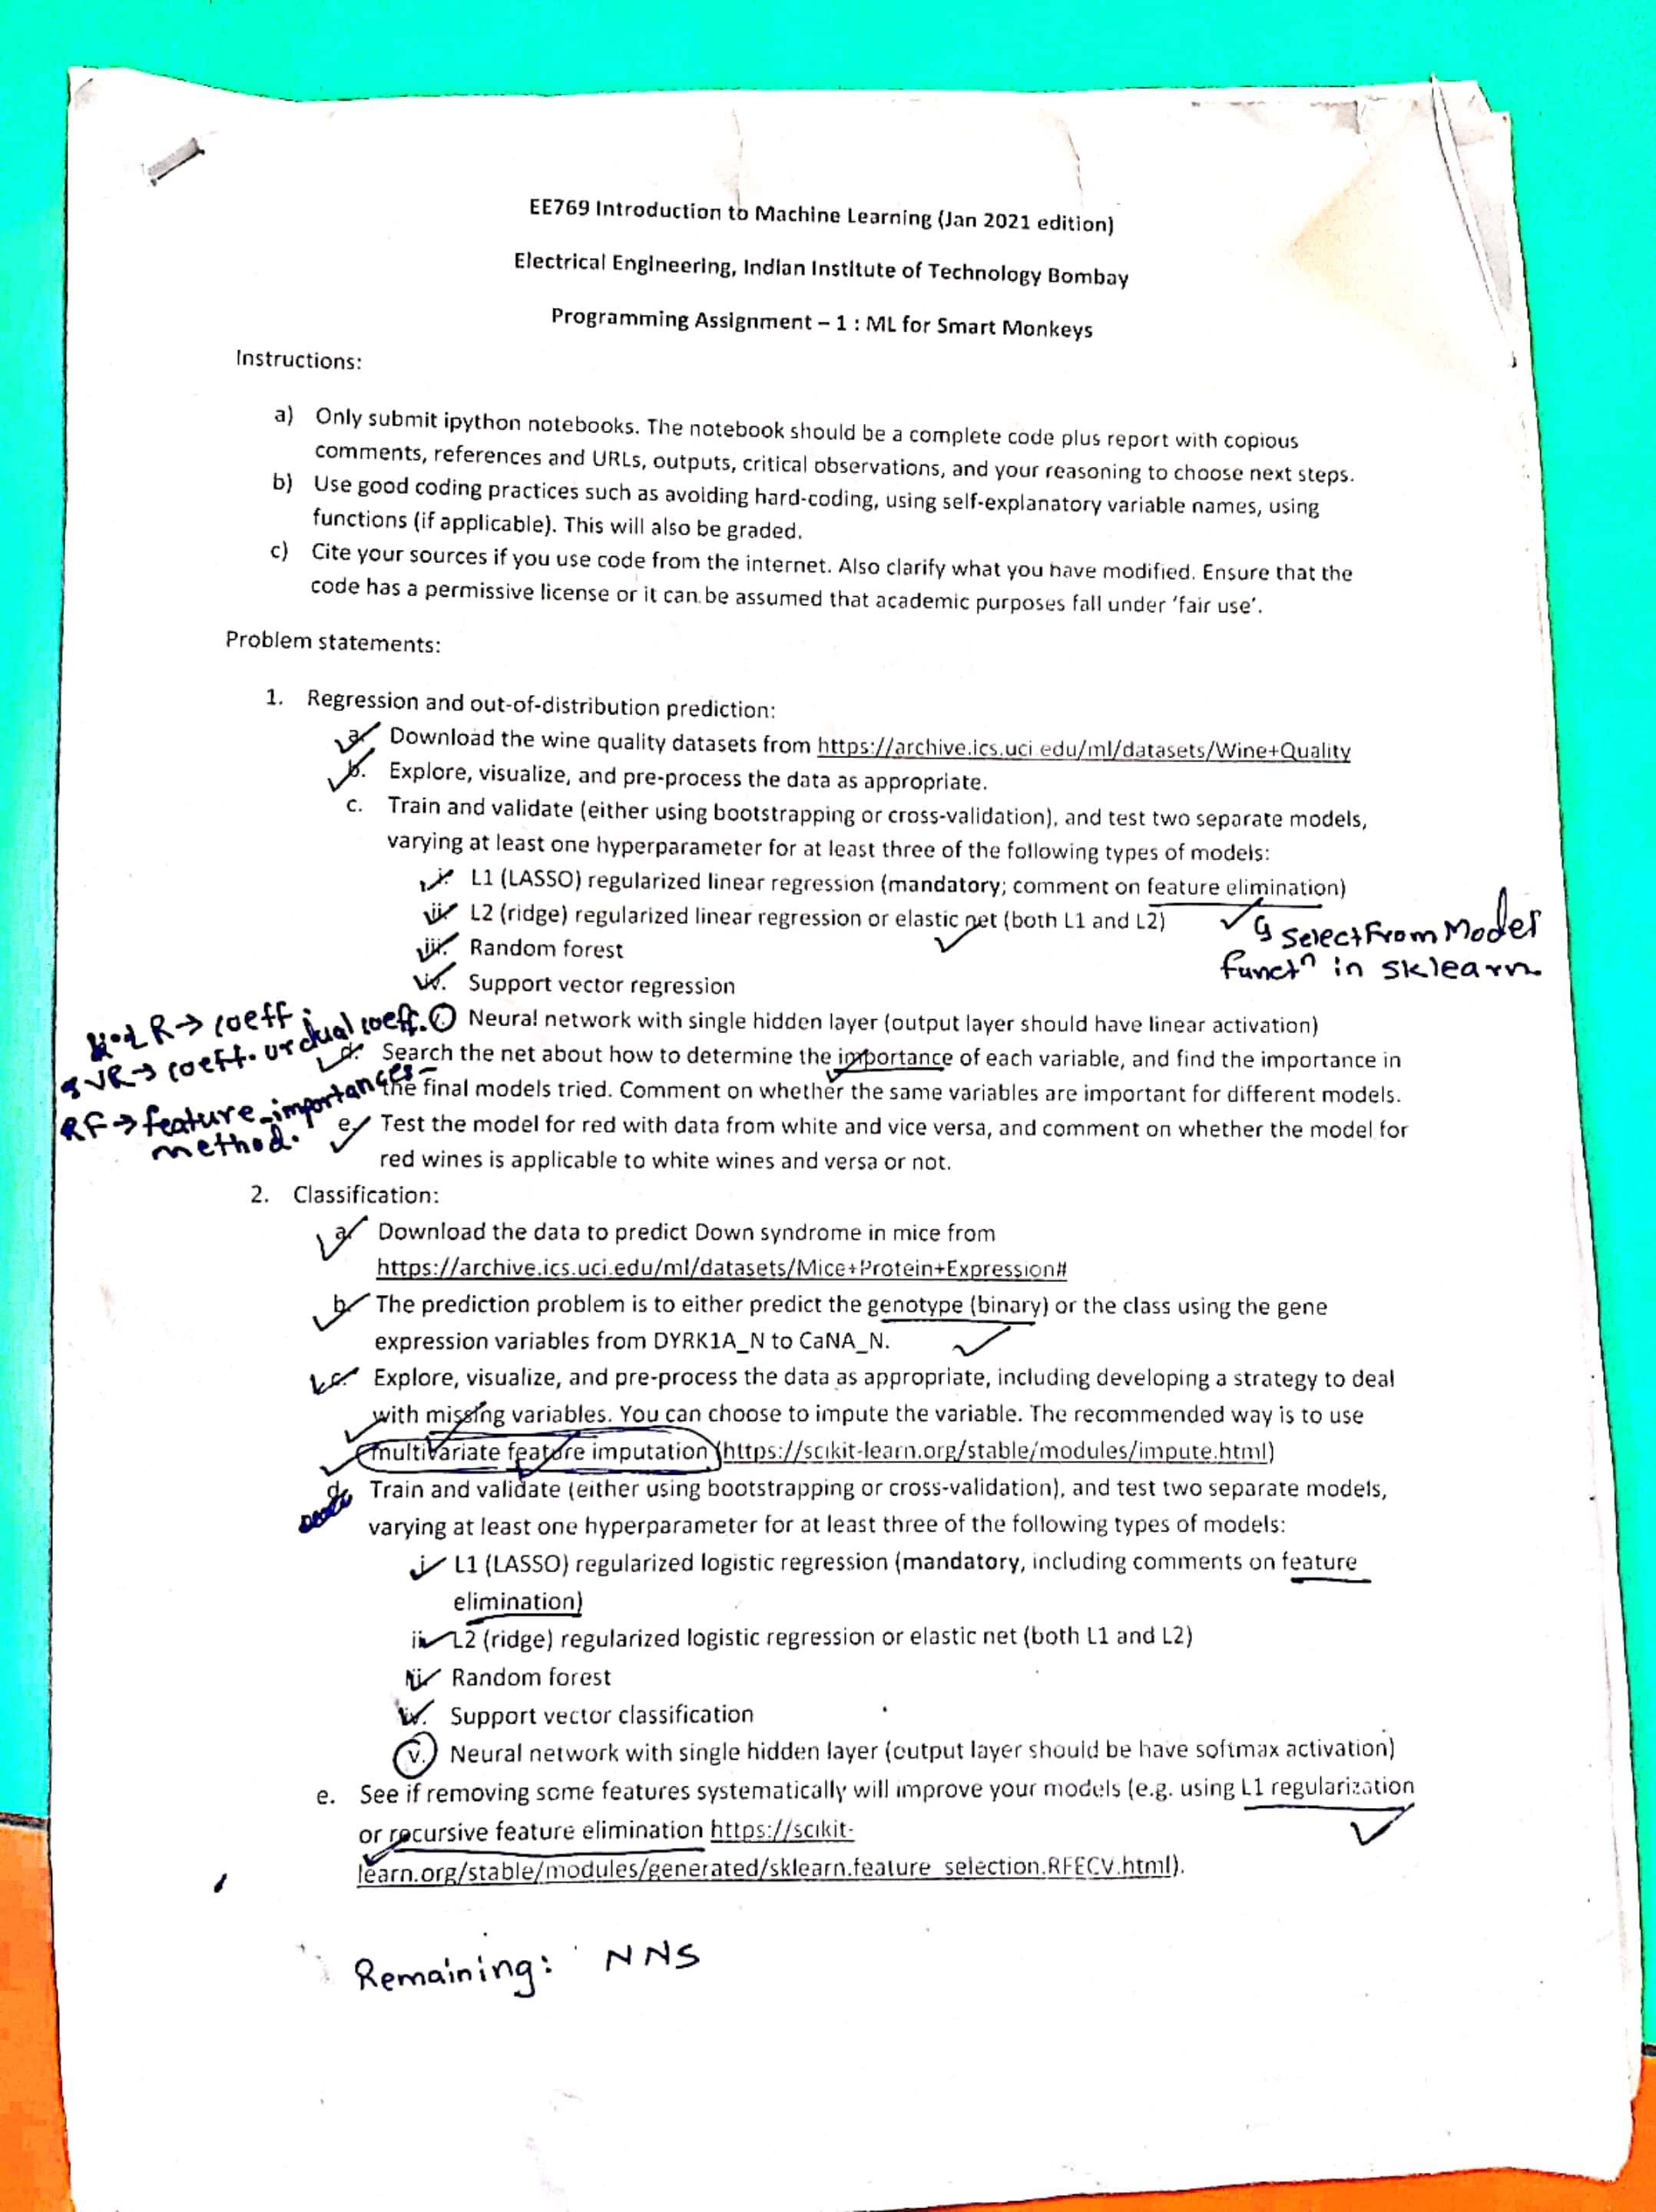

# Upload data files

In [ ]:
from google.colab import files  # Colab-specific library to load files

# Upload both train and test files
uploaded_files = files.upload()  # Its a dictionary with file names as keys 

# Print name and size of uploaded files for confirmation
for file_name in uploaded_files.keys():
  file_size = len(uploaded_files[file_name])
  print(f'You have uploaded file {file_name} with {round(file_size/10**6, 3)} MB')

Saving Data_Cortex_Nuclear.xls to Data_Cortex_Nuclear.xls
You have uploaded file Data_Cortex_Nuclear.xls with 1.629 MB


# Data Set Information:


The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. There are 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per sample/mouse. Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. The dataset contains a total of 1080 measurements per protein. Each measurement can be considered as an independent sample/mouse.

The eight classes of mice are described based on features such as genotype, behavior and treatment. According to genotype, mice can be control or trisomic. According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not.

Classes:
c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)

t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)
t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

The aim is to identify subsets of proteins that are discriminant between the classes.

# Preliminary data processing

## Read data

In [ ]:
# Data manipulations libraries
import pandas as pd
import numpy as np

# Read the data as pandas dataframe
as_read_data_df = pd.read_excel('/content/Data_Cortex_Nuclear.xls') 
# Note that the file is of 'xls' format so '.read_excel' was used
display(as_read_data_df)

MouseID  DYRK1A_N   ITSN1_N  ...  Treatment  Behavior   class
0        309_1  0.503644  0.747193  ...  Memantine       C/S  c-CS-m
1        309_2  0.514617  0.689064  ...  Memantine       C/S  c-CS-m
2        309_3  0.509183  0.730247  ...  Memantine       C/S  c-CS-m
3        309_4  0.442107  0.617076  ...  Memantine       C/S  c-CS-m
4        309_5  0.434940  0.617430  ...  Memantine       C/S  c-CS-m
...        ...       ...       ...  ...        ...       ...     ...
1075  J3295_11  0.254860  0.463591  ...     Saline       S/C  t-SC-s
1076  J3295_12  0.272198  0.474163  ...     Saline       S/C  t-SC-s
1077  J3295_13  0.228700  0.395179  ...     Saline       S/C  t-SC-s
1078  J3295_14  0.221242  0.412894  ...     Saline       S/C  t-SC-s
1079  J3295_15  0.302626  0.461059  ...     Saline       S/C  t-SC-s

[1080 rows x 82 columns]

Observations:
1. 1080 total samples and 82 columns (81 input variables and 1 output class variable) 

## Checking data types

In [ ]:
as_read_data_df.dtypes

MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 82, dtype: object

In [ ]:
as_read_data_df.dtypes.value_counts()

float64    77
object      5
dtype: int64

Observations:
1. 77 numerical variables (float64)
2. 5 categorical variables (object/string)

### Check unique values in columns
1. High number of unique values - contious variable
2. Low number of unique values - discrete variable


In [ ]:
pd.set_option('display.max_rows', None) # Display all rows
display(as_read_data_df.nunique())
pd.reset_option('all')

MouseID            1080
DYRK1A_N           1077
ITSN1_N            1076
BDNF_N             1077
NR1_N              1077
NR2A_N             1077
pAKT_N             1076
pBRAF_N            1075
pCAMKII_N          1077
pCREB_N            1077
pELK_N             1077
pERK_N             1077
pJNK_N             1076
PKCA_N             1077
pMEK_N             1077
pNR1_N             1077
pNR2A_N            1077
pNR2B_N            1077
pPKCAB_N           1077
pRSK_N             1077
AKT_N              1077
BRAF_N             1077
CAMKII_N           1077
CREB_N             1073
ELK_N              1062
ERK_N              1077
GSK3B_N            1077
JNK_N              1077
MEK_N              1072
TRKA_N             1075
RSK_N              1074
APP_N              1077
Bcatenin_N         1062
SOD1_N             1077
MTOR_N             1077
P38_N              1075
pMTOR_N            1077
DSCR1_N            1077
AMPKA_N            1075
NR2B_N             1077
pNUMB_N            1077
RAPTOR_N        


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/usr/local/lib/python3.7/dist-packages/pandas/_config/config.py:622: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


Observations:
1. All input variables have very large number of unique values and hence can be considered as continuous numerical
2. Output variables have less number of unique values.

### Check unique values in target column
Note:
1. In this report 'Genotype' has been considered as the target column. So its a binary classification problem

In [ ]:
as_read_data_df['Genotype'].unique()

array(['Control', 'Ts65Dn'], dtype=object)

Observations:
1. Genotype as 2 classes: 'Control', 'Ts65Dn'

## Examine missing values


In [ ]:
# Detect missing values
display(as_read_data_df.isnull()) # Dataframe of booleans

# Get boolean series of columns with True if missing value is present 
display(as_read_data_df.isnull().any()) # .any() returns whether any element is True, potentially over an axis.

# Get column names with missing values
columns_with_missing_values_list = as_read_data_df.columns[as_read_data_df.isnull().any()]
print('Columns with missing values: ', columns_with_missing_values_list)

# Data types of columns with missing values
as_read_data_df[columns_with_missing_values_list].dtypes.value_counts() # value_counts() returns a Series containing counts of unique values.

MouseID  DYRK1A_N  ITSN1_N  BDNF_N  ...  Genotype  Treatment  Behavior  class
0       False     False    False   False  ...     False      False     False  False
1       False     False    False   False  ...     False      False     False  False
2       False     False    False   False  ...     False      False     False  False
3       False     False    False   False  ...     False      False     False  False
4       False     False    False   False  ...     False      False     False  False
...       ...       ...      ...     ...  ...       ...        ...       ...    ...
1075    False     False    False   False  ...     False      False     False  False
1076    False     False    False   False  ...     False      False     False  False
1077    False     False    False   False  ...     False      False     False  False
1078    False     False    False   False  ...     False      False     False  False
1079    False     False    False   False  ...     False      False     False  False

[1080 rows x 82 columns]

MouseID      False
DYRK1A_N      True
ITSN1_N       True
BDNF_N        True
NR1_N         True
             ...  
CaNA_N       False
Genotype     False
Treatment    False
Behavior     False
class        False
Length: 82, dtype: bool

Columns with missing values:  Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'BAD_N', 'BCL2_N', 'pCFOS_N',
       'H3AcK18_N', 'EGR1_N', 'H3MeK4_N'],
      dtype='object')


float64    49
dtype: int64

Observations:
1. There are 49 columns with missing values and all of them are of data type 'float64'.

### Missing values table function

In [ ]:
# Function to calculate missing values
# Source code of missing values table function - https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction 
def missing_values_table(df):
        # Total missing values
        n_mising_values_list = df.isnull().sum()
        
        # Percentage of missing values
        missing_values_percent_list = 100 * df.isnull().sum() / len(df) # len(df) is total number of rows
        
        # Make a table with the results
        missing_values_table = pd.concat([n_mising_values_list, missing_values_percent_list], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = missing_values_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Missing Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Missing Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
# Use the function to get number and % of missing values per variable
missing_values_df = missing_values_table(as_read_data_df)

# Display missing values dataframe
display(missing_values_df)

Your selected dataframe has 82 columns.
There are 49 columns that have missing values.


Missing Values  % of Missing Values
BCL2_N                 285                 26.4
H3MeK4_N               270                 25.0
BAD_N                  213                 19.7
EGR1_N                 210                 19.4
H3AcK18_N              180                 16.7
pCFOS_N                 75                  6.9
ELK_N                   18                  1.7
Bcatenin_N              18                  1.7
MEK_N                    7                  0.6
P38_N                    3                  0.3
TRKA_N                   3                  0.3
RSK_N                    3                  0.3
APP_N                    3                  0.3
SOD1_N                   3                  0.3
MTOR_N                   3                  0.3
AMPKA_N                  3                  0.3
pMTOR_N                  3                  0.3
DSCR1_N                  3                  0.3
GSK3B_N                  3                  0.3
NR2B_N                   3                  0.3
pNUMB_N                  3                  0.3
RAPTOR_N                 3                  0.3
TIAM1_N                  3                  0.3
pP70S6_N                 3                  0.3
JNK_N                    3                  0.3
DYRK1A_N                 3                  0.3
ITSN1_N                  3                  0.3
pJNK_N                   3                  0.3
BDNF_N                   3                  0.3
NR1_N                    3                  0.3
NR2A_N                   3                  0.3
pAKT_N                   3                  0.3
pBRAF_N                  3                  0.3
pCAMKII_N                3                  0.3
pCREB_N                  3                  0.3
pELK_N                   3                  0.3
pERK_N                   3                  0.3
PKCA_N                   3                  0.3
CREB_N                   3                  0.3
pMEK_N                   3                  0.3
pNR1_N                   3                  0.3
pNR2A_N                  3                  0.3
pNR2B_N                  3                  0.3
pPKCAB_N                 3                  0.3
pRSK_N                   3                  0.3
AKT_N                    3                  0.3
BRAF_N                   3                  0.3
CAMKII_N                 3                  0.3
ERK_N                    3                  0.3

Observations:
1. 49 columns have missing values.
2. Highest percentage of missing values in a column is 26.4%.

## Missing value imputation

Useful resource:
1. https://scikit-learn.org/stable/modules/impute.html

Note:
1. One type of imputation algorithm is univariate, which imputes values in the i-th feature dimension using only non-missing values in that feature dimension (e.g. impute.SimpleImputer).
2. By contrast, multivariate imputation algorithms use the entire set of available feature dimensions to estimate the missing values (e.g. impute.IterativeImputer). This estimator is still experimental for now.

### 1. Using sklearn SimpleImputer (univariate imputation)

1. You can use Sklearn.impute class SimpleImputer to impute/replace missing values for both numerical and categorical features.
2. For numerical missing values, a strategy such as mean, median, most frequent, and constant can be used.
3. For categorical features, a strategy such as the most frequent and constant can be used.

In [ ]:
# Import the imputer class
from sklearn.impute import SimpleImputer # https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer

# Define the imputer instance(object) using the imported imputer class
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 

# Subset the dataframe with columns containing missing values
numerical_data_with_missing_values_df =  as_read_data_df[as_read_data_df.columns[as_read_data_df.isnull().any()]]
# Above step is done because the imputer with mean strategy gives error if dataframe contains str columns

# Fit the imputer instance
fitted_simple_imputer = simple_imputer.fit(numerical_data_with_missing_values_df)

# Fill the missing values
simple_imputed_data_array = fitted_simple_imputer.transform(numerical_data_with_missing_values_df)

# Change the imputed data numpy array to pandas dataframe
simple_imputed_numerical_data_df = pd.DataFrame(simple_imputed_data_array, columns=numerical_data_with_missing_values_df.columns)

# Merge the imputed dataframe with the original
## Initiate impuated data dataframe
simple_imputed_data_df = as_read_data_df.copy(deep=True) # Modifying the copy does not affect original if deep=True
## Update the imputed data df with the imputed
simple_imputed_data_df.update(simple_imputed_numerical_data_df)  # .update(): Modify in place using non-NA values from another DataFrame.

# Display imputed dataframe
display(simple_imputed_data_df)

# Confirm the imputation
missing_values_table(simple_imputed_data_df)

MouseID  DYRK1A_N   ITSN1_N  ...  Treatment  Behavior   class
0        309_1  0.503644  0.747193  ...  Memantine       C/S  c-CS-m
1        309_2  0.514617  0.689064  ...  Memantine       C/S  c-CS-m
2        309_3  0.509183  0.730247  ...  Memantine       C/S  c-CS-m
3        309_4  0.442107  0.617076  ...  Memantine       C/S  c-CS-m
4        309_5  0.434940  0.617430  ...  Memantine       C/S  c-CS-m
...        ...       ...       ...  ...        ...       ...     ...
1075  J3295_11  0.254860  0.463591  ...     Saline       S/C  t-SC-s
1076  J3295_12  0.272198  0.474163  ...     Saline       S/C  t-SC-s
1077  J3295_13  0.228700  0.395179  ...     Saline       S/C  t-SC-s
1078  J3295_14  0.221242  0.412894  ...     Saline       S/C  t-SC-s
1079  J3295_15  0.302626  0.461059  ...     Saline       S/C  t-SC-s

[1080 rows x 82 columns]

Your selected dataframe has 82 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Missing Values]
Index: []

Observations:
1. Imputation was succesful.

Note:
1. Strategies 'most_frequent' and 'constant' works on numerical as well as string(categorical) data.
2. Strategies 'mean' and 'median' works on only numerical data.

### 2. Using my function for imputation of numerical columns (univariate numerical imputation)

In [ ]:
def my_numerical_imputer(data_df, strategy): # stragey: 'mean' or 'median'
    imputed_data_df = data_df.copy(deep=True) # Modifying the copy does not affect original if deep=True
    for column_name in imputed_data_df.columns.values: # Iterate over all columns in the dataframe
        if imputed_data_df[column_name].isna().any() == True:  # If the column contains any missing value
            if imputed_data_df[column_name].dtype == 'float64' or imputed_data_df[column_name].dtype == 'int64': # If the column is numerical
                imputed_data_df[column_name][imputed_data_df[column_name].isna()] = imputed_data_df[column_name].agg(func=strategy)
    
    return imputed_data_df

my_imputed_data_df = my_numerical_imputer(as_read_data_df, strategy='mean')

# Confirmation of missing value imputation
missing_values_table(my_imputed_data_df)

Your selected dataframe has 82 columns.
There are 0 columns that have missing values.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Empty DataFrame
Columns: [Missing Values, % of Missing Values]
Index: []

### Using sklearn IterativeImputer (multivariate imputation)
1. A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation.
2. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X.
3. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

Source - https://scikit-learn.org/stable/modules/impute.html

In [ ]:
# Import the imputer class
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create imputer instance using the IterativeImputer class
iterative_imputer = IterativeImputer(max_iter=10, random_state=7)

# Get numeric columns in the as read data 
as_read_numeric_data_df = as_read_data_df.select_dtypes(['int64', 'float64'])

# Fit the imputer on the as read data
fitted_iterative_imputer = iterative_imputer.fit(as_read_numeric_data_df)

# Impute the as read data
numeric_imputed_data_array = fitted_iterative_imputer.transform(as_read_numeric_data_df)

# Convert the numpy array to dataframe
numeric_imputed_data_df = pd.DataFrame(numeric_imputed_data_array, columns=as_read_numeric_data_df.columns) 

# Create a deep copy of as read dataframe to store the imputed data
imputed_data_df = as_read_data_df.copy(deep=True) # Modifications are independent

# Update the copy of as read data(imputed_data_df) with the numeric imputed data
imputed_data_df.update(other=numeric_imputed_data_df)

# Confirmation of imputation
display(missing_values_table(imputed_data_df))  

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


Your selected dataframe has 82 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Missing Values]
Index: []

Observations:
1. Iterative imputer did not work with values with string data type so numeric data was taken for imputing.

## Encoding
1. A machine learning model unfortunately cannot deal with categorical variables (except for some models such as LightGBM). Therefore, we have to find a way to encode (represent) these variables as numbers before handing them off to the model.
2. Label encoding: assign each unique category in a categorical variable with an integer. No new columns are created.
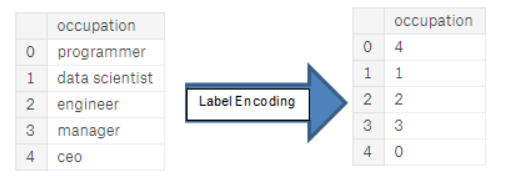
3. One-hot encoding: create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.
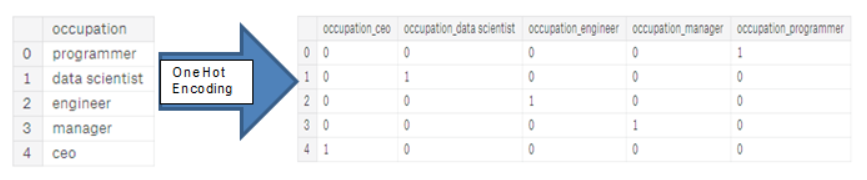

Source - https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

1. **sklearn.preprocessing.LabelEncoder**:
Encode target labels with value between 0 and n_classes-1.

This transformer should be used to encode target values, i.e. y, and not the input X

2. **sklearn.preprocessing.OrdinalEncoder**:
Encode categorical features as an integer array.

The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are converted to ordinal integers. This results in a single column of integers (0 to n_categories - 1) per feature.

3. **sklearn.preprocessing.OneHotEncoder**:
Encode categorical features as a one-hot numeric array.

By default, the encoder derives the categories based on the unique values in each feature. Alternatively, you can also specify the categories manually.

This encoding is needed for feeding categorical data to many scikit-learn estimators, notably **linear models** and **SVMs with the standard kernels**.

**Note**: a one-hot encoding of y labels should use a **LabelBinarizer** instead.

Source - sklearn documentation


Categorical variables can be nominal or ordinal
1. A nominal variable is a categorical variable where its data does not follow a logical ordering. Some examples of nominal data include:
*   Gender (Male or female)
*   Blood type (A, B, AB or O)
*   Political party (Democratic or Republican)

2. An ordinal variable, on the other hand, is also a categorical variable except its data follows a logical ordering. Some examples of ordinal data include:
*   Socioeconomic status (low income, middle income or high income)
*   Education level (high school, bachelor’s degree, master’s degree or PhD)
*   Satisfaction rating (extremely dislike, dislike, neutral, like or extremely like)


Source- https://towardsdatascience.com/guide-to-encoding-categorical-features-using-scikit-learn-for-machine-learning-5048997a5c79

Useful resource:
1. https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

### Get columns with object(string) data type

In [ ]:
# # Boolean list(series) of whether the columns are object or not
imputed_data_df.dtypes=='object' 

# List of columns with object data type
categorical_columns_list = imputed_data_df.columns[imputed_data_df.dtypes=='object']
print('List of columns with object data type: ')
print(categorical_columns_list)
print('--'*50)

# Subset of dataframe with object columns
display('Categorical columns: ', imputed_data_df[categorical_columns_list])

List of columns with object data type: 
Index(['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class'], dtype='object')
----------------------------------------------------------------------------------------------------


'Categorical columns: '

MouseID Genotype  Treatment Behavior   class
0        309_1  Control  Memantine      C/S  c-CS-m
1        309_2  Control  Memantine      C/S  c-CS-m
2        309_3  Control  Memantine      C/S  c-CS-m
3        309_4  Control  Memantine      C/S  c-CS-m
4        309_5  Control  Memantine      C/S  c-CS-m
...        ...      ...        ...      ...     ...
1075  J3295_11   Ts65Dn     Saline      S/C  t-SC-s
1076  J3295_12   Ts65Dn     Saline      S/C  t-SC-s
1077  J3295_13   Ts65Dn     Saline      S/C  t-SC-s
1078  J3295_14   Ts65Dn     Saline      S/C  t-SC-s
1079  J3295_15   Ts65Dn     Saline      S/C  t-SC-s

[1080 rows x 5 columns]

### Target column encoding

We have multiple output columns which could be considered for classification problem:
1. Genotype
2. Treatment
3. Behavior
4. class

In [ ]:
# Import target label encoder
from sklearn.preprocessing import LabelEncoder


# define function for encoding multiple target columns
def encode_target_columns(data_df, y_column_names_list):
    # Initialize encoded dataframe which will be returned from this function
    encoded_data_df = data_df.copy(deep=True) # Modifications are independent

    for y_column_name in y_column_names_list:
        # Get target column
        y_data = data_df[y_column_name]
        display('Target column: ', y_data)
        print('--'*50)

        # Get number of classes in the target column
        target_classes = y_data.unique()
        print('Target classes: ', target_classes)
        print('--'*50)
        n_target_classes = len(target_classes)
        print('Number of target classes: ', n_target_classes)
        print('--'*50)

        # Create instance (object) of target label encoder from the imported class 'LabelEncoder'
        y_label_encoder = LabelEncoder()

        # Fit the encoder instance
        fitted_y_label_encoder = y_label_encoder.fit(y_data)

        # Perform encoding
        encoded_y_data = pd.Series(fitted_y_label_encoder.transform(y_data), name=y_column_name) # Name should be exactly same as in data for '.update' to work properly
        display('Encoded target column: ', encoded_y_data)
        print('__'*50)
    
        # Update the target column in encoded data
        encoded_data_df.update(encoded_y_data)

    return encoded_data_df

# Note: variable names contains 'target_column' because LabelEncoder class is only to be used for target.


In [ ]:
# Define target columns list
target_column_names_list = ['Genotype', 'Treatment', 'Behavior', 'class']

# Pass the imputed dataframe into encoding function
encoded_data_df = encode_target_columns(imputed_data_df, target_column_names_list)

## Display encoded data
display('Encoded data: ', encoded_data_df)
print('--'*50)

'Target column: '

0       Control
1       Control
2       Control
3       Control
4       Control
         ...   
1075     Ts65Dn
1076     Ts65Dn
1077     Ts65Dn
1078     Ts65Dn
1079     Ts65Dn
Name: Genotype, Length: 1080, dtype: object

----------------------------------------------------------------------------------------------------
Target classes:  ['Control' 'Ts65Dn']
----------------------------------------------------------------------------------------------------
Number of target classes:  2
----------------------------------------------------------------------------------------------------


'Encoded target column: '

0       0
1       0
2       0
3       0
4       0
       ..
1075    1
1076    1
1077    1
1078    1
1079    1
Name: Genotype, Length: 1080, dtype: int64

____________________________________________________________________________________________________


'Target column: '

0       Memantine
1       Memantine
2       Memantine
3       Memantine
4       Memantine
          ...    
1075       Saline
1076       Saline
1077       Saline
1078       Saline
1079       Saline
Name: Treatment, Length: 1080, dtype: object

----------------------------------------------------------------------------------------------------
Target classes:  ['Memantine' 'Saline']
----------------------------------------------------------------------------------------------------
Number of target classes:  2
----------------------------------------------------------------------------------------------------


'Encoded target column: '

0       0
1       0
2       0
3       0
4       0
       ..
1075    1
1076    1
1077    1
1078    1
1079    1
Name: Treatment, Length: 1080, dtype: int64

____________________________________________________________________________________________________


'Target column: '

0       C/S
1       C/S
2       C/S
3       C/S
4       C/S
       ... 
1075    S/C
1076    S/C
1077    S/C
1078    S/C
1079    S/C
Name: Behavior, Length: 1080, dtype: object

----------------------------------------------------------------------------------------------------
Target classes:  ['C/S' 'S/C']
----------------------------------------------------------------------------------------------------
Number of target classes:  2
----------------------------------------------------------------------------------------------------


'Encoded target column: '

0       0
1       0
2       0
3       0
4       0
       ..
1075    1
1076    1
1077    1
1078    1
1079    1
Name: Behavior, Length: 1080, dtype: int64

____________________________________________________________________________________________________


'Target column: '

0       c-CS-m
1       c-CS-m
2       c-CS-m
3       c-CS-m
4       c-CS-m
         ...  
1075    t-SC-s
1076    t-SC-s
1077    t-SC-s
1078    t-SC-s
1079    t-SC-s
Name: class, Length: 1080, dtype: object

----------------------------------------------------------------------------------------------------
Target classes:  ['c-CS-m' 'c-SC-m' 'c-CS-s' 'c-SC-s' 't-CS-m' 't-SC-m' 't-CS-s' 't-SC-s']
----------------------------------------------------------------------------------------------------
Number of target classes:  8
----------------------------------------------------------------------------------------------------


'Encoded target column: '

0       0
1       0
2       0
3       0
4       0
       ..
1075    7
1076    7
1077    7
1078    7
1079    7
Name: class, Length: 1080, dtype: int64

____________________________________________________________________________________________________


'Encoded data: '

MouseID  DYRK1A_N   ITSN1_N  ...  Treatment  Behavior  class
0        309_1  0.503644  0.747193  ...          0         0      0
1        309_2  0.514617  0.689064  ...          0         0      0
2        309_3  0.509183  0.730247  ...          0         0      0
3        309_4  0.442107  0.617076  ...          0         0      0
4        309_5  0.434940  0.617430  ...          0         0      0
...        ...       ...       ...  ...        ...       ...    ...
1075  J3295_11  0.254860  0.463591  ...          1         1      7
1076  J3295_12  0.272198  0.474163  ...          1         1      7
1077  J3295_13  0.228700  0.395179  ...          1         1      7
1078  J3295_14  0.221242  0.412894  ...          1         1      7
1079  J3295_15  0.302626  0.461059  ...          1         1      7

[1080 rows x 82 columns]

----------------------------------------------------------------------------------------------------


### Store final cleaned data

In [ ]:
cleaned_data_df = encoded_data_df.copy(deep=True)  # Modifications are independent
display('Final cleaned data: ', cleaned_data_df)

'Final cleaned data: '

MouseID  DYRK1A_N   ITSN1_N  ...  Treatment  Behavior  class
0        309_1  0.503644  0.747193  ...          0         0      0
1        309_2  0.514617  0.689064  ...          0         0      0
2        309_3  0.509183  0.730247  ...          0         0      0
3        309_4  0.442107  0.617076  ...          0         0      0
4        309_5  0.434940  0.617430  ...          0         0      0
...        ...       ...       ...  ...        ...       ...    ...
1075  J3295_11  0.254860  0.463591  ...          1         1      7
1076  J3295_12  0.272198  0.474163  ...          1         1      7
1077  J3295_13  0.228700  0.395179  ...          1         1      7
1078  J3295_14  0.221242  0.412894  ...          1         1      7
1079  J3295_15  0.302626  0.461059  ...          1         1      7

[1080 rows x 82 columns]

### Trying input variables encoding (not reuired in out problem)

Note:
1. One-hot-encoding can be done in 2 ways:

> 1.   Using sci-kit learn library approach.
2.   Using dummies values approach (get_dummies method in pandas):
This approach is more flexible because it allows encoding as many category columns as you would like and choose how to label the columns using a prefix. Proper naming will make the rest of the analysis just a little bit easier.

2. There were no missing values in categorical columns.



Useful resource: https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd





In [ ]:
# Dummy values approach (using '.get_dummies' method in pandas)
# Resource - https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

# Convert categorical variables into dummy/indicator variables
temp_df = pd.get_dummies(encoded_data_df, columns=['Genotype', 'Treatment', 'Behavior'])

display(temp_df)

MouseID  DYRK1A_N   ITSN1_N  ...  Treatment_1  Behavior_0  Behavior_1
0        309_1  0.503644  0.747193  ...            0           1           0
1        309_2  0.514617  0.689064  ...            0           1           0
2        309_3  0.509183  0.730247  ...            0           1           0
3        309_4  0.442107  0.617076  ...            0           1           0
4        309_5  0.434940  0.617430  ...            0           1           0
...        ...       ...       ...  ...          ...         ...         ...
1075  J3295_11  0.254860  0.463591  ...            1           0           1
1076  J3295_12  0.272198  0.474163  ...            1           0           1
1077  J3295_13  0.228700  0.395179  ...            1           0           1
1078  J3295_14  0.221242  0.412894  ...            1           0           1
1079  J3295_15  0.302626  0.461059  ...            1           0           1

[1080 rows x 85 columns]

## Summary of preliminary data processing and stored dataframes
1. *data_d*f --> missing value imputation ==> *imputed_data_df* --> target columns encoding ==> *encoded_data_df* --> store final cleaned data ==> *cleaned_data_df*
2. *my_imputed_data_df* - contains imputed dataframe obtained using my function (univariate imputation)
3. simple_imputed_data_df - contains imputed dataframe obtained using sklearn.impute.SimpleImputer (univariate imputation)
4. imputed_data_df - contains imputed dataframe obtained using sklearn.impute.IterativeImputer (multivariate imputation)

# Exploratory data analysis
Prediction problem considered in this report is to predict the 'genotype' (binary classification with classes - 'Control' and 'Ts65Dn')

Note:
1. Multi-class classification on the 'class' column is not covered in this report.

In [ ]:
# Import libraries, classes or functions
import seaborn as sns
import matplotlib.pyplot as plt

## Numerical descriptive statistics

In [ ]:
as_read_data_df.describe()

DYRK1A_N      ITSN1_N  ...    H3MeK4_N       CaNA_N
count  1077.000000  1077.000000  ...  810.000000  1080.000000
mean      0.425810     0.617102  ...    0.205440     1.337784
std       0.249362     0.251640  ...    0.055514     0.317126
min       0.145327     0.245359  ...    0.101787     0.586479
25%       0.288121     0.473361  ...    0.165143     1.081423
50%       0.366378     0.565782  ...    0.193994     1.317441
75%       0.487711     0.698032  ...    0.235215     1.585824
max       2.516367     2.602662  ...    0.413903     2.129791

[8 rows x 77 columns]

## Target column distribution

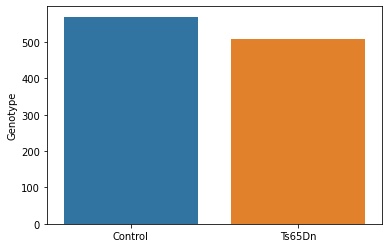

In [ ]:
# Get unique value counts in the target column
unique_value_counts = as_read_data_df['Genotype'].value_counts()
unique_value_counts.index.to_list()

# Plot the target column histogram
sns.barplot(x=unique_value_counts.index, y=unique_value_counts)

Observations:
1. Target distribution seems to balanced. (i.e. classes in the target column 'Genotype' has almost equal frequency)

Useful resource:https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

### KDE plots of distributions of input columns on classes of target
Used to check which columns are indicative/predictive of classes in the target 



#### Define a function to plot distributions of numeric columns in the given data on classes of target column

In [ ]:
def plot_target_distributions(data_df, target_column_name, color_mapping_dict):
    # Drop get numerical columns in the input data to iterate over and get number of rows in subplots
    numeric_data_df = data_df.select_dtypes(include=['int64', 'float64'])

    # Get number of rows to set in subplots
    n_subplots_rows = len(numeric_data_df.columns)

    # Create a figure and a set of subplots
    figure, axes_array = plt.subplots(nrows=n_subplots_rows, ncols=1, figsize=(5*1, 3*n_subplots_rows))

    # Iterate through the float columns
    for i, column_name in enumerate(numeric_data_df.columns): 
        for target_value, color in color_mapping_dict.items(): # Iterate through colours_dict
            # Get boolean list indicating whether target value is present or not
            target_boolean_list = data_df[target_column_name]==target_value

            # Get the values in current column corresponding to the target value
            column_data_corresponding_to_target_value = data_df.loc[target_boolean_list, column_name]

            # Plot each quality level as a separate line
            kde_plot = sns.kdeplot(ax=axes_array[i], x=column_data_corresponding_to_target_value, color = color, label=target_value)
        
        # Plot title and labels
        axes_array[i].set_title(f'{column_name} Distribution') 
        axes_array[i].set_xlabel(f'{column_name}')
        axes_array[i].set_ylabel('Density')
        axes_array[i].legend() # Show legend for subplot

    figure.tight_layout()  # Adjust the padding between and around subplots.

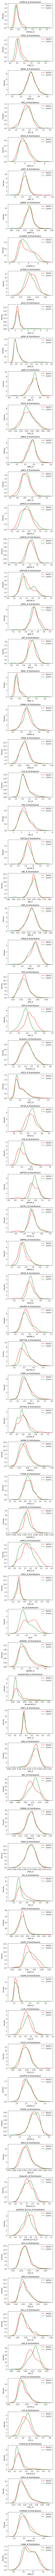

In [ ]:
# Define color mapping to target values
color_mapping_dict = {
    'Ts65Dn': 'red', 
    'Control': 'green'
    }

# Call the target distributions plotting function on imputed data
plot_target_distributions(data_df=imputed_data_df, target_column_name='Genotype', color_mapping_dict=color_mapping_dict)

Observations:
1. Some columns like 'BDNF_N', 'pERK_N' 'RAP1_N' are not predictive of the classes.

## Scatter matrix

In [ ]:
pd.plotting.scatter_matrix(as_read_data_df, diagonal='kde')

In [ ]:
# Using seaborn
# Source - https://seaborn.pydata.org/generated/seaborn.pairplot.html

## Quick way
# sns.pairplot(as_read_data_df)

sns.pairplot(as_read_data_df, hue='Genotype', hue_order=['Control', 'Ts65Dn'], 
             markers=["^", "*"], palette=sns.color_palette(palette="bright", n_colors=2), diag_kind='kde')

In [ ]:
# Source - https://stackoverflow.com/questions/58623528/pandas-scatter-matrix-labels-vertical-x-and-horizontal-y-without-being-cut
# Modification - changes x axis rotation to 45

# Set plots
axes = pd.plotting.scatter_matrix(as_read_data_df, diagonal='kde', figsize=(18,18))

# Set axes
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

# Plot
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

## Correlation heatmap

In [ ]:
# Source - (EE 769 - ML for smart monkeys) https://www.youtube.com/watch?v=Ato-hcv0NK0&list=PLZKhx5nBXhfhL28m4mjIM5kSwh5gUV2k6&index=3
# Calculate correlation matrix
correlation_matrix = as_read_data_df.corr(method='spearman')  # Use spearman for non-linear/monotonicity

# Plot absolute correlation matrix heatmap
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(abs(correlation_matrix), annot=True) # Show absolute value
plt.show()

# ML modelling

## Data pre-processing for ML modelling

### Seprate X and y data

In [ ]:
# Input variables data (to be scaled later)
cleaned_X_data_df = cleaned_data_df.iloc[:, 1:-4] # columns except IDs and outputs
display(cleaned_X_data_df) 

# Output variables data
y_data = cleaned_data_df['Genotype']  # output variable is not to be scaled.

# Change the data type of output variable to numerical
y_data = y_data.astype('int64')

display(y_data)

DYRK1A_N   ITSN1_N    BDNF_N  ...    EGR1_N  H3MeK4_N    CaNA_N
0     0.503644  0.747193  0.430175  ...  0.131790  0.128186  1.675652
1     0.514617  0.689064  0.411770  ...  0.135103  0.131119  1.743610
2     0.509183  0.730247  0.418309  ...  0.133362  0.127431  1.926427
3     0.442107  0.617076  0.358626  ...  0.147444  0.146901  1.700563
4     0.434940  0.617430  0.358802  ...  0.140314  0.148380  1.839730
...        ...       ...       ...  ...       ...       ...       ...
1075  0.254860  0.463591  0.254860  ...  0.204660  0.328327  1.364823
1076  0.272198  0.474163  0.251638  ...  0.200415  0.293435  1.364478
1077  0.228700  0.395179  0.234118  ...  0.229193  0.355213  1.430825
1078  0.221242  0.412894  0.243974  ...  0.251317  0.365353  1.404031
1079  0.302626  0.461059  0.256564  ...  0.252995  0.365278  1.370999

[1080 rows x 77 columns]

0       0
1       0
2       0
3       0
4       0
       ..
1075    1
1076    1
1077    1
1078    1
1079    1
Name: Genotype, Length: 1080, dtype: int64

### Input Data standardization


In [ ]:
# Import standardizer class from sklearn
from sklearn.preprocessing import StandardScaler

# Create standardizer instance from the imported StandardScaler class
standard_scaler = StandardScaler()

# Fit the standardizer instance on cleaned data (using multivariate imputation)
fitted_standard_scaler = standard_scaler.fit(cleaned_X_data_df)

# Transform(scale) the imputed data
scaled_X_data_array = fitted_standard_scaler.transform(cleaned_X_data_df)

# Convert the scaled input array to pandas dataframe
scaled_X_data_df = pd.DataFrame(data=scaled_X_data_array, columns=cleaned_X_data_df.columns)

# Confirmation of scaling
display(scaled_X_data_df.agg(['mean', 'std']))
print('--'*50)
display(scaled_X_data_df.agg(['mean', 'std']).mean(axis=1))

DYRK1A_N       ITSN1_N  ...      H3MeK4_N        CaNA_N
mean  2.853170e-16 -9.303258e-17  ... -6.620219e-17  1.570246e-17
std   1.000463e+00  1.000463e+00  ...  1.000463e+00  1.000463e+00

[2 rows x 77 columns]

----------------------------------------------------------------------------------------------------


mean   -5.496524e-17
std     1.000463e+00
dtype: float64

Observations:
1. Standardization is succesfull as means and standard deviations are 0 and 1 respectively.

### Train test data split

In [ ]:
# Import the train test split function from sklearn
from sklearn.model_selection import train_test_split

# Set test size
test_size = 0.15

# Train test split
X_train, X_test, y_train, y_test = train_test_split(scaled_X_data_df, y_data, test_size=test_size, random_state=7)

# Confirmation of train test splits using shapes
display('data shape: ', scaled_X_data_df.shape)
display('Input train data shape: ', X_train.shape)  # 85 % of the data
display('Output train data shape: ', y_train.shape)  # 85 % of the data
display('Input test data shape: ', X_test.shape)  # 15 % of the data
display('Output test data shape: ', y_test.shape)  # 15 % of the data

display(X_train.head(5)) # Note that column names are retained during scaling

'data shape: '

(1080, 77)

'Input train data shape: '

(918, 77)

'Output train data shape: '

(918,)

'Input test data shape: '

(162, 77)

'Output test data shape: '

(162,)

DYRK1A_N   ITSN1_N    BDNF_N  ...    EGR1_N  H3MeK4_N    CaNA_N
134   0.359000  0.255980 -0.221855  ...  0.339270  0.961540  0.679456
684  -0.055379 -0.166721  0.342621  ... -0.092736  0.089879  1.705661
725  -0.562029 -0.351497 -0.611665  ...  0.503168  0.280082 -0.413901
1058 -0.758190 -0.833111 -0.724505  ... -0.795706  0.268354 -0.005395
3     0.064678 -0.001157  0.802017  ... -0.939062 -1.118286  1.144490

[5 rows x 77 columns]

### Summary of data processing and stored dataframes
1. *data_df* --> missing value imputation ==> *imputed_data_df* --> target columns encoding ==> *encoded_data_df* --> store final cleaned data ==> *cleaned_data_df* --> separate X and y data ==> *cleaned_X_data_df* and *y_data* --> scale X data ==> *scaled_X_data_df* --> split the X and y data into train and test ==> *X_train*, *y_train*, *X_test* and *y_test*

## Testing ML models
Useful resource on performance metrics in classification:
1. https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b
2. https://towardsdatascience.com/performance-metrics-for-classification-machine-learning-problems-97e7e774a007

In [ ]:
# Import
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import time
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

style.use('fivethirtyeight')

### My functions for testing multiple models and hyperparameter grids using gridsearchcv

In [ ]:
# Source - https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix on test data',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    # else:
        # print('Confusion matrix, without normalization')

    # print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)
    



In [ ]:
# Function for testing multiple models using Gridsearchcv
def test_GridSearchCV_models(models_dict, hyperparam_grids_list, X_train, y_train, X_test, y_test, target_classes, metric_average, **kwargs):
    """
    Make sure that the sequence of hyperparameter dictionaries in the list and mmodels in the models dictionary matches

    Optional arguments:
    1. test_specific_model: list of model names (keys of models_dict) to be tested
    
    - Tejas Chaudhari

    """


    all_models_start_time = time.time() # Note start time of training all the models

    # Get optional keyword argument 'test_specific_model' which is a key of the model which we want to check in 'models_dict'
    test_specific_model = kwargs.get('test_specific_models', None) # None if no argument named 'only_test' is passed.

    performance_metrics_dict = {}

    for model_name, model in models_dict.items():
        # Remove comment from the following code to try a specific model
        if test_specific_model != None:
            if model_name not in test_specific_models: 
                continue # Condition to skip current loop

        # Record start time for the model validation
        current_model_start_time = time.time() # Note start time of training the current model

        # Enter model name in performance metris dictionary (this column will be changed to index while converting dictionary to dataframe)
        performance_metrics_dict.setdefault('Model name', []).append(model_name)

        # Get index of current iteration using key index in models dictionary to use in hyperparameters grids list
        i = list(models_dict.keys()).index(model_name)

        # Print current model being tested and corresponding hyperparamgrid for confimation
        print(f'Testing {model_name} with {hyperparam_grids_list[i]}')
        print('--'*50)

        # Define model and grid
        GridSearchCV_model = GridSearchCV(estimator=model, param_grid=hyperparam_grids_list[i])

        # train and validate the model (validation is hyper-parameter tunning)
        validated_model = GridSearchCV_model.fit(X_train, y_train)

        # Get the best estimator_model
        best_estimator_model = validated_model.best_estimator_

        # Estimate output on train data using the best estimator model
        y_train_estimated = best_estimator_model.predict(X_train)

        # Estimate output on test data using the best estimator model
        y_test_estimated = best_estimator_model.predict(X_test)

        # Print best parameters
        print(f'Best hyperparameters for {model_name}:')
        print(validated_model.best_params_)
        print('--'*50) 

        # Get F-1 score on train data
        f1_score_on_train = metrics.f1_score(y_true=y_train, y_pred=y_train_estimated, average=metric_average)
        performance_metrics_dict.setdefault('F-1 score on train', []).append(f1_score_on_train) # Create with the specified default value or append if exists

        # Get F-1 score on test data
        f1_score_on_test = metrics.f1_score(y_true=y_test, y_pred=y_test_estimated, average=metric_average)
        performance_metrics_dict.setdefault('F-1 score on test', []).append(f1_score_on_test) # Create with the specified default value or append if exists

        # Print F-1 score  on train and test 
        print(f'{metric_average} F-1 score rounded till 4 decimals for {model_name} on train and test:')
        print(round(f1_score_on_train, 4), round(f1_score_on_test, 4))
        print('--'*50)

        # Get ROC-AUC score on training data
        roc_auc_score_on_train = metrics.roc_auc_score(y_true=y_train, y_score=y_train_estimated, average=metric_average)
        performance_metrics_dict.setdefault('ROC-AUC score on train', []).append(roc_auc_score_on_train) # Create with the specified default value or append if exists

        # Get ROC-AUC score on testing data
        roc_auc_score_on_test = metrics.roc_auc_score(y_true=y_test, y_score=y_test_estimated, average=metric_average)
        performance_metrics_dict.setdefault('ROC-AUC score on test', []).append(roc_auc_score_on_test) # Create with the specified default value or append if exists

        # Print ROC-AUC score  on train and test 
        print(f'{metric_average} ROC-AUC score rounded till 4 decimals for {model_name} on train and test:')
        print(round(roc_auc_score_on_train, 4), round(roc_auc_score_on_test, 4))
        print('--'*50)

        # Get confusion matrix on train data
        confusion_matrix_on_train_array = metrics.confusion_matrix(y_true=y_train, y_pred=y_train_estimated)

        # Plot confusion matrix on train data
        # print('Confusion matrix plot on train data: \n')
        # plot_confusion_matrix(cm=confusion_matrix_on_train_array, classes=target_classes)
        # print('--'*50, '\n')

        # Get confusion matrix on test data
        # print('Confusion matrix plot on test data: \n')
        confusion_matrix_on_test_array = metrics.confusion_matrix(y_true=y_test, y_pred=y_test_estimated)

        # print confusion matrix on test data
        plot_confusion_matrix(cm=confusion_matrix_on_test_array, classes=target_classes)
    
        # Print classification report on training data
        classification_report_on_train = metrics.classification_report(y_true=y_train, y_pred=y_train_estimated)
        print(f'Classification report for {model_name} on training data: ')
        print(classification_report_on_train)
        print('--'*50)

        # Print classification report on testing data
        classification_report_on_test = metrics.classification_report(y_true=y_test, y_pred=y_test_estimated)
        print(f'Classification report for {model_name} on training data: ')
        print(classification_report_on_test)
        print('--'*50)

        # Get coefficients/importances of features from best estimator
        try:  # Added to avoid: 'RandomForestRegressor' object has no attribute 'coef_'
            feature_importances_list = np.abs(best_estimator_model.coef_)
            
            # Store feature importances plot title
            feature_importances_plot_tite = f'Feature importances from coefficients for {model_name} model'

        except AttributeError:
            try: # Added since 'SVR' object has no attribute 'feature_imporances_'
                # And 'coef_' attribute is only available in case of a linear kernel.
                
                # Define model using hyperparameters of best estimator from the gridsearchcv model
                best_hyperparams = validated_model.best_params_
                model_for_training = model.set_params(**best_hyperparams)

                # Retrain models (parameter tunning)
                trained_model = model_for_training.fit(X_train, y_train)

                # Get feature importances
                feature_importances_list = trained_model.feature_importances_

                # Store feature importances plot title
                feature_importances_plot_tite = f'Feature importances for {model_name} model'
        
            except AttributeError: 
                                
                # Get feature importances
                feature_importances_list = trained_model.dual_coef_
                # Could not figure out how to get feature importance from '.dual_coef_' method in SVR
                # There was no '.feature_importances_' method in sklearn.svm.SVR
                # And '.coef_' method is only applicable to linear kernel 
                feature_importances_list = 'Could not get importance'
                
            
        if feature_importances_list != 'Could not get importance': # Temporary condition until I figure it out
            # Feature importances
            ## Get feature names
            feature_names_list = X_train.columns.values.tolist()

            ## Convert feature importance to 1D if not (for example, in lasso logistic regression)
            if feature_importances_list.ndim == 2:
                feature_importances_list = feature_importances_list.reshape(-1)
            
            ## Plot feature importances
            plt.figure(figsize=(30,10))
            sns.barplot(x=feature_names_list, y=feature_importances_list)

            ## Plot settings
            plt.title(feature_importances_plot_tite, fontsize=70)
            plt.xticks(rotation=90, ha='center', fontsize=14)  # 'ha' is horizontal alignment of the xticks
            plt.yticks(fontsize=14)
            plt.tight_layout()
            plt.show()
            print('--'*50)

        current_model_end_time = time.time() # Note end time of training the current model
        current_model_total_time = current_model_end_time - current_model_start_time
        print(f'Time spent on {model_name}: {current_model_total_time/60:.3f} minutes (i.e. {current_model_total_time:.1f} seconds).')
        print('__'*50, '\n'*2)

    # Convert performance metrics dictionary to dataframe and display
    print(f'Performance metrics for all models: ')
    performance_metrics_df = pd.DataFrame.from_dict(performance_metrics_dict)
    display(performance_metrics_df.set_index('Model name').round(4))
    print('--'*50)

    all_models_end_time = time.time() # Note end time of training all the models
    all_models_total_time = all_models_end_time - all_models_start_time
    print( '\n'*2, '__'*50)
    print(f'Time spent on all models: {all_models_total_time/60:.3f} minutes (i.e. {all_models_total_time:.1f} seconds).')
    print('__'*50)

# Make sure that the sequence of hyperparameter dictionaries in the list and mmodels in the models dictionary matches
        


Testing Lasso with {'penalty': ['l1'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000], 'solver': ['liblinear', 'saga']}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Lasso:
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Lasso on train and test:
1.0 0.9629
----------------------------------------------------------------------------------------------------
macro ROC-AUC score rounded till 4 decimals for Lasso on train and test:
1.0 0.9625
----------------------------------------------------------------------------------------------------
Classification report for Lasso on training data: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       486
           1       1.00      1.00      1.00       432

    accuracy  

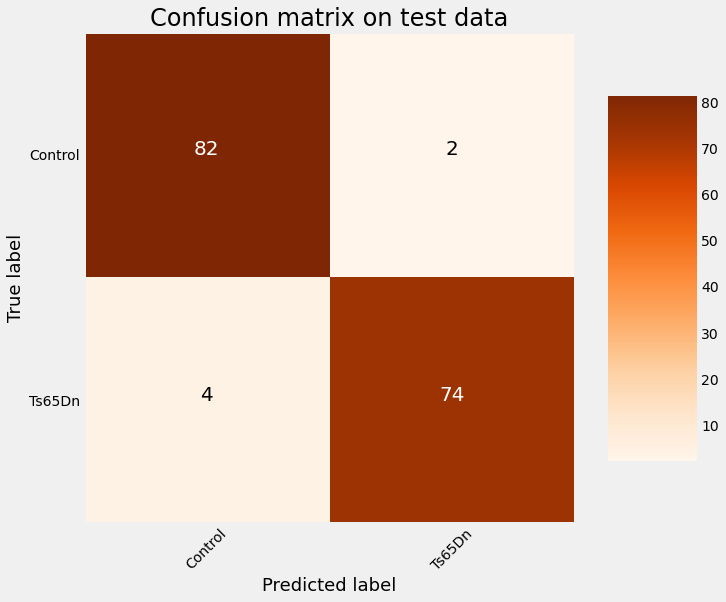

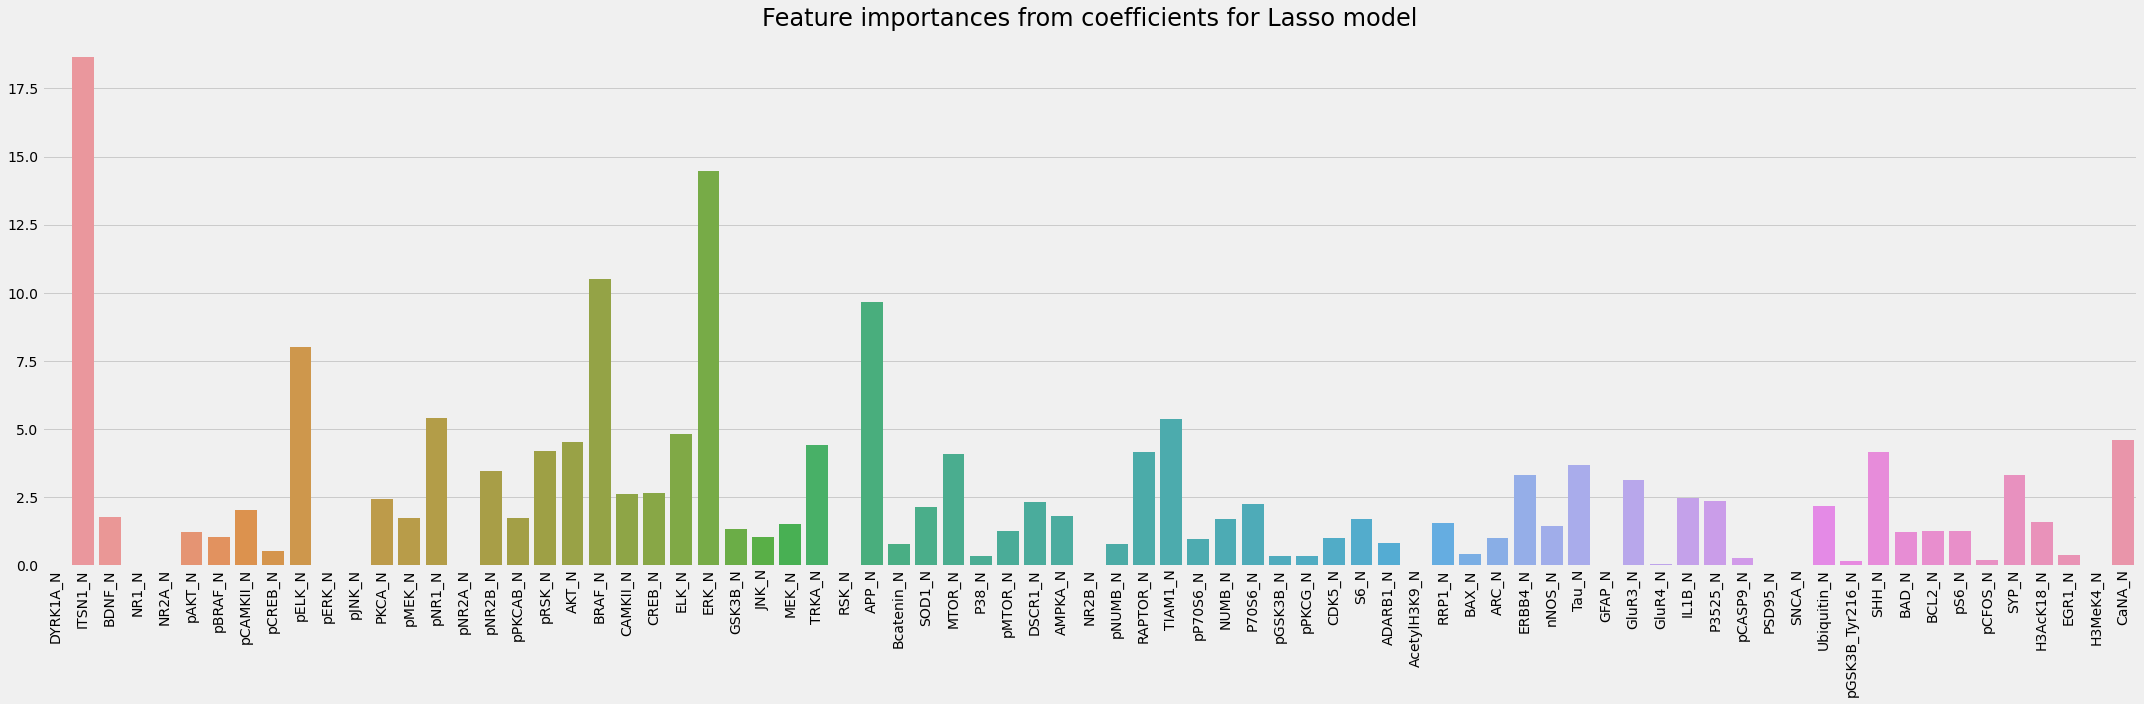

----------------------------------------------------------------------------------------------------
Time spent on Lasso: 0.131 minutes (i.e. 7.9 seconds).
____________________________________________________________________________________________________ 


Testing Ridge with {'penalty': ['l2'], 'C': [0.1, 1, 10, 100, 1000, 1500, 2000, 2500, 3000], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Ridge:
{'C': 1500, 'penalty': 'l2', 'solver': 'lbfgs'}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Ridge on train and test:
1.0 0.969
----------------------------------------------------------------------------------------------------
macro ROC-AUC score rounded till 4 decimals for Ridge on train and test:
1.0 0.9684
----------------------------------------------------

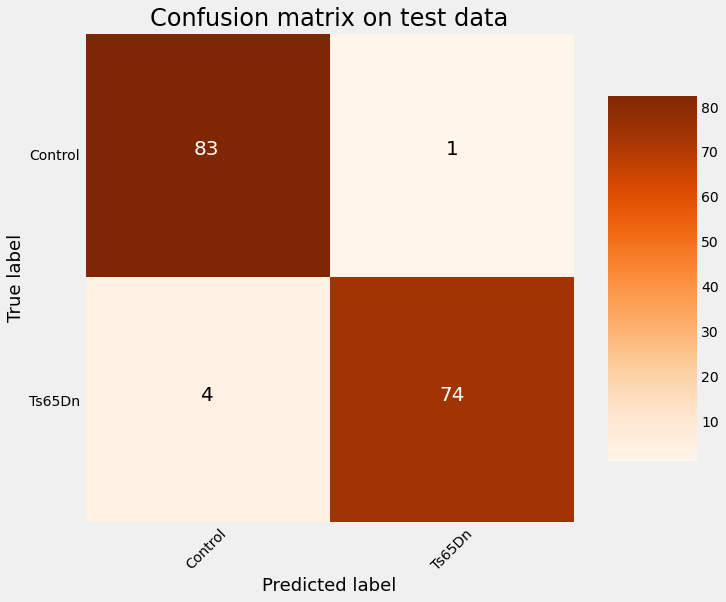

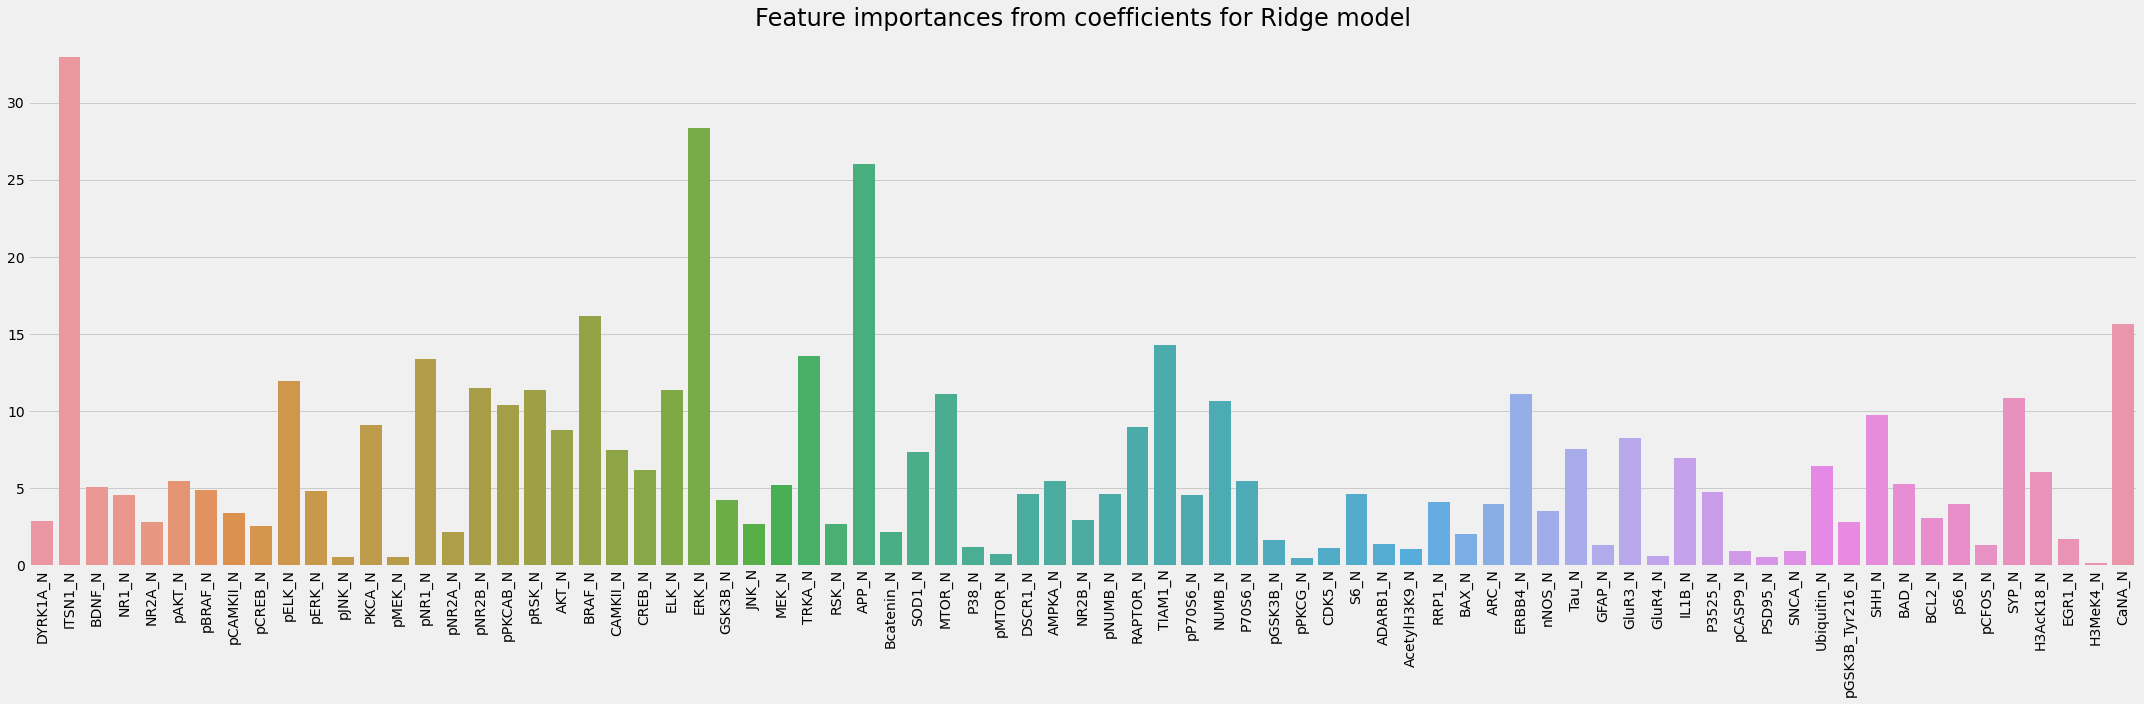

----------------------------------------------------------------------------------------------------
Time spent on Ridge: 0.180 minutes (i.e. 10.8 seconds).
____________________________________________________________________________________________________ 


Testing Elastic Net with {'penalty': ['elasticnet'], 'C': [0.001, 0.1, 1, 10, 100, 150, 1000], 'l1_ratio': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.8, 0.9], 'solver': ['saga']}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Elastic Net:
{'C': 1, 'l1_ratio': 1e-05, 'penalty': 'elasticnet', 'solver': 'saga'}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Elastic Net on train and test:
0.977 0.9814
----------------------------------------------------------------------------------------------------
macro ROC-AUC score rounded till 4 decimals for Elastic Net on

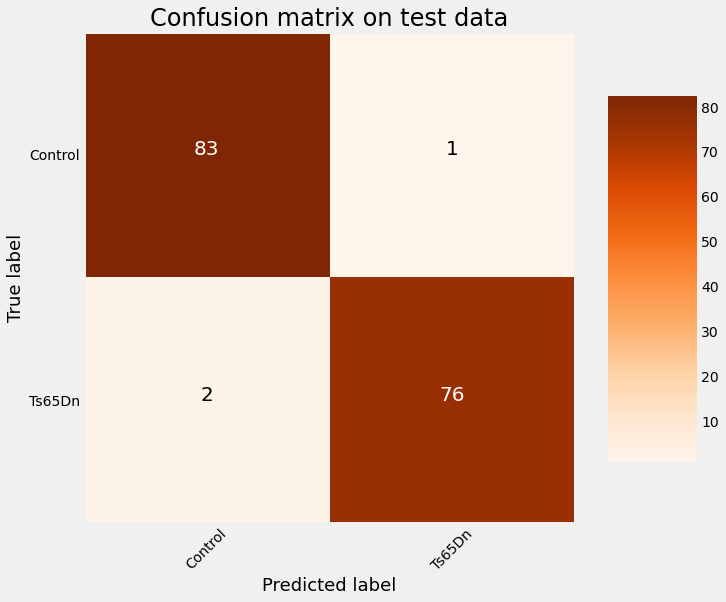

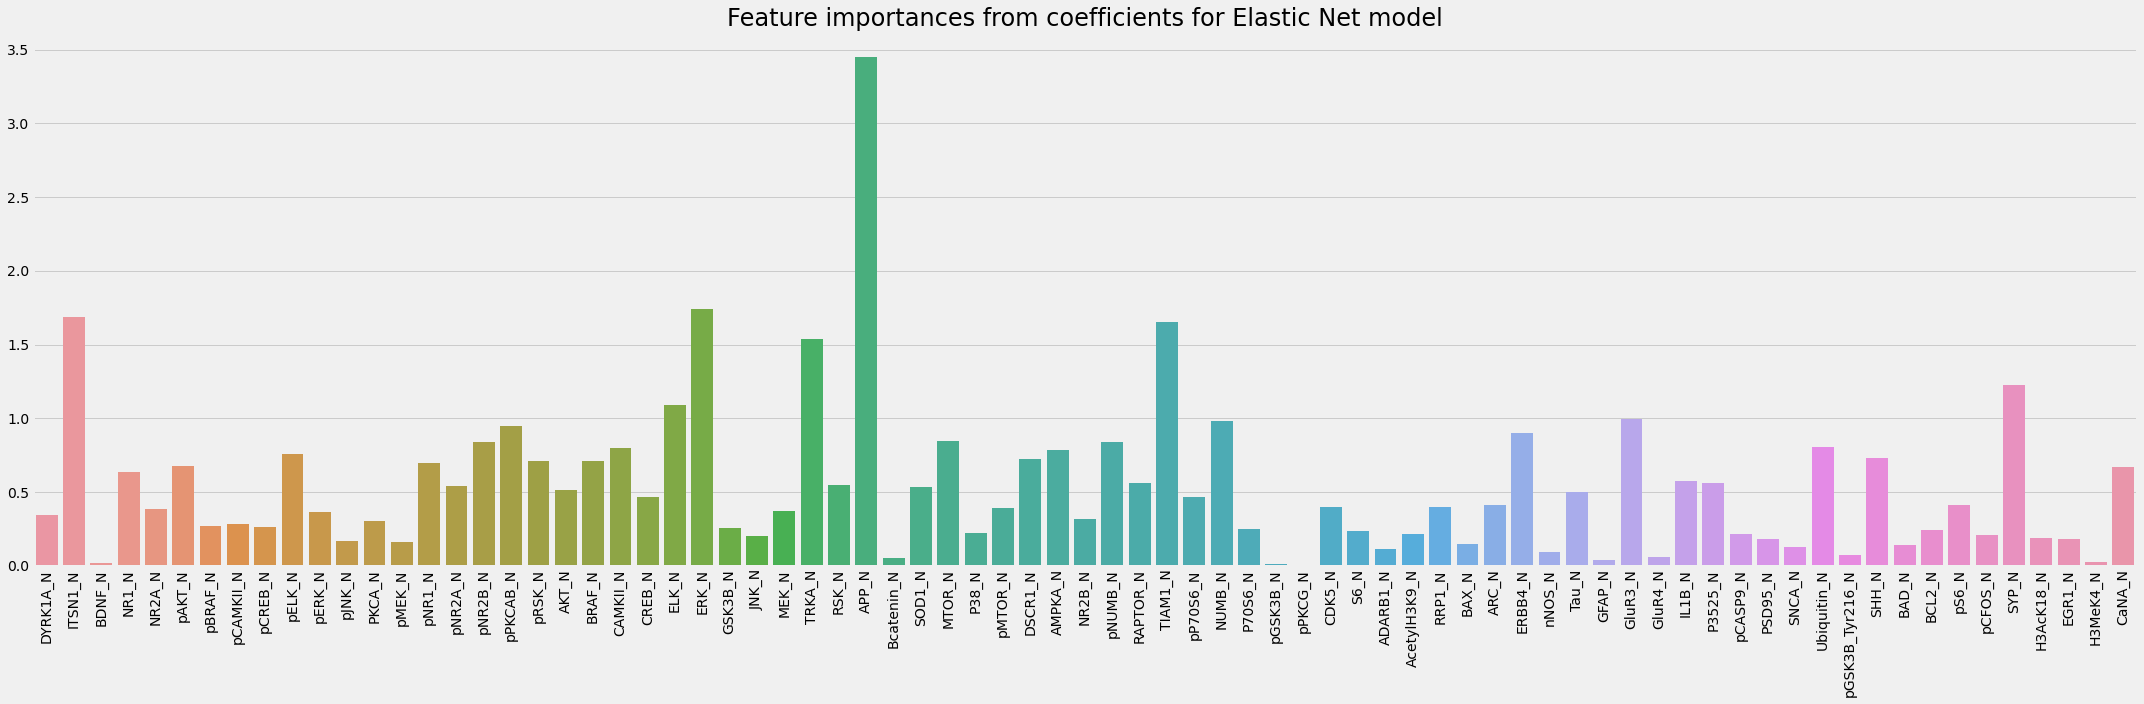

----------------------------------------------------------------------------------------------------
Time spent on Elastic Net: 0.470 minutes (i.e. 28.2 seconds).
____________________________________________________________________________________________________ 


Testing Random Forest Classifier with {'n_estimators': [1, 10, 100, 500], 'max_depth': [10, 500, 700], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12]}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Random Forest Classifier:
{'max_depth': 700, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 500}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Random Forest Classifier on train and test:
1.0 0.9814
-----------------------------------------------------------------------------------

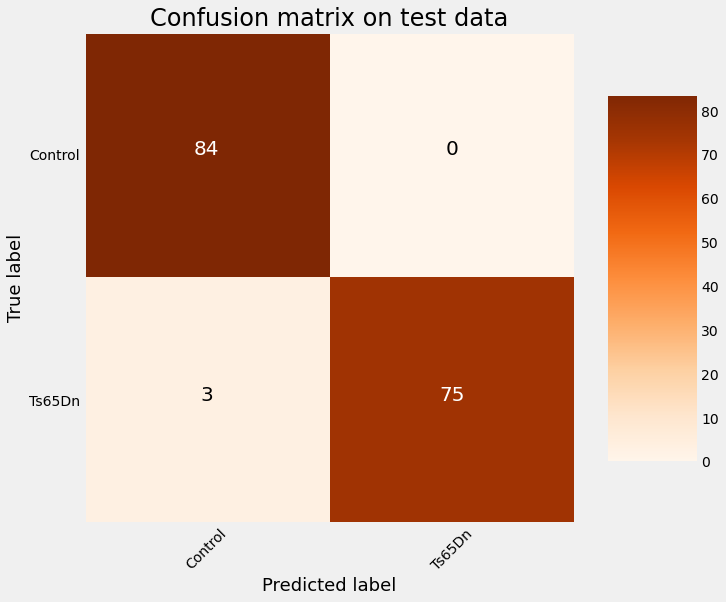

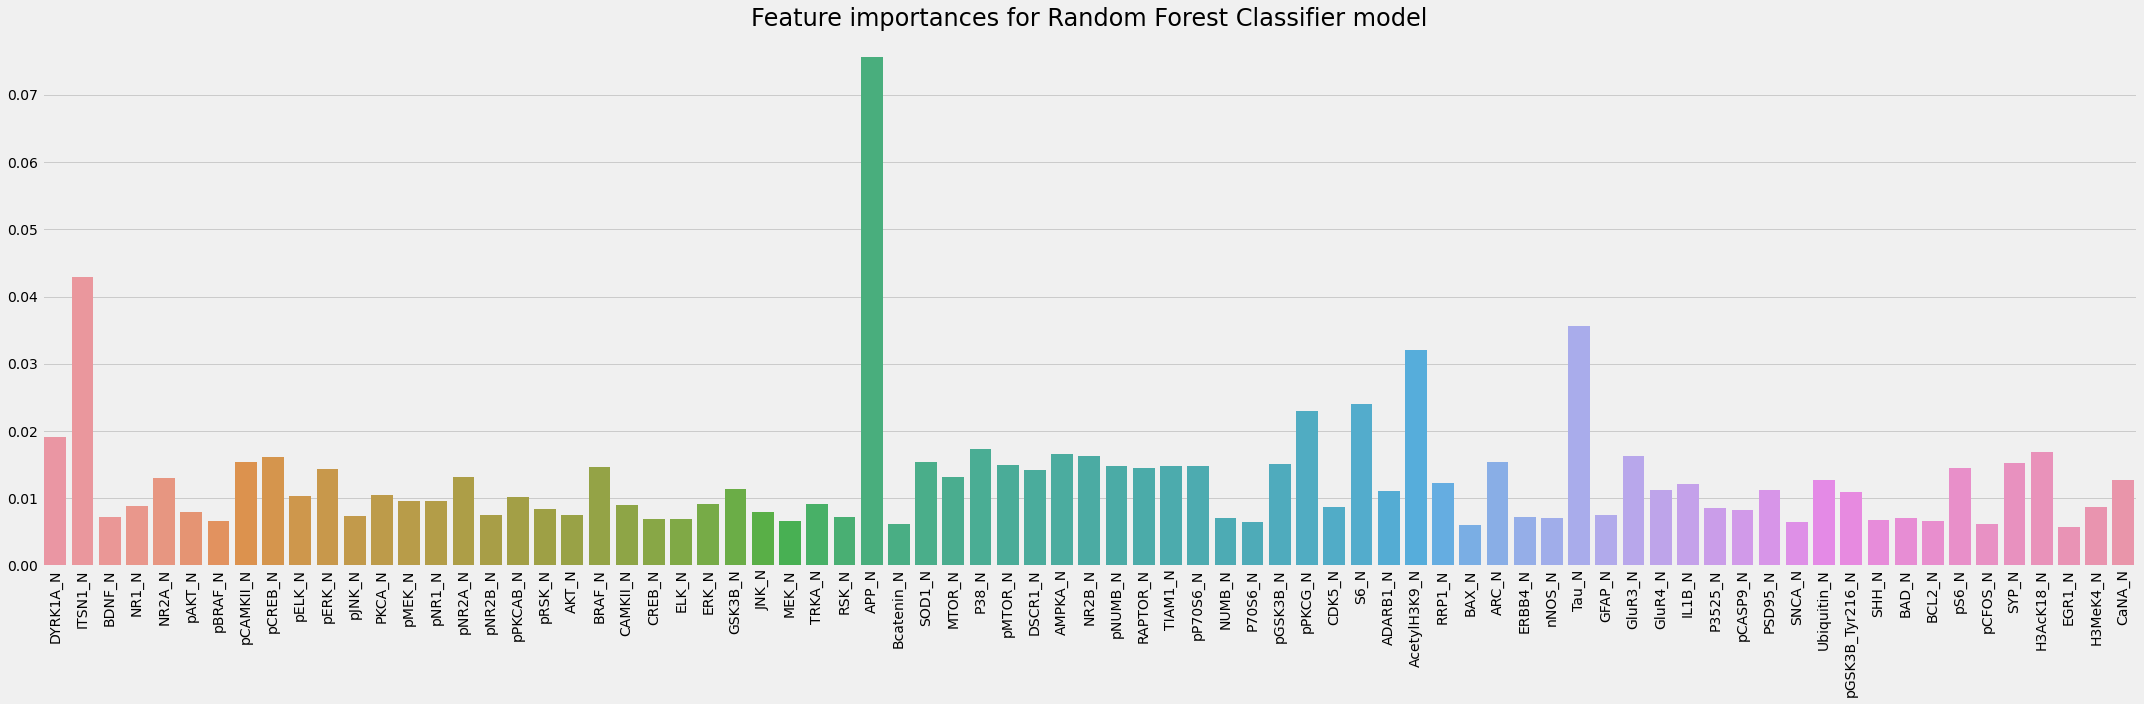

----------------------------------------------------------------------------------------------------
Time spent on Random Forest Classifier: 5.522 minutes (i.e. 331.3 seconds).
____________________________________________________________________________________________________ 


Testing Support Vector Classifier with {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 2, 3, 4], 'gamma': ['scale', 'auto'], 'C': [0.1, 1, 10, 100]}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Support Vector Classifier:
{'C': 10, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Support Vector Classifier on train and test:
1.0 0.9938
----------------------------------------------------------------------------------------------------
macro ROC-AUC score rounded till 4 decimal

F-1 score on train  ...  ROC-AUC score on test
Model name                                     ...                       
Lasso                                   1.000  ...                 0.9625
Ridge                                   1.000  ...                 0.9684
Elastic Net                             0.977  ...                 0.9812
Random Forest Classifier                1.000  ...                 0.9808
Support Vector Classifier               1.000  ...                 0.9940

[5 rows x 4 columns]

----------------------------------------------------------------------------------------------------


 ____________________________________________________________________________________________________
Time spent on all models: 6.708 minutes (i.e. 402.5 seconds).
____________________________________________________________________________________________________


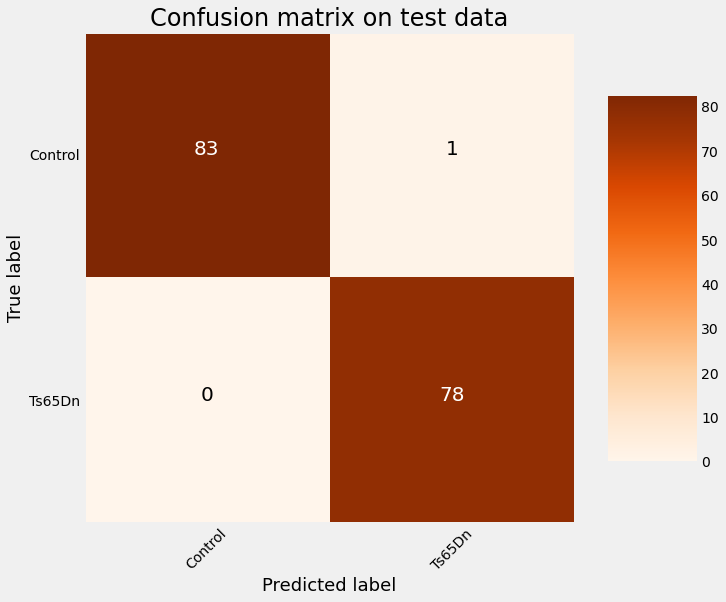

In [ ]:
# Set hyperparameters grid for lasso regression which we want to check
lasso_hyperparam_dict = {
    'penalty': ['l1'],
    'C': [1e-3, 1e-2, 0.1, 1, 10, 100, 1000, 2000],
    'solver': ['liblinear', 'saga']
}

# Set hyperparameters grid for ridge regression which we want to check
ridge_hyperparam_dict = {
    'penalty': ['l2'],
    'C': [0.1, 1, 10, 100, 1000, 1500, 2000, 2500, 3000],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'] # ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties
}

# Set hyperparameters grid for elastic net regression which we want to check
elastic_net_hyperparam_dict = {
    'penalty': ['elasticnet'],
    'C': [0.001, 0.1, 1, 10, 100, 150, 1000],
    'l1_ratio': [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.8, 0.9],
    'solver': ['saga'] # ‘elasticnet’ is only supported by the ‘saga’ solver.
}

# Set hyperparameters grid for random forest regression which we want to check
RFC_hyperparam_dict = {
    'n_estimators': [1, 10, 100, 500],  # Number of tress in the random forest
    'max_depth': [10, 500, 700], # 918 total samples in the data
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
}

# Set hyperparameters grid for support vector regression which we want to check
SVC_hyperparam_dict = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [1, 2, 3, 4],
    'gamma': ['scale', 'auto'],
    'C': [0.1, 1, 10, 100]
}


# Get the list of dictionaries of the hyperparameter values which we want to check
hyperparam_grids_list = [lasso_hyperparam_dict, ridge_hyperparam_dict, elastic_net_hyperparam_dict, 
                                  RFC_hyperparam_dict, SVC_hyperparam_dict]

# Define dictionary of models that we want to test
models_dict = {
    'Lasso': LogisticRegression(),
    'Ridge': LogisticRegression(),
    'Elastic Net': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Classifier': SVC()
}



# Call the function to test models on red wine data using the hyperparameters grid dictionaries    
test_GridSearchCV_models(models_dict=models_dict, hyperparam_grids_list=hyperparam_grids_list, 
                         X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                         metric_average = 'macro', target_classes=['Control', 'Ts65Dn'])
                        #  test_specific_models=['Lasso'])

Useful resource:
1. https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

Observations:
1. 'solver' in logisticregression - 
For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.

‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty

‘liblinear’ and ‘saga’ also handle L1 penalty

‘saga’ also supports ‘elasticnet’ penalty

‘liblinear’ does not support setting penalty='none'

2. ValueError: Unknown label type: 'unknown': solved (y_data should be numerical) - https://stackoverflow.com/questions/45346550/valueerror-unknown-label-type-unknown

3. Best 'C' hyperparameter and solver obtained in lasso logistic regression are '10' and 'liblinear' respectively. It will be used in lasso feature elimination.



## Feature elimination

Useful resources:
1. https://towardsdatascience.com/feature-selection-why-how-explained-part-2-352d9130c2e1
2. https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15

### 1. Using lasso regularization

Note:
1. Common algorithms with embedded feature selection include Lasso regression, decision tree, and auto-encoder neural network.
2. Best 'C' hyperparameter and solver for lasso logistic regression obtained in cross validation using gridsearchcv are '10' and 'liblinear' respectively. We will use it.
3. Note that this should be performed on scaled input data.

Useful resource:
1. https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499

In [ ]:
# Import
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Define the feature selecter
lasso_feature_selecter_model = SelectFromModel(estimator=LogisticRegression(C=10, penalty='l1', solver='liblinear'))

# Fit the feature selector model on the training data
fitted_lasso_feature_selecter_model = lasso_feature_selecter_model.fit(X_train, y_train)

# Get boolean list of features being selected or not
is_feature_selected_list = fitted_lasso_feature_selecter_model.get_support()

# Get selected features list
selected_features_list = X_train.columns[is_feature_selected_list]
print('Selected features: \n', selected_features_list)
print('--'*50)

# Get removed features list
removed_features_list = X_train.columns[[not x for x in is_feature_selected_list]]
print('Removed features: \n', removed_features_list)
print('__'*50, '\n')

# Get removed features list
n_features_removed = len(removed_features_list)
print('Number of removed features: \n', n_features_removed)
print('__'*50, '\n')

# Display training data before feature elimination (check shapes)
print(' Input training data before feature elimination: ')
display(X_train)
print('--'*100)

# Eliminate features in training data (based on lasso regularization) 
reduced_lasso_X_train_array = fitted_lasso_feature_selecter_model.transform(X_train)
reduced_lasso_X_train = pd.DataFrame(reduced_lasso_X_train_array, columns=selected_features_list)
## Display
print('Reduced input training data based on feature elimination using lasso regularization: ')
display(reduced_lasso_X_train)
print('__'*100)

# Display training data before feature elimination for confirmation (check shapes)
print(' Input testing data before feature elimination: ')
display(X_test)
print('--'*100)

# Eliminate features in testing data (based on lasso regularization) 
reduced_lasso_X_test_array = fitted_lasso_feature_selecter_model.transform(X_test)
reduced_lasso_X_test = pd.DataFrame(reduced_lasso_X_test_array, columns=selected_features_list) # convert to pandas dataframe
print('Reduced input testing data based on feature elimination using lasso regularization: ')
display(reduced_lasso_X_test)

Selected features: 
 Index(['ITSN1_N', 'BDNF_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pCREB_N',
       'pELK_N', 'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N',
       'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N',
       'JNK_N', 'MEK_N', 'TRKA_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'pNUMB_N', 'RAPTOR_N',
       'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N',
       'CDK5_N', 'S6_N', 'ADARB1_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N',
       'nNOS_N', 'Tau_N', 'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N',
       'pCASP9_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N',
       'BCL2_N', 'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'CaNA_N'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Removed features: 
 Index(['DYRK1A_N', 'NR1_N', 'NR2A_N', 'pERK_N', 'pJNK_N', 'pNR2A_N', 'RSK_N',
       '

DYRK1A_N   ITSN1_N    BDNF_N  ...    EGR1_N  H3MeK4_N    CaNA_N
134   0.359000  0.255980 -0.221855  ...  0.339270  0.961540  0.679456
684  -0.055379 -0.166721  0.342621  ... -0.092736  0.089879  1.705661
725  -0.562029 -0.351497 -0.611665  ...  0.503168  0.280082 -0.413901
1058 -0.758190 -0.833111 -0.724505  ... -0.795706  0.268354 -0.005395
3     0.064678 -0.001157  0.802017  ... -0.939062 -1.118286  1.144490
...        ...       ...       ...  ...       ...       ...       ...
919   0.336769  1.125784  1.275162  ... -1.337498 -1.237634  1.470637
211  -0.727877 -0.844892 -1.198852  ... -0.164674 -0.031433 -1.156418
502  -0.603215 -0.742776 -0.688295  ...  0.375192 -0.610532 -1.401309
537  -0.923513 -1.069609 -1.786819  ...  1.007837  1.812047  0.393846
175  -0.634808 -0.859326 -0.394880  ...  2.717528  1.844426 -0.935158

[918 rows x 77 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Reduced input training data based on feature elimination using lasso regularization: 


ITSN1_N    BDNF_N    pAKT_N  ...  H3AcK18_N    EGR1_N    CaNA_N
0    0.255980 -0.221855  0.945886  ...   0.390283  0.339270  0.679456
1   -0.166721  0.342621 -0.049613  ...  -0.347448 -0.092736  1.705661
2   -0.351497 -0.611665 -0.409213  ...  -0.038315  0.503168 -0.413901
3   -0.833111 -0.724505  0.351071  ...   1.250312 -0.795706 -0.005395
4   -0.001157  0.802017 -0.248991  ...  -0.600836 -0.939062  1.144490
..        ...       ...       ...  ...        ...       ...       ...
913  1.125784  1.275162 -0.475493  ...  -1.115165 -1.337498  1.470637
914 -0.844892 -1.198852 -0.304347  ...   0.188793 -0.164674 -1.156418
915 -0.742776 -0.688295 -1.057662  ...  -0.632953  0.375192 -1.401309
916 -1.069609 -1.786819 -0.471012  ...   0.208778  1.007837  0.393846
917 -0.859326 -0.394880  0.550189  ...   0.281363  2.717528 -0.935158

[918 rows x 64 columns]

________________________________________________________________________________________________________________________________________________________________________________________________________
 Input testing data before feature elimination: 


DYRK1A_N   ITSN1_N    BDNF_N  ...    EGR1_N  H3MeK4_N    CaNA_N
838 -0.256767 -0.136841 -0.660977  ...  0.579241 -0.356721 -1.344772
518 -0.860459 -0.777265 -0.291563  ... -1.007616 -0.493757 -0.255627
913  0.102019  0.055494 -1.487046  ... -0.037525 -0.552107 -0.346460
703  0.660140  0.691702  0.261653  ...  0.858969  1.237827  0.185093
750 -0.335431  0.370892  0.884826  ... -0.139290 -0.150782 -1.004181
..        ...       ...       ...  ...       ...       ...       ...
777 -0.823873 -0.593449  0.666852  ...  1.207858  1.466437 -0.828046
259 -0.292503 -0.262035 -0.607457  ... -0.375610 -0.722312 -1.106517
244 -0.581599 -0.861357 -0.704466  ...  0.520585 -0.072787 -2.240532
932  0.745206  1.248929  1.361936  ... -0.987537 -0.740008  1.205506
834 -0.225969 -0.178436 -0.952348  ...  0.181754 -0.276899 -1.135193

[162 rows x 77 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Reduced input testing data based on feature elimination using lasso regularization: 


ITSN1_N    BDNF_N    pAKT_N  ...  H3AcK18_N    EGR1_N    CaNA_N
0   -0.136841 -0.660977 -0.115604  ...  -0.326431  0.579241 -1.344772
1   -0.777265 -0.291563  0.307656  ...  -0.788619 -1.007616 -0.255627
2    0.055494 -1.487046 -0.833059  ...  -0.757578 -0.037525 -0.346460
3    0.691702  0.261653  1.164057  ...   0.406144  0.858969  0.185093
4    0.370892  0.884826  0.719327  ...   0.944411 -0.139290 -1.004181
..        ...       ...       ...  ...        ...       ...       ...
157 -0.593449  0.666852  3.281894  ...   0.534185  1.207858 -0.828046
158 -0.262035 -0.607457 -0.919644  ...  -0.716850 -0.375610 -1.106517
159 -0.861357 -0.704466 -0.649897  ...   0.159525  0.520585 -2.240532
160  1.248929  1.361936 -0.555272  ...  -0.024975 -0.987537  1.205506
161 -0.178436 -0.952348 -0.447019  ...  -0.423562  0.181754 -1.135193

[162 rows x 64 columns]

Observations:
1. Lasso (L-1) regularization removed 13 features.

### 2. Based on high correlation

Note:
1. The main issue of recursive feature elimination is that it can be expensive to run. So you should do anything you can to reduce the number of features beforehand. 
2. It was performed on cleaned (but not scaled) input data (cleaned_X_data_df)

#### Function to remove highly correlated features from the input data

In [ ]:
def get_correlated_features_set(data_df, max_allowed_abs_correlation, correlation_method):
    """
    Function to get set of correlated variables
    """
    # Initialize the set to store correlated variables
    correlated_variables_set = set()

    # Calculate correlation matrix 
    correlation_matrix = data_df.corr(method=correlation_method)

    for i, diagonal_column_name in enumerate(correlation_matrix.columns):
        # print(i, column_name)

        for j, left_column_name in enumerate(correlation_matrix.columns):
            # Condition to avoid duplicate correlation checks
            if j >= i: # skip all right columns to the diagonal column name
                continue
            
            # Drop if absolute correlation is higher than the specified max allowed
            if abs(correlation_matrix.iloc[i,j]) > max_allowed_abs_correlation:
                correlated_variables_set.add(diagonal_column_name)
    
    # Print result
    print(f'Following {len(correlated_variables_set)} features have high absolute correlation than {max_allowed_abs_correlation} based on {correlation_method} method: ')
    print(correlated_variables_set)
    print('--'*100)

    return correlated_variables_set

#### Use the function to remove highly correlated variables from the input data

In [ ]:
# Note that we have to perform feature elimination on X data only (not on target variable)
# display(cleaned_X_data_df)

# Set inputs
max_allowed_abs_correlation = 0.85
correlation_method = 'spearman'

# Get correlated features set
correlated_variables_set = get_correlated_features_set(data_df=cleaned_X_data_df, 
                                                       max_allowed_abs_correlation=max_allowed_abs_correlation, 
                                                       correlation_method=correlation_method)

# Initialize data frame to store input data with features eliminated based on high correlation
reduced_high_correlation_X_data_df = cleaned_X_data_df.drop(columns=correlated_variables_set, inplace=False)  # Modifications are independent

# Display input data before feature elimination
print(f'Input data before eliminating features based on high correlation: ')
display(cleaned_X_data_df)
print('--'*100)


# Display feature eliminated input data
print(f'Input data after eliminating features based on high correlation: ')
display(reduced_high_correlation_X_data_df)
print('--'*100)

# Confirmation if all the correlated variables are removed
## Get correlation matrix of the X data in which highly correlated features are removed
reduced_high_correlation_matrix = reduced_high_correlation_X_data_df.corr(method=correlation_method)

## Get boolean matrix(dataframe) indicating whether the value is higher than 0.85 or not
reduced_high_correlation_boolean_matrix = reduced_high_correlation_matrix>max_allowed_abs_correlation

## Get boolean list of columns indicating whether 'any' value is higher than 0.85
reduced_high_correlation_boolean_columns_list = reduced_high_correlation_matrix.any()

## Get counts(frequency) of values in the boolean columns list
reduced_high_correlation_boolean_values_list = reduced_high_correlation_boolean_columns_list.value_counts()

## Get number of correlated features left in the data
n_correlated_features_left = reduced_high_correlation_boolean_values_list.loc[True] - len(reduced_high_correlation_matrix.columns)  # Removed diagonal 'True's
print(f'There are {n_correlated_features_left} correlated features left.')
print('--'*100)


Following 13 features have high absolute correlation than 0.85 based on spearman method: 
{'TRKA_N', 'NR2B_N', 'pMEK_N', 'pNR1_N', 'EGR1_N', 'pS6_N', 'pERK_N', 'BRAF_N', 'Bcatenin_N', 'pNR2B_N', 'ERK_N', 'ITSN1_N', 'NR2A_N'}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Input data before eliminating features based on high correlation: 


DYRK1A_N   ITSN1_N    BDNF_N  ...    EGR1_N  H3MeK4_N    CaNA_N
0     0.503644  0.747193  0.430175  ...  0.131790  0.128186  1.675652
1     0.514617  0.689064  0.411770  ...  0.135103  0.131119  1.743610
2     0.509183  0.730247  0.418309  ...  0.133362  0.127431  1.926427
3     0.442107  0.617076  0.358626  ...  0.147444  0.146901  1.700563
4     0.434940  0.617430  0.358802  ...  0.140314  0.148380  1.839730
...        ...       ...       ...  ...       ...       ...       ...
1075  0.254860  0.463591  0.254860  ...  0.204660  0.328327  1.364823
1076  0.272198  0.474163  0.251638  ...  0.200415  0.293435  1.364478
1077  0.228700  0.395179  0.234118  ...  0.229193  0.355213  1.430825
1078  0.221242  0.412894  0.243974  ...  0.251317  0.365353  1.404031
1079  0.302626  0.461059  0.256564  ...  0.252995  0.365278  1.370999

[1080 rows x 77 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Input data after eliminating features based on high correlation: 


DYRK1A_N    BDNF_N     NR1_N  ...  H3AcK18_N  H3MeK4_N    CaNA_N
0     0.503644  0.430175  2.816329  ...   0.114783  0.128186  1.675652
1     0.514617  0.411770  2.789514  ...   0.111974  0.131119  1.743610
2     0.509183  0.418309  2.687201  ...   0.111883  0.127431  1.926427
3     0.442107  0.358626  2.466947  ...   0.130405  0.146901  1.700563
4     0.434940  0.358802  2.365785  ...   0.118481  0.148380  1.839730
...        ...       ...       ...  ...        ...       ...       ...
1075  0.254860  0.254860  2.092082  ...   0.318782  0.328327  1.364823
1076  0.272198  0.251638  2.161390  ...   0.325639  0.293435  1.364478
1077  0.228700  0.234118  1.733184  ...   0.321306  0.355213  1.430825
1078  0.221242  0.243974  1.876347  ...   0.335936  0.365353  1.404031
1079  0.302626  0.256564  2.092790  ...   0.335062  0.365278  1.370999

[1080 rows x 64 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
There are 0 correlated features left.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Split the reduced input data into train and test
test_size = 0.15
reduced_high_correlation_X_train, reduced_high_correlation_X_test = train_test_split(reduced_high_correlation_X_data_df,
                                                                                     test_size=test_size,
                                                                                     random_state=7)


### 3. Recursive feature elimination

Note.
1. In sklearn we can either use RFE or RFECV
2. RFECV arguments:
estimator — your model instance
step — number of features to remove at each iteration,
cv — your Cross-Validation, use StratifiedKFold and set K to 10,
scoring — scoring metric, what you want to optimize for.
3. We will use random forest classifier estimator with RFECV.
4. Out gridsearchcv results on random forest classifier:
Best hyperparameters for Random Forest Classifier:
{'max_depth': 700, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 500} 

Useful resource:
1. https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
# Create random forest classifier instance from the impported class
random_forest_classifier_model = RandomForestClassifier(random_state=7, max_depth=700, 
                                                        min_samples_leaf=3, min_samples_split=8, n_estimators=500)

# Create instance of recursive feature eliminator  with cross-validation
roc_auc_RFC_RFECV_model = RFECV(estimator=random_forest_classifier_model, scoring='roc_auc')

# Record start time of fitting
start_time = time.time()

# Fit the recursive feature estimator on training data
fitted_roc_auc_RFC_RFECV_model = roc_auc_RFC_RFECV_model.fit(X_train, y_train)

# Display time
end_time_roc_auc_RFC_RFECV = time.time()
time_elapsed_roc_auc_RFC_RFECV = end_time_roc_auc_RFC_RFECV - start_time
print(f'Time elapsed in fitting recursive feature eliminator with cross validation using ROC-AUC score: \
    {time_elapsed_roc_auc_RFC_RFECV/60:.3f} minutes ({time_elapsed_roc_auc_RFC_RFECV:.3f} seconds)')

# Create instance of recursive feature eliminator  with cross-validation
accuracy_RFC_RFECV_model = RFECV(estimator=random_forest_classifier_model, scoring='accuracy')

# Fit the recursive feature estimator on training data
fitted_accuracy_RFC_RFECV_model = accuracy_RFC_RFECV_model.fit(X_train, y_train)

# Display time
end_time_accuracy_RFC_RFECV = time.time()
print(end_time_accuracy_RFC_RFECV)
time_elapsed_accuracy_RFC_RFECV = end_time_accuracy_RFC_RFECV - time_elapsed_roc_auc_RFC_RFECV
print(f'Time elapsed in fitting recursive feature eliminator with cross validation using accuracy: \
    {time_elapsed_accuracy_RFC_RFECV/60:.3f} minutes ({time_elapsed_accuracy_RFC_RFECV:.3f} seconds)')



Time elapsed in fitting recursive feature eliminator with cross validation using ROC-AUC score:     8.864 minutes (531.843 seconds)
1622242643.3368382
Time elapsed in fitting recursive feature eliminator with cross validation using accuracy:     27037368.525 minutes (1622242111.494 seconds)


Input train data before eliminating features based on high correlation: 


DYRK1A_N   ITSN1_N    BDNF_N  ...    EGR1_N  H3MeK4_N    CaNA_N
134   0.359000  0.255980 -0.221855  ...  0.339270  0.961540  0.679456
684  -0.055379 -0.166721  0.342621  ... -0.092736  0.089879  1.705661
725  -0.562029 -0.351497 -0.611665  ...  0.503168  0.280082 -0.413901
1058 -0.758190 -0.833111 -0.724505  ... -0.795706  0.268354 -0.005395
3     0.064678 -0.001157  0.802017  ... -0.939062 -1.118286  1.144490
...        ...       ...       ...  ...       ...       ...       ...
919   0.336769  1.125784  1.275162  ... -1.337498 -1.237634  1.470637
211  -0.727877 -0.844892 -1.198852  ... -0.164674 -0.031433 -1.156418
502  -0.603215 -0.742776 -0.688295  ...  0.375192 -0.610532 -1.401309
537  -0.923513 -1.069609 -1.786819  ...  1.007837  1.812047  0.393846
175  -0.634808 -0.859326 -0.394880  ...  2.717528  1.844426 -0.935158

[918 rows x 77 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Input train data after eliminating features based on high correlation: 


DYRK1A_N   ITSN1_N    BDNF_N  ...    EGR1_N  H3MeK4_N    CaNA_N
0    0.359000  0.255980 -0.221855  ...  0.339270  0.961540  0.679456
1   -0.055379 -0.166721  0.342621  ... -0.092736  0.089879  1.705661
2   -0.562029 -0.351497 -0.611665  ...  0.503168  0.280082 -0.413901
3   -0.758190 -0.833111 -0.724505  ... -0.795706  0.268354 -0.005395
4    0.064678 -0.001157  0.802017  ... -0.939062 -1.118286  1.144490
..        ...       ...       ...  ...       ...       ...       ...
913  0.336769  1.125784  1.275162  ... -1.337498 -1.237634  1.470637
914 -0.727877 -0.844892 -1.198852  ... -0.164674 -0.031433 -1.156418
915 -0.603215 -0.742776 -0.688295  ...  0.375192 -0.610532 -1.401309
916 -0.923513 -1.069609 -1.786819  ...  1.007837  1.812047  0.393846
917 -0.634808 -0.859326 -0.394880  ...  2.717528  1.844426 -0.935158

[918 rows x 74 columns]

________________________________________________________________________________________________________________________________________________________________________________________________________ 

Input test data before eliminating features based on high correlation: 


DYRK1A_N   ITSN1_N    BDNF_N  ...    EGR1_N  H3MeK4_N    CaNA_N
838 -0.256767 -0.136841 -0.660977  ...  0.579241 -0.356721 -1.344772
518 -0.860459 -0.777265 -0.291563  ... -1.007616 -0.493757 -0.255627
913  0.102019  0.055494 -1.487046  ... -0.037525 -0.552107 -0.346460
703  0.660140  0.691702  0.261653  ...  0.858969  1.237827  0.185093
750 -0.335431  0.370892  0.884826  ... -0.139290 -0.150782 -1.004181
..        ...       ...       ...  ...       ...       ...       ...
777 -0.823873 -0.593449  0.666852  ...  1.207858  1.466437 -0.828046
259 -0.292503 -0.262035 -0.607457  ... -0.375610 -0.722312 -1.106517
244 -0.581599 -0.861357 -0.704466  ...  0.520585 -0.072787 -2.240532
932  0.745206  1.248929  1.361936  ... -0.987537 -0.740008  1.205506
834 -0.225969 -0.178436 -0.952348  ...  0.181754 -0.276899 -1.135193

[162 rows x 77 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Input train data after eliminating features based on high correlation: 


DYRK1A_N   ITSN1_N    BDNF_N  ...    EGR1_N  H3MeK4_N    CaNA_N
0   -0.256767 -0.136841 -0.660977  ...  0.579241 -0.356721 -1.344772
1   -0.860459 -0.777265 -0.291563  ... -1.007616 -0.493757 -0.255627
2    0.102019  0.055494 -1.487046  ... -0.037525 -0.552107 -0.346460
3    0.660140  0.691702  0.261653  ...  0.858969  1.237827  0.185093
4   -0.335431  0.370892  0.884826  ... -0.139290 -0.150782 -1.004181
..        ...       ...       ...  ...       ...       ...       ...
157 -0.823873 -0.593449  0.666852  ...  1.207858  1.466437 -0.828046
158 -0.292503 -0.262035 -0.607457  ... -0.375610 -0.722312 -1.106517
159 -0.581599 -0.861357 -0.704466  ...  0.520585 -0.072787 -2.240532
160  0.745206  1.248929  1.361936  ... -0.987537 -0.740008  1.205506
161 -0.225969 -0.178436 -0.952348  ...  0.181754 -0.276899 -1.135193

[162 rows x 74 columns]

________________________________________________________________________________________________________________________________________________________________________________________________________ 

Number of features selected in recursive feature elimination with cross validation using RFC and ROC-AUC scoring:     74
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


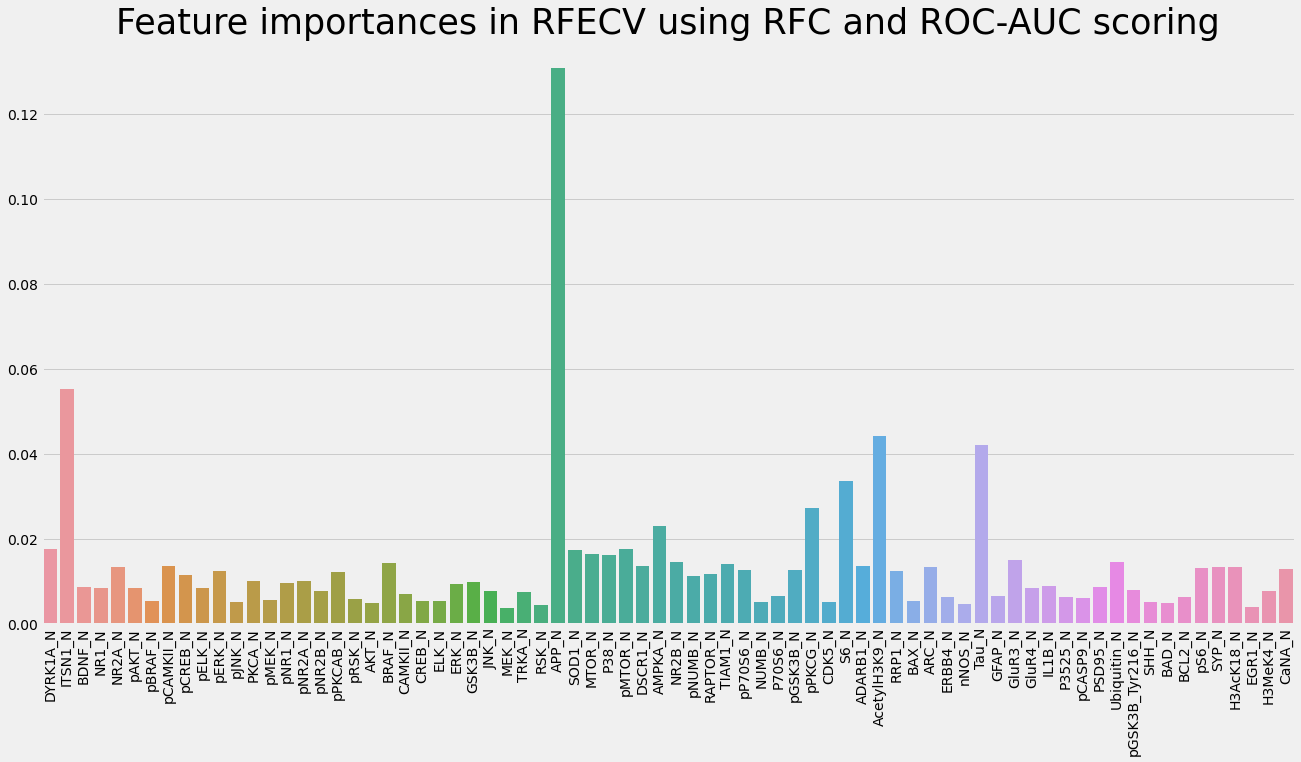

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Text(0, 0.5, 'ROC-AUC score')

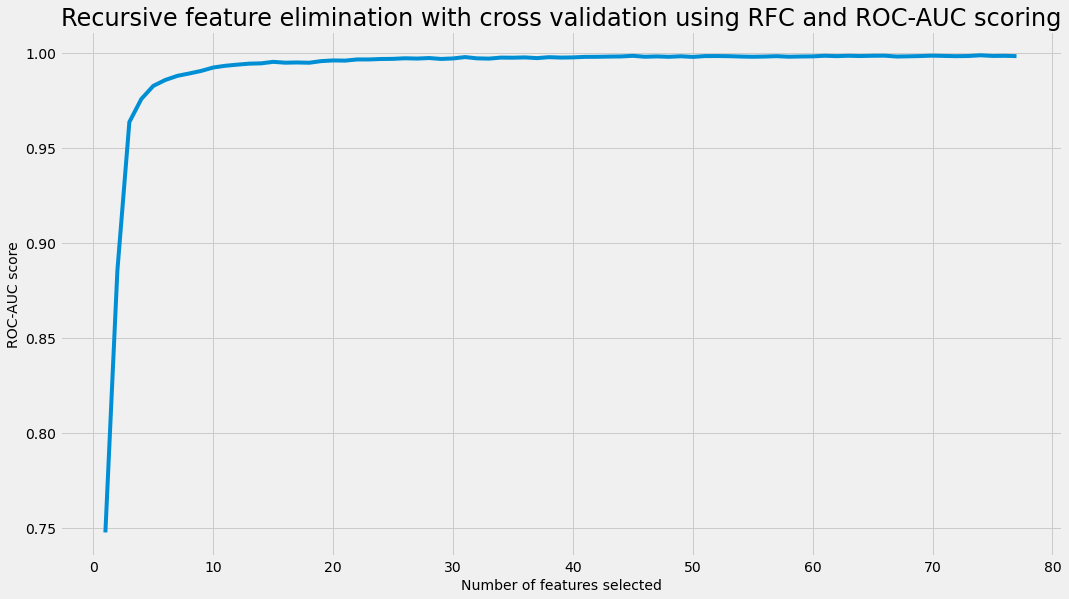

In [ ]:
# Get selected  features list
selected_features_list = X_train.columns[fitted_roc_auc_RFC_RFECV_model.support_]

# Get reduced input training dataframe
reduced_roc_auc_RFC_RFECV_X_train_array = fitted_roc_auc_RFC_RFECV_model.transform(X_train)
reduced_roc_auc_RFC_RFECV_X_train = pd.DataFrame(reduced_roc_auc_RFC_RFECV_X_train_array, columns=selected_features_list )

# Display input train data before feature elimination
print(f'Input train data before eliminating features based on high correlation: ')
display(X_train)
print('--'*100)

# Display input train data after feature elimination
print(f'Input train data after eliminating features based on high correlation: ')
display(reduced_roc_auc_RFC_RFECV_X_train)
print('__'*100, '\n')

# Get reduced input testing dataframe
reduced_roc_auc_RFC_RFECV_X_test_array = fitted_roc_auc_RFC_RFECV_model.transform(X_test)
reduced_roc_auc_RFC_RFECV_X_test = pd.DataFrame(reduced_roc_auc_RFC_RFECV_X_test_array, columns=selected_features_list )

# Display input test data before feature elimination
print(f'Input test data before eliminating features based on high correlation: ')
display(X_test)
print('--'*100)

# Display input test data after feature elimination
print(f'Input train data after eliminating features based on high correlation: ')
display(reduced_roc_auc_RFC_RFECV_X_test)
print('__'*100, '\n')

# Number of features selected
print(f'Number of features selected in recursive feature elimination with cross validation using RFC and ROC-AUC scoring: \
    {fitted_roc_auc_RFC_RFECV_model.n_features_}')
print('--'*100)

# Get Feature importance
feature_importances = fitted_roc_auc_RFC_RFECV_model.estimator_.feature_importances_

# Plot feature importances
plt.figure(figsize=(20,10))
sns.barplot(x=selected_features_list, y=feature_importances)
plt.title('Feature importances in RFECV using RFC and ROC-AUC scoring', fontsize=35)
plt.xticks(rotation=90)
plt.show()
print('--'*100)

# Plot 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,9))
sns.lineplot(x=range(1, len(fitted_roc_auc_RFC_RFECV_model.grid_scores_) +1, 1), 
         y=fitted_roc_auc_RFC_RFECV_model.grid_scores_)
plt.title('Recursive feature elimination with cross validation using RFC and ROC-AUC scoring', fontsize=24)
plt.xlabel('Number of features selected', fontsize=14)
plt.ylabel('ROC-AUC score', fontsize=14)

Input train data before eliminating features based on high correlation: 


DYRK1A_N   ITSN1_N    BDNF_N  ...    EGR1_N  H3MeK4_N    CaNA_N
134   0.359000  0.255980 -0.221855  ...  0.339270  0.961540  0.679456
684  -0.055379 -0.166721  0.342621  ... -0.092736  0.089879  1.705661
725  -0.562029 -0.351497 -0.611665  ...  0.503168  0.280082 -0.413901
1058 -0.758190 -0.833111 -0.724505  ... -0.795706  0.268354 -0.005395
3     0.064678 -0.001157  0.802017  ... -0.939062 -1.118286  1.144490
...        ...       ...       ...  ...       ...       ...       ...
919   0.336769  1.125784  1.275162  ... -1.337498 -1.237634  1.470637
211  -0.727877 -0.844892 -1.198852  ... -0.164674 -0.031433 -1.156418
502  -0.603215 -0.742776 -0.688295  ...  0.375192 -0.610532 -1.401309
537  -0.923513 -1.069609 -1.786819  ...  1.007837  1.812047  0.393846
175  -0.634808 -0.859326 -0.394880  ...  2.717528  1.844426 -0.935158

[918 rows x 77 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Input train data after eliminating features based on high correlation: 


DYRK1A_N   ITSN1_N    BDNF_N  ...  H3AcK18_N  H3MeK4_N    CaNA_N
0    0.359000  0.255980 -0.221855  ...   0.390283  0.961540  0.679456
1   -0.055379 -0.166721  0.342621  ...  -0.347448  0.089879  1.705661
2   -0.562029 -0.351497 -0.611665  ...  -0.038315  0.280082 -0.413901
3   -0.758190 -0.833111 -0.724505  ...   1.250312  0.268354 -0.005395
4    0.064678 -0.001157  0.802017  ...  -0.600836 -1.118286  1.144490
..        ...       ...       ...  ...        ...       ...       ...
913  0.336769  1.125784  1.275162  ...  -1.115165 -1.237634  1.470637
914 -0.727877 -0.844892 -1.198852  ...   0.188793 -0.031433 -1.156418
915 -0.603215 -0.742776 -0.688295  ...  -0.632953 -0.610532 -1.401309
916 -0.923513 -1.069609 -1.786819  ...   0.208778  1.812047  0.393846
917 -0.634808 -0.859326 -0.394880  ...   0.281363  1.844426 -0.935158

[918 rows x 63 columns]

________________________________________________________________________________________________________________________________________________________________________________________________________ 

Input test data before eliminating features based on high correlation: 


DYRK1A_N   ITSN1_N    BDNF_N  ...    EGR1_N  H3MeK4_N    CaNA_N
838 -0.256767 -0.136841 -0.660977  ...  0.579241 -0.356721 -1.344772
518 -0.860459 -0.777265 -0.291563  ... -1.007616 -0.493757 -0.255627
913  0.102019  0.055494 -1.487046  ... -0.037525 -0.552107 -0.346460
703  0.660140  0.691702  0.261653  ...  0.858969  1.237827  0.185093
750 -0.335431  0.370892  0.884826  ... -0.139290 -0.150782 -1.004181
..        ...       ...       ...  ...       ...       ...       ...
777 -0.823873 -0.593449  0.666852  ...  1.207858  1.466437 -0.828046
259 -0.292503 -0.262035 -0.607457  ... -0.375610 -0.722312 -1.106517
244 -0.581599 -0.861357 -0.704466  ...  0.520585 -0.072787 -2.240532
932  0.745206  1.248929  1.361936  ... -0.987537 -0.740008  1.205506
834 -0.225969 -0.178436 -0.952348  ...  0.181754 -0.276899 -1.135193

[162 rows x 77 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Input train data after eliminating features based on high correlation: 


DYRK1A_N   ITSN1_N    BDNF_N  ...  H3AcK18_N  H3MeK4_N    CaNA_N
0   -0.256767 -0.136841 -0.660977  ...  -0.326431 -0.356721 -1.344772
1   -0.860459 -0.777265 -0.291563  ...  -0.788619 -0.493757 -0.255627
2    0.102019  0.055494 -1.487046  ...  -0.757578 -0.552107 -0.346460
3    0.660140  0.691702  0.261653  ...   0.406144  1.237827  0.185093
4   -0.335431  0.370892  0.884826  ...   0.944411 -0.150782 -1.004181
..        ...       ...       ...  ...        ...       ...       ...
157 -0.823873 -0.593449  0.666852  ...   0.534185  1.466437 -0.828046
158 -0.292503 -0.262035 -0.607457  ...  -0.716850 -0.722312 -1.106517
159 -0.581599 -0.861357 -0.704466  ...   0.159525 -0.072787 -2.240532
160  0.745206  1.248929  1.361936  ...  -0.024975 -0.740008  1.205506
161 -0.225969 -0.178436 -0.952348  ...  -0.423562 -0.276899 -1.135193

[162 rows x 63 columns]

________________________________________________________________________________________________________________________________________________________________________________________________________ 

Number of features selected in recursive feature elimination with cross validation using RFC and accuracy scoring:     63
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


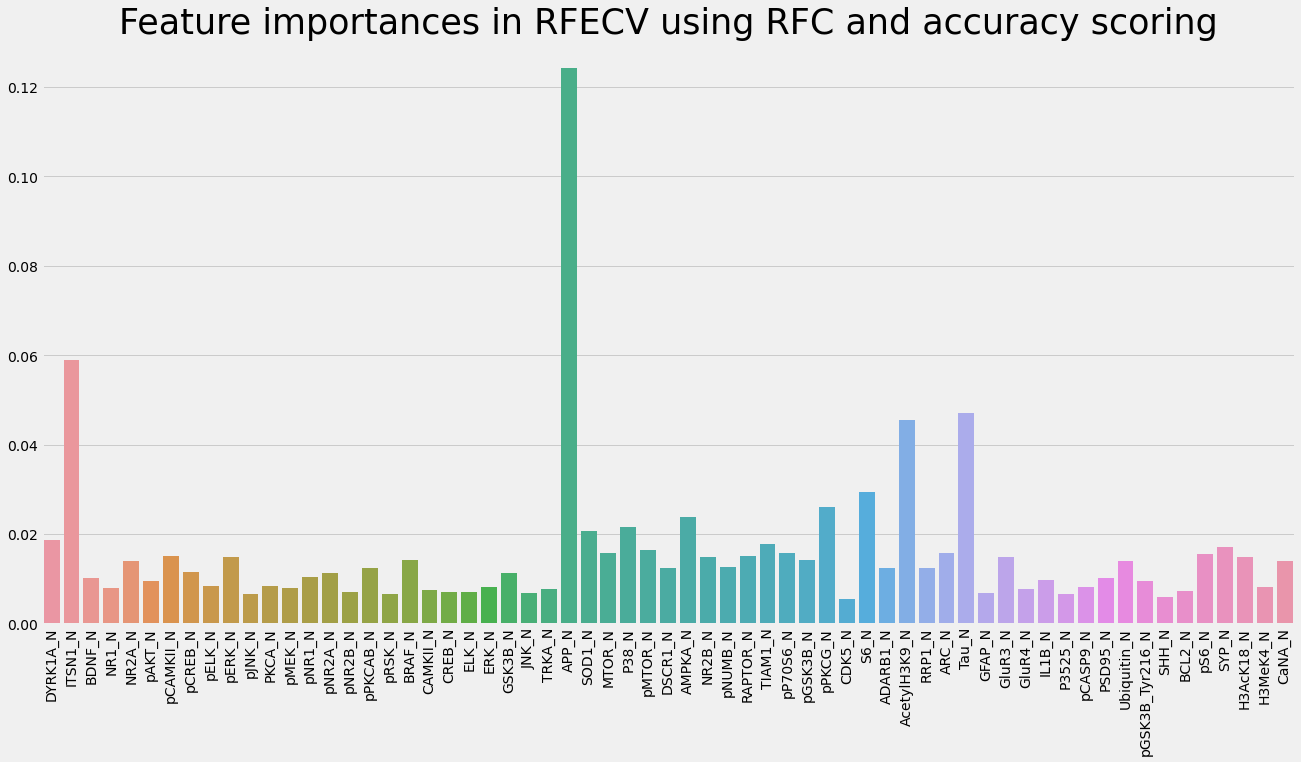

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Text(0, 0.5, 'Accuracy')

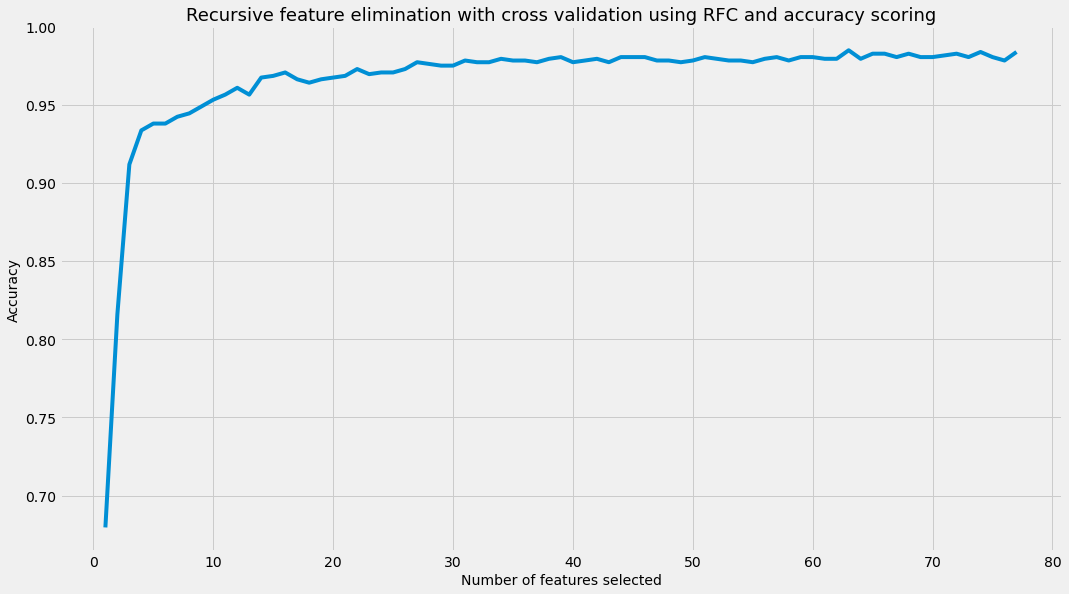

In [ ]:
# Get selected  features list
selected_features_list = X_train.columns[fitted_accuracy_RFC_RFECV_model.support_]

# Get reduced input train dataframe
reduced_accuracy_RFC_RFECV_X_train_array = fitted_accuracy_RFC_RFECV_model.transform(X_train)
reduced_accuracy_RFC_RFECV_X_train = pd.DataFrame(reduced_accuracy_RFC_RFECV_X_train_array, columns=selected_features_list )

# Display input train data before feature elimination
print(f'Input train data before eliminating features based on high correlation: ')
display(X_train)
print('--'*100)

# Display input train data after feature elimination
print(f'Input train data after eliminating features based on high correlation: ')
display(reduced_accuracy_RFC_RFECV_X_train)
print('__'*100, '\n')

# Get reduced input test dataframe
reduced_accuracy_RFC_RFECV_X_test_array = fitted_accuracy_RFC_RFECV_model.transform(X_test)
reduced_accuracy_RFC_RFECV_X_test = pd.DataFrame(reduced_accuracy_RFC_RFECV_X_test_array, columns=selected_features_list )

# Display input test data before feature elimination
print(f'Input test data before eliminating features based on high correlation: ')
display(X_test)
print('--'*100)

# Display input test data after feature elimination
print(f'Input train data after eliminating features based on high correlation: ')
display(reduced_accuracy_RFC_RFECV_X_test)
print('__'*100, '\n')


# Number of features selected
print(f'Number of features selected in recursive feature elimination with cross validation using RFC and accuracy scoring: \
    {fitted_accuracy_RFC_RFECV_model.n_features_}')
print('--'*100)

# Get Feature importance
feature_importances = fitted_accuracy_RFC_RFECV_model.estimator_.feature_importances_

# Plot feature importances
plt.figure(figsize=(20,10))
sns.barplot(x=selected_features_list, y=feature_importances)
plt.title('Feature importances in RFECV using RFC and accuracy scoring', fontsize=35)
plt.xticks(rotation=90)
plt.show()
print('--'*100)

# Plot 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,9))
sns.lineplot(x=range(1, len(fitted_accuracy_RFC_RFECV_model.grid_scores_) +1, 1), 
         y=fitted_accuracy_RFC_RFECV_model.grid_scores_)
plt.title('Recursive feature elimination with cross validation using RFC and accuracy scoring', fontsize=18)
plt.xlabel('Number of features selected', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

Observations:
1. Number of features selected using RFECV with RFC estimator and ROC-AUC scoring: 74.
2. Number of features selected using RFECV with RFC estimator and accuracy scoring: 63.
3. Feature 'APP_N' seems to be most important in both methods.



### Summary of data processing and stored dataframes
1. *data_df* --> missing value imputation ==> *imputed_data_df* --> target columns encoding ==> *encoded_data_df* --> store final cleaned data ==> *cleaned_data_df* --> separate X and y data ==> *cleaned_X_data_df* and *y_data* --> scale X data ==> *scaled_X_data_df* --> split the X and y data into train and test ==> *X_train*, *y_train*, *X_test* and *y_test*
2. X_train (with y_train) and X_test --> feature elimination using lasso (L1) regularized logistic regression ==> reduced_lasso_X_train_df and reduced_lasso_X_test_df
3. cleaned_X_data_df --> feature elimination based on high correlation ==> reduced_high_correlation_X_data_df --> train test split ==> reduced_high_correlation_X_train, reduced_high_correlation_X_test
4. X_train (with y_train) and X_test --> recursive feature elimination with cross validation using random forest classifier ==> reduced_roc_auc_RFC_RFECV_X_train

## Second iteration of testing models

### 1. Using reduced data obtain from lasso feature elimination

Testing Lasso with {'penalty': ['l1'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000], 'solver': ['liblinear', 'saga']}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Lasso:
{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Lasso on train and test:
1.0 0.9629
----------------------------------------------------------------------------------------------------
macro ROC-AUC score rounded till 4 decimals for Lasso on train and test:
1.0 0.9629
----------------------------------------------------------------------------------------------------
Classification report for Lasso on training data: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       486
           1       1.00      1.00      1.00       432

    accuracy 

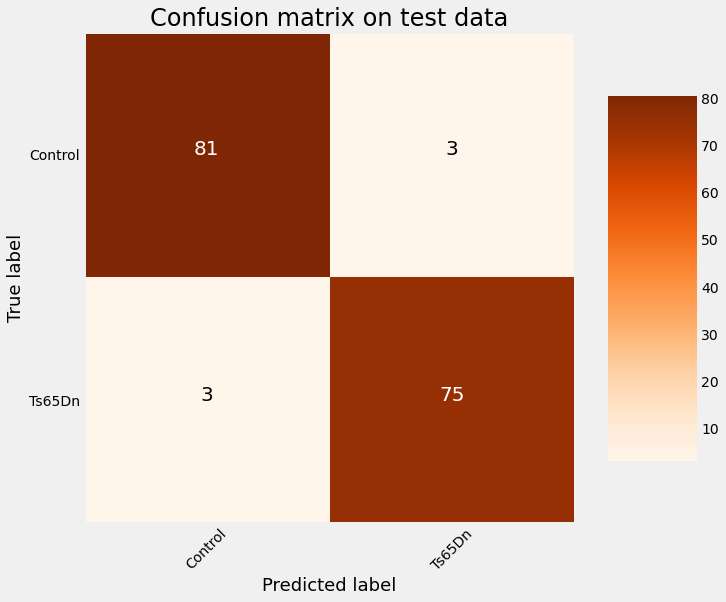

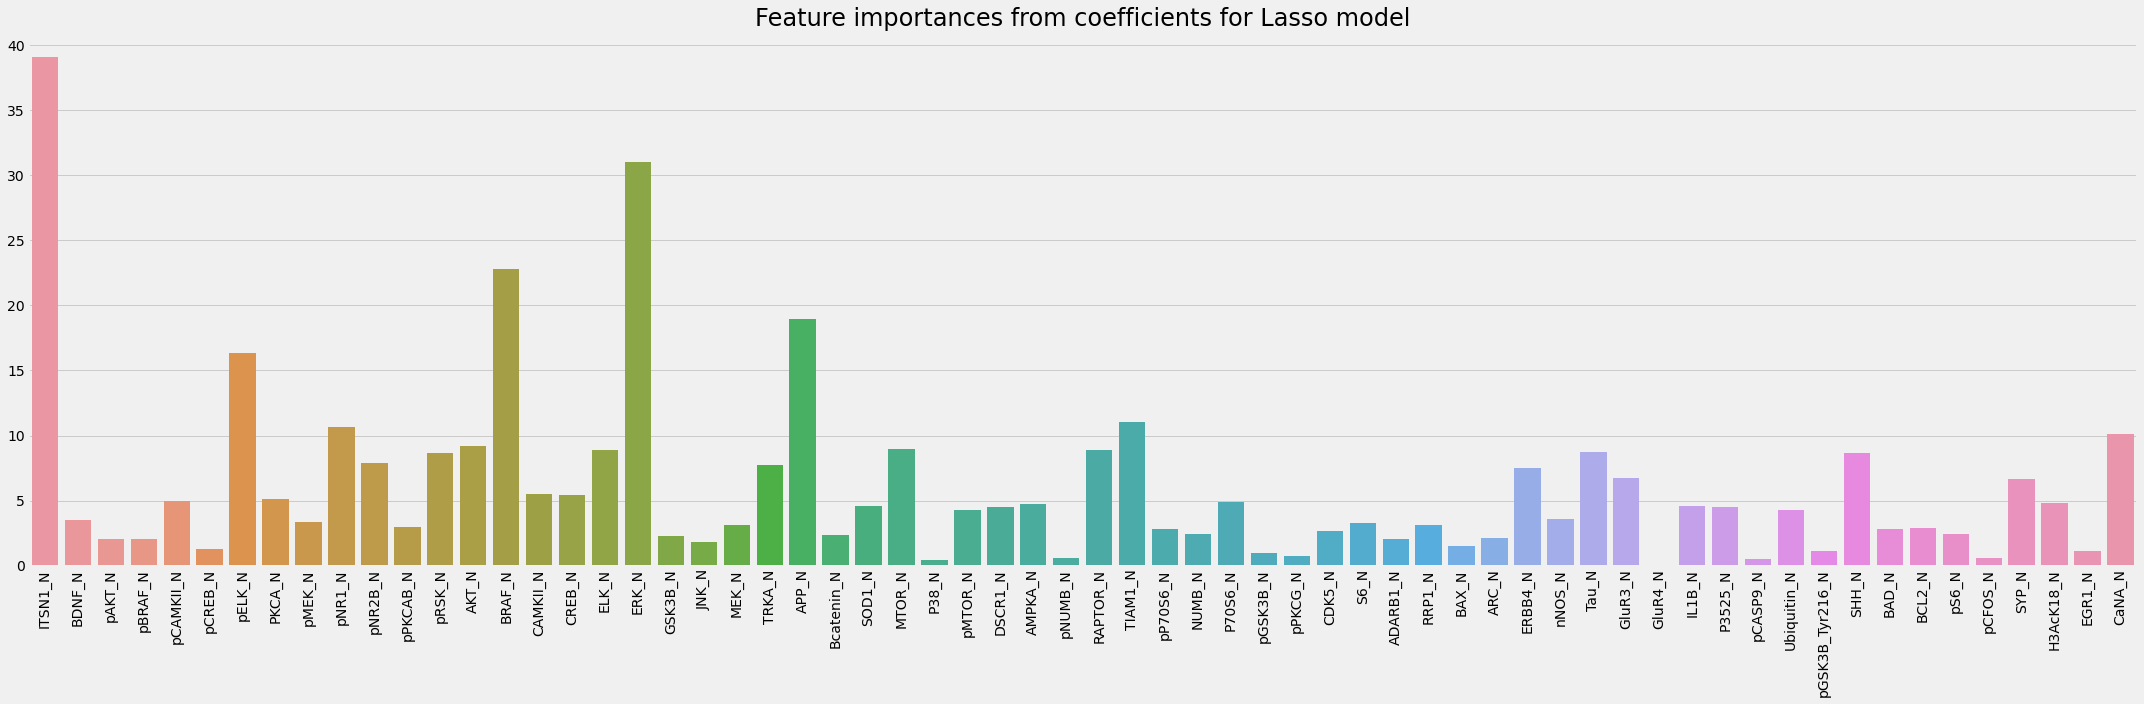

----------------------------------------------------------------------------------------------------
Time spent on Lasso: 0.118 minutes (i.e. 7.1 seconds).
____________________________________________________________________________________________________ 


Testing Ridge with {'penalty': ['l2'], 'C': [0.1, 1, 10, 100, 1000, 1500, 2000, 2500, 3000], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Ridge:
{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Ridge on train and test:
1.0 0.9629
----------------------------------------------------------------------------------------------------
macro ROC-AUC score rounded till 4 decimals for Ridge on train and test:
1.0 0.9625
------------------------------------------------

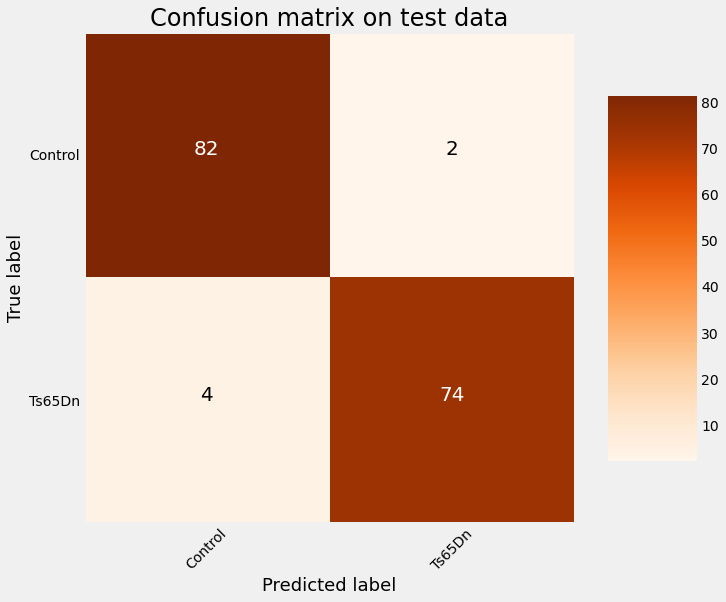

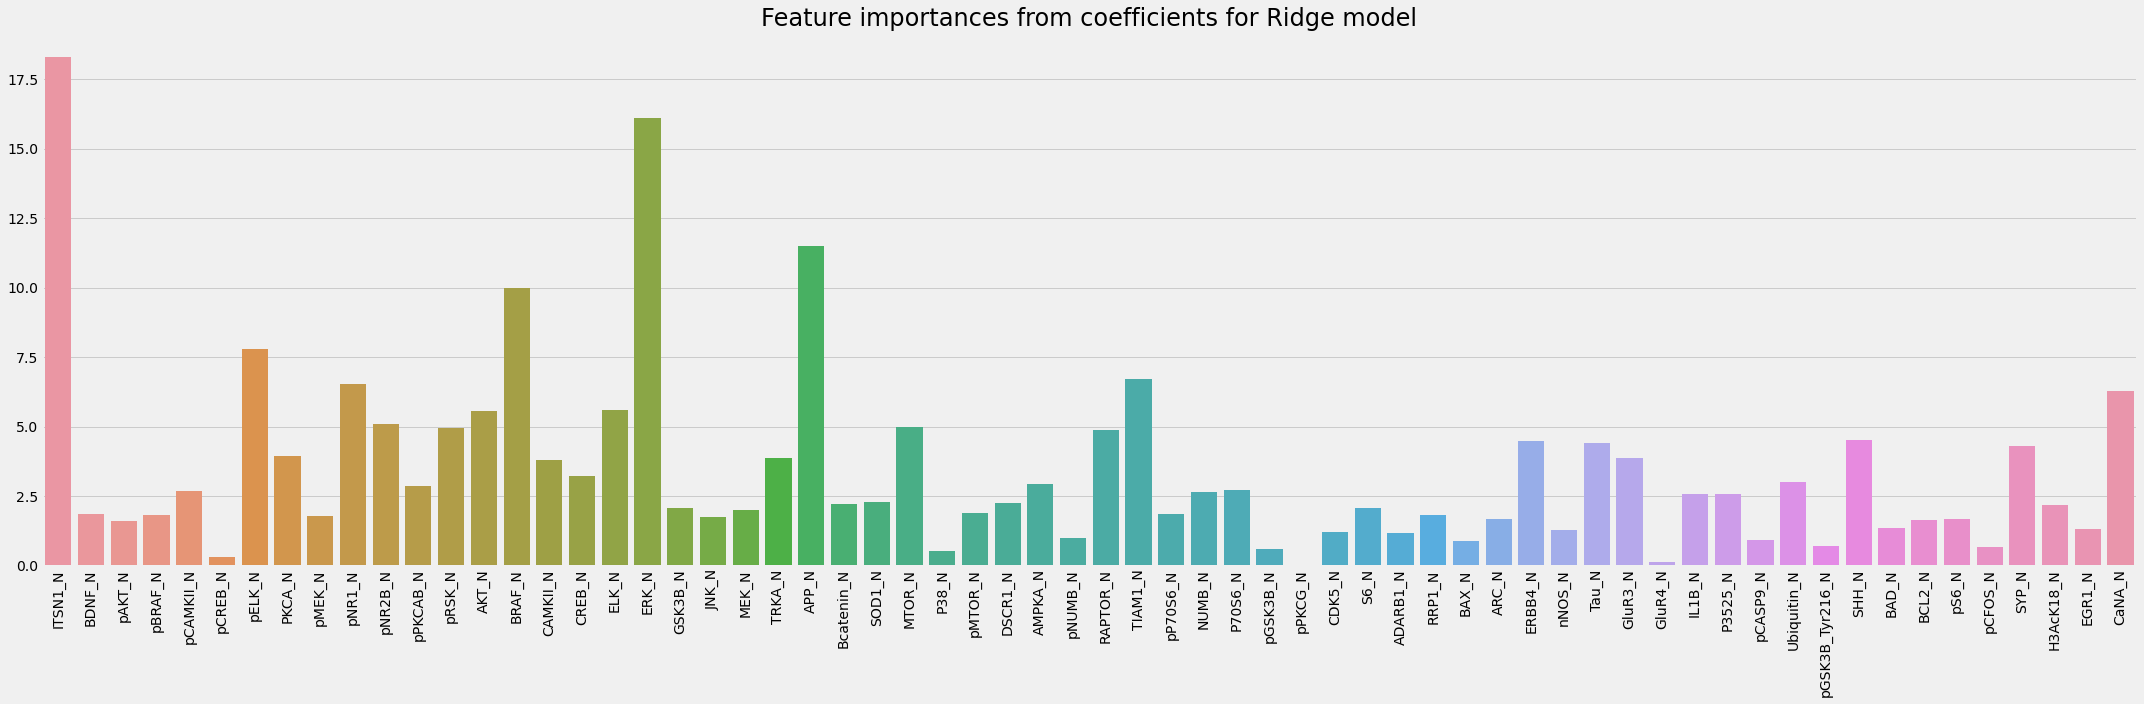

----------------------------------------------------------------------------------------------------
Time spent on Ridge: 0.157 minutes (i.e. 9.4 seconds).
____________________________________________________________________________________________________ 


Testing Elastic Net with {'penalty': ['elasticnet'], 'C': [0.001, 0.1, 1, 10, 100, 150, 1000], 'l1_ratio': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.8, 0.9], 'solver': ['saga']}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Elastic Net:
{'C': 0.1, 'l1_ratio': 0.01, 'penalty': 'elasticnet', 'solver': 'saga'}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Elastic Net on train and test:
0.9759 0.9629
----------------------------------------------------------------------------------------------------
macro ROC-AUC score rounded till 4 decimals for Elastic Net o

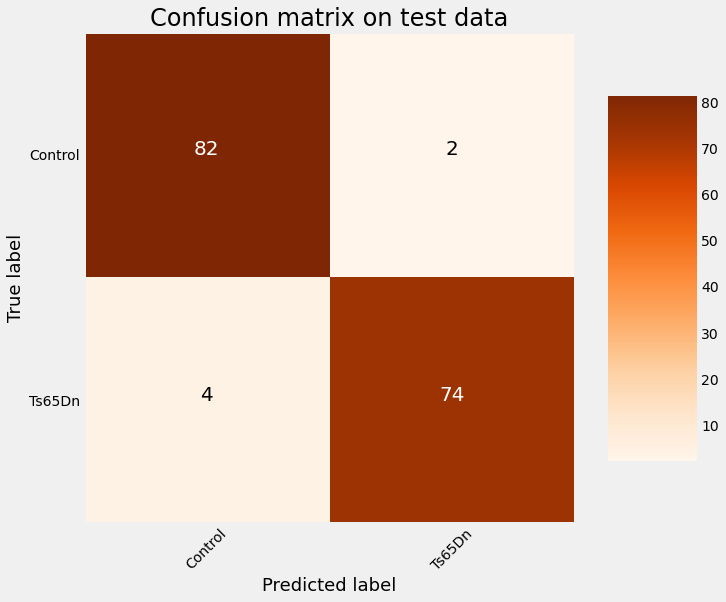

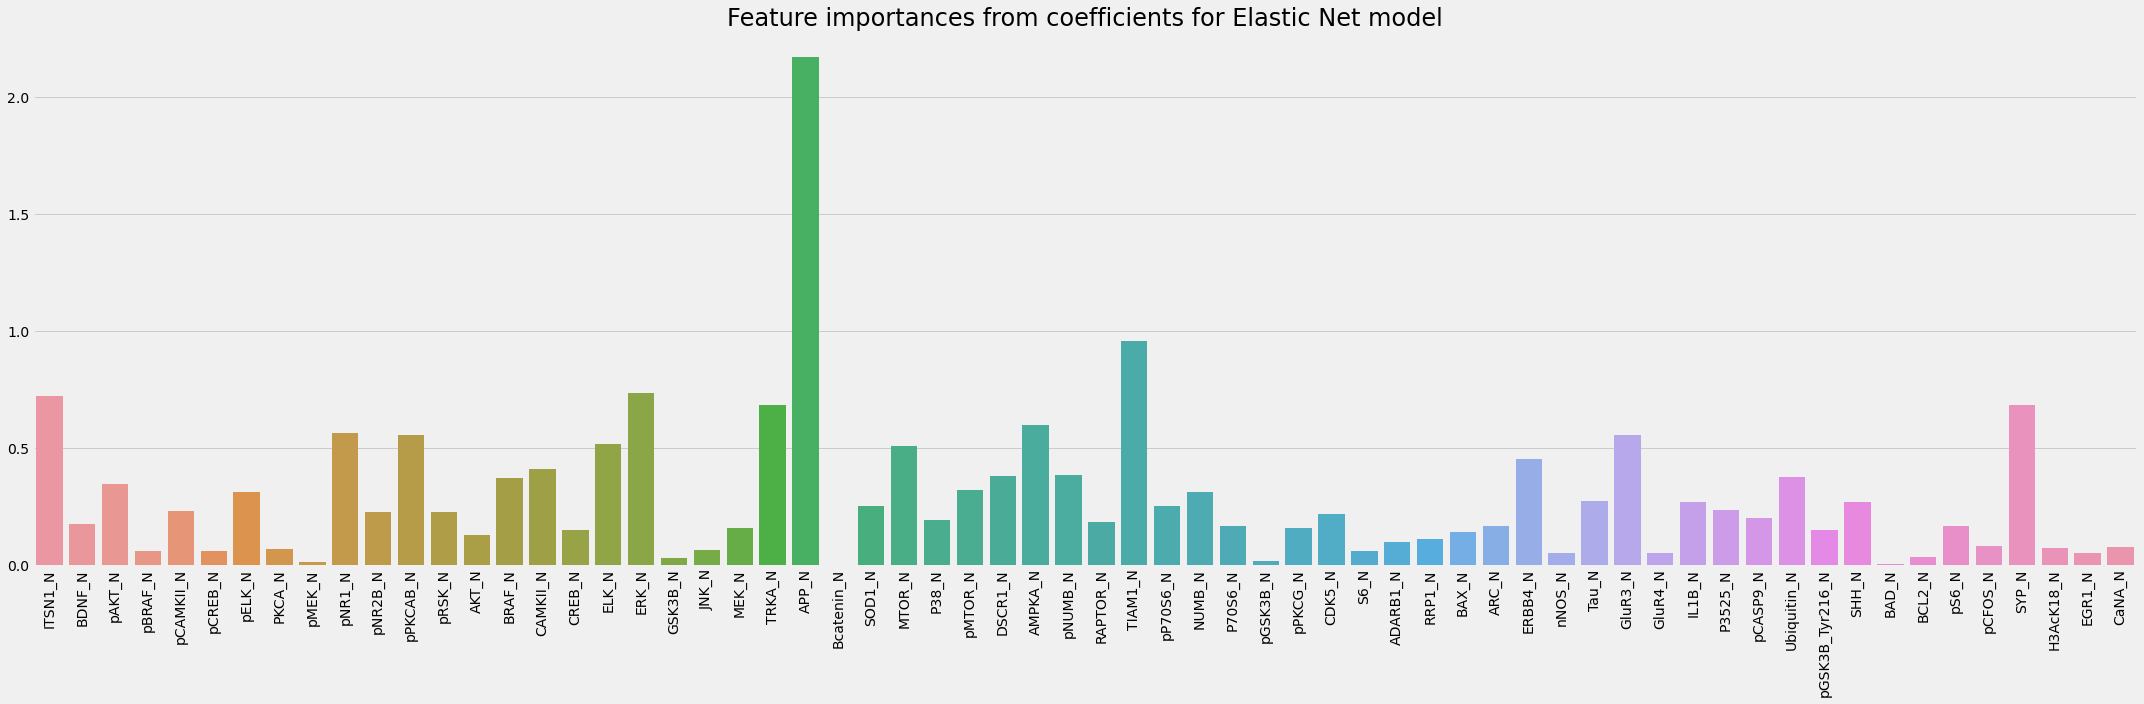

----------------------------------------------------------------------------------------------------
Time spent on Elastic Net: 0.390 minutes (i.e. 23.4 seconds).
____________________________________________________________________________________________________ 


Testing Random Forest Classifier with {'n_estimators': [1, 10, 100, 500], 'max_depth': [10, 500, 700], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12]}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Random Forest Classifier:
{'max_depth': 500, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 500}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Random Forest Classifier on train and test:
1.0 0.9876
-----------------------------------------------------------------------------------

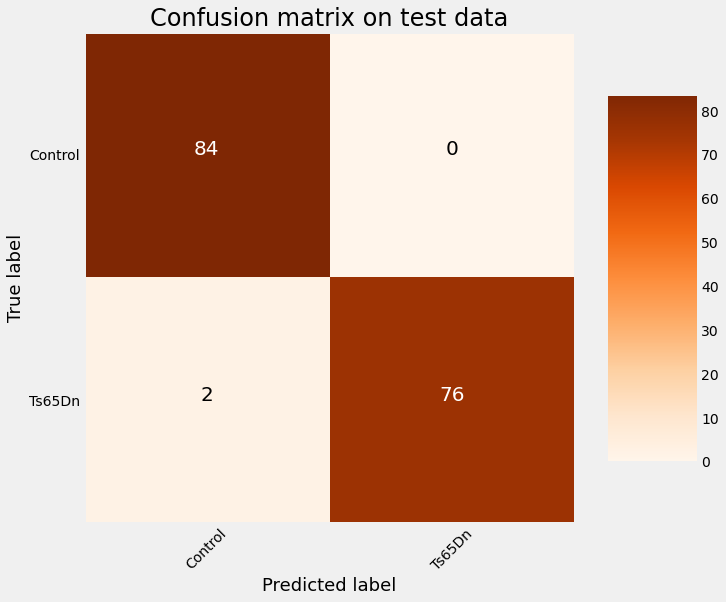

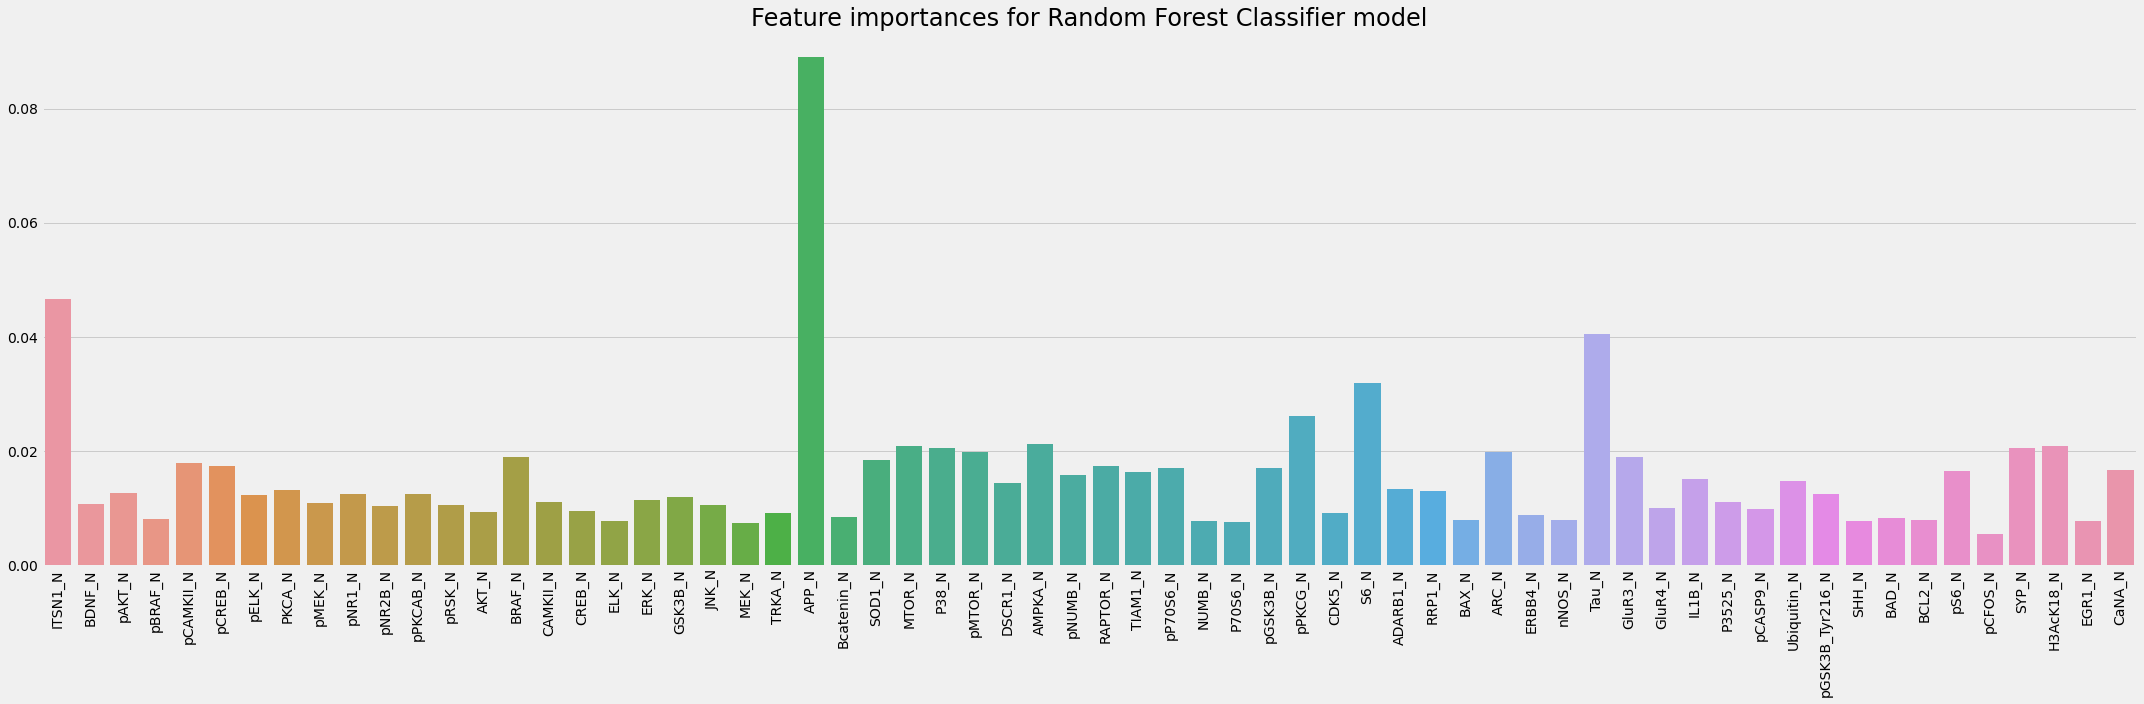

----------------------------------------------------------------------------------------------------
Time spent on Random Forest Classifier: 5.505 minutes (i.e. 330.3 seconds).
____________________________________________________________________________________________________ 


Testing Support Vector Classifier with {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 2, 3, 4], 'gamma': ['scale', 'auto'], 'C': [0.1, 1, 10, 100]}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Support Vector Classifier:
{'C': 10, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Support Vector Classifier on train and test:
1.0 0.9938
----------------------------------------------------------------------------------------------------
macro ROC-AUC score rounded till 4 decimal

F-1 score on train  ...  ROC-AUC score on test
Model name                                     ...                       
Lasso                                  1.0000  ...                 0.9629
Ridge                                  1.0000  ...                 0.9625
Elastic Net                            0.9759  ...                 0.9625
Random Forest Classifier               1.0000  ...                 0.9872
Support Vector Classifier              1.0000  ...                 0.9940

[5 rows x 4 columns]

----------------------------------------------------------------------------------------------------


 ____________________________________________________________________________________________________
Time spent on all models: 6.528 minutes (i.e. 391.7 seconds).
____________________________________________________________________________________________________


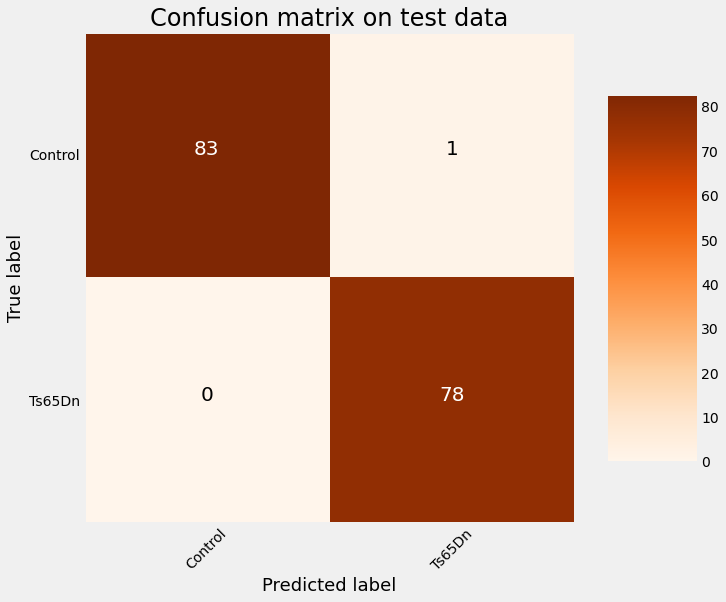

In [ ]:
test_GridSearchCV_models(models_dict=models_dict, hyperparam_grids_list=hyperparam_grids_list, 
                         X_train=reduced_lasso_X_train, y_train=y_train, X_test=reduced_lasso_X_test, y_test=y_test,
                         metric_average = 'macro', target_classes=['Control', 'Ts65Dn'])

### 2. Using data obtained from feature elimination based on high correlation

Testing Lasso with {'penalty': ['l1'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000], 'solver': ['liblinear', 'saga']}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Lasso:
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Lasso on train and test:
0.9694 0.9442
----------------------------------------------------------------------------------------------------
macro ROC-AUC score rounded till 4 decimals for Lasso on train and test:
0.9689 0.9432
----------------------------------------------------------------------------------------------------
Classification report for Lasso on training data: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       486
           1       0.98      0.96      0.97       432

    accu

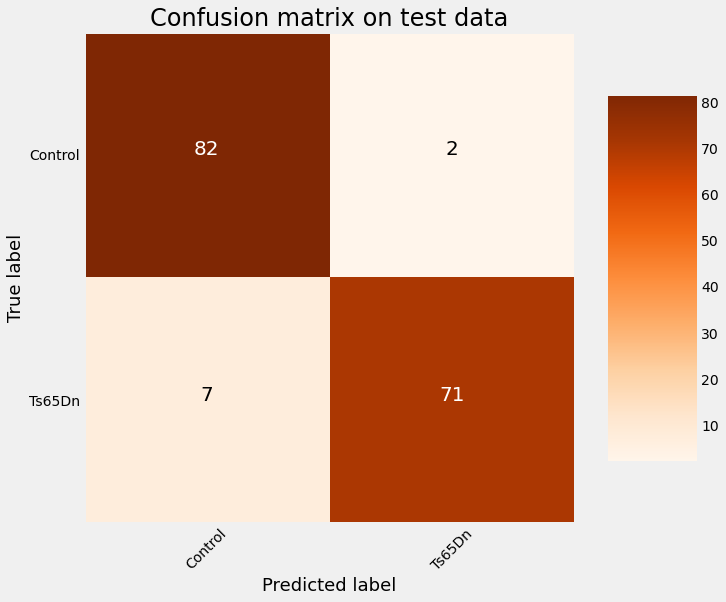

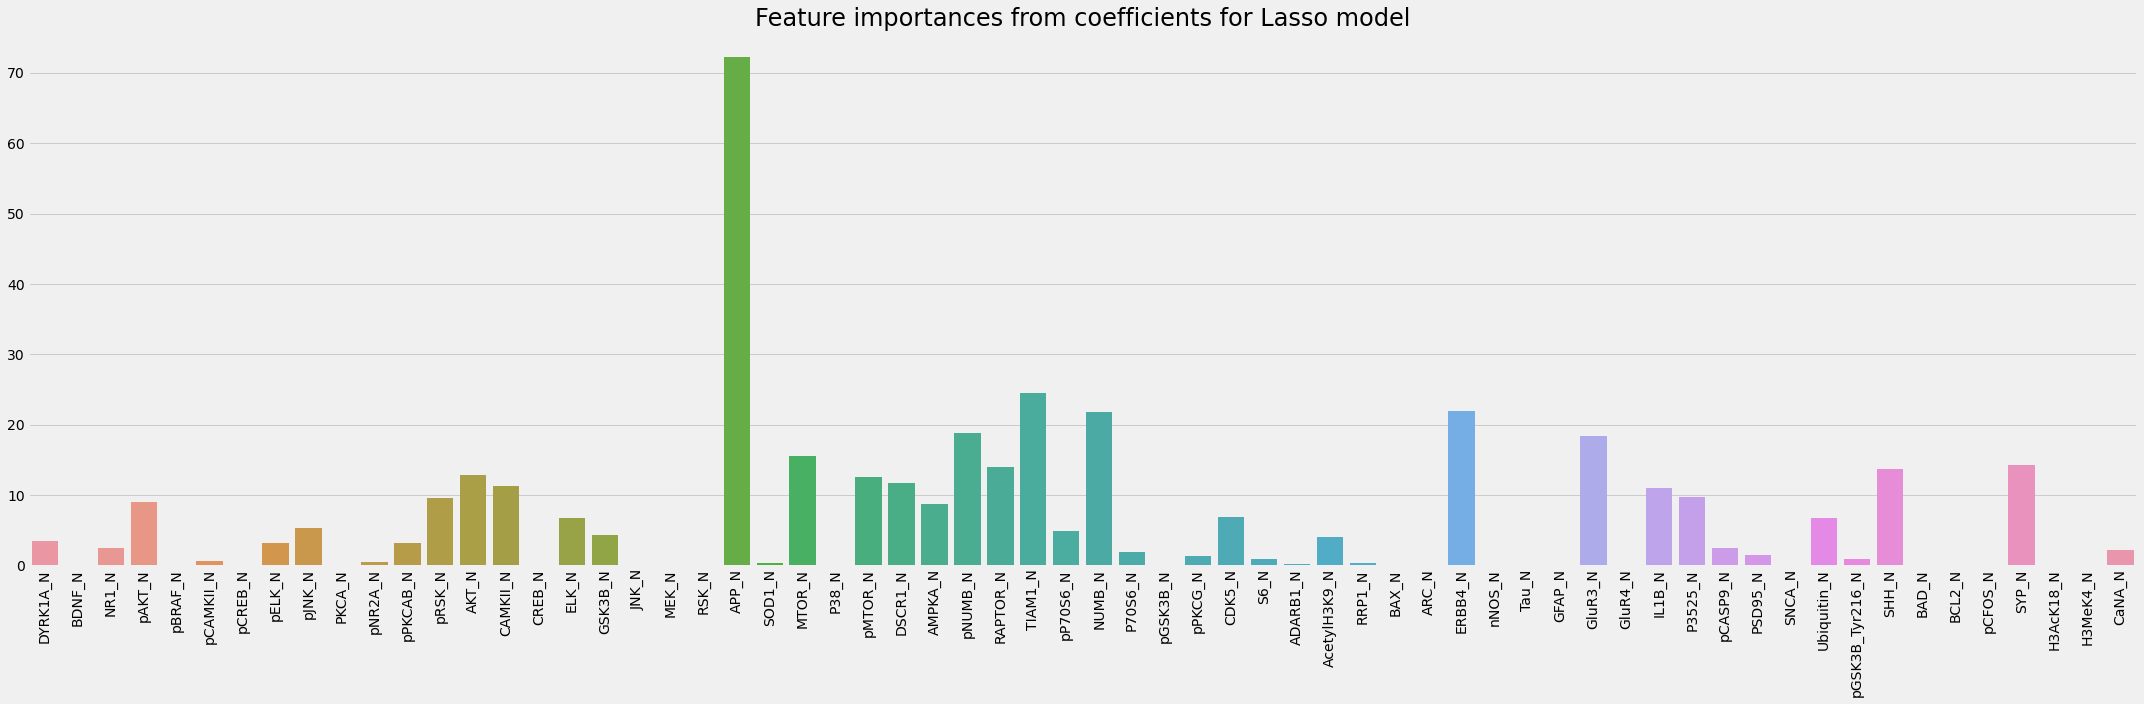

----------------------------------------------------------------------------------------------------
Time spent on Lasso: 0.693 minutes (i.e. 41.6 seconds).
____________________________________________________________________________________________________ 


Testing Ridge with {'penalty': ['l2'], 'C': [0.1, 1, 10, 100, 1000, 1500, 2000, 2500, 3000], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Ridge:
{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Ridge on train and test:
0.965 0.9443
----------------------------------------------------------------------------------------------------
macro ROC-AUC score rounded till 4 decimals for Ridge on train and test:
0.9645 0.9437
------------------------------------------

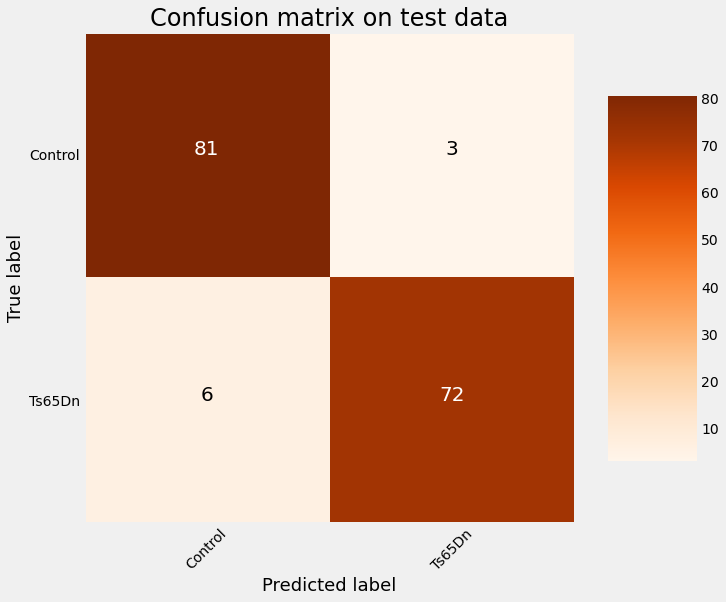

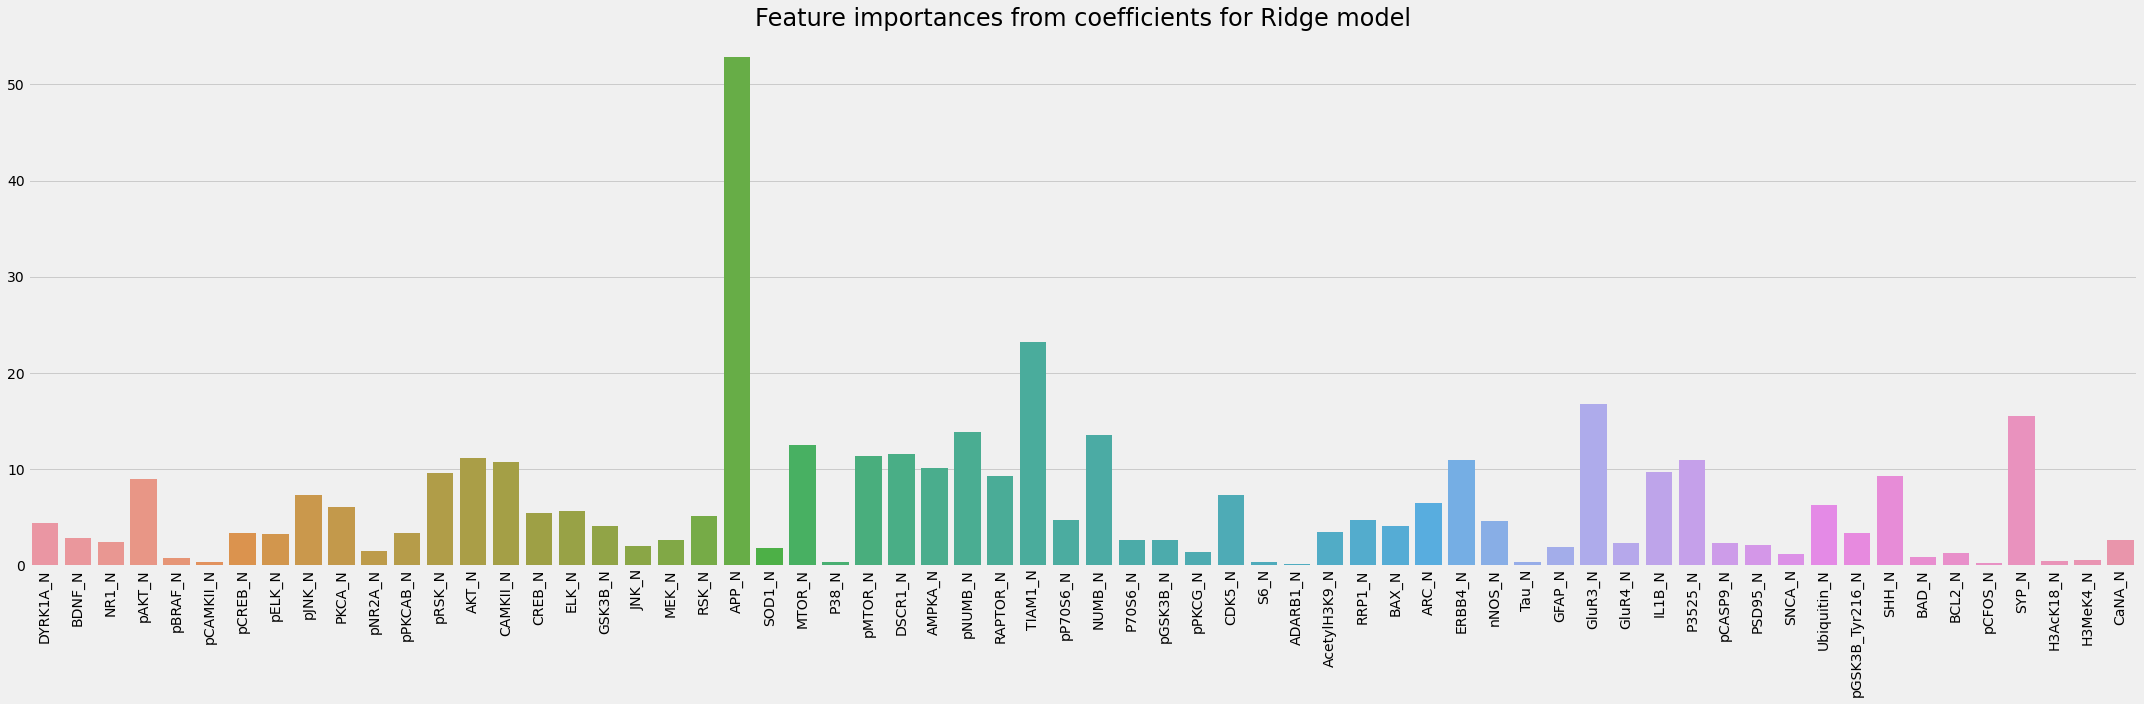

----------------------------------------------------------------------------------------------------
Time spent on Ridge: 0.175 minutes (i.e. 10.5 seconds).
____________________________________________________________________________________________________ 


Testing Elastic Net with {'penalty': ['elasticnet'], 'C': [0.001, 0.1, 1, 10, 100, 150, 1000], 'l1_ratio': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.8, 0.9], 'solver': ['saga']}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Elastic Net:
{'C': 10, 'l1_ratio': 1e-05, 'penalty': 'elasticnet', 'solver': 'saga'}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Elastic Net on train and test:
0.9311 0.8765
----------------------------------------------------------------------------------------------------
macro ROC-AUC score rounded till 4 decimals for Elastic Net 

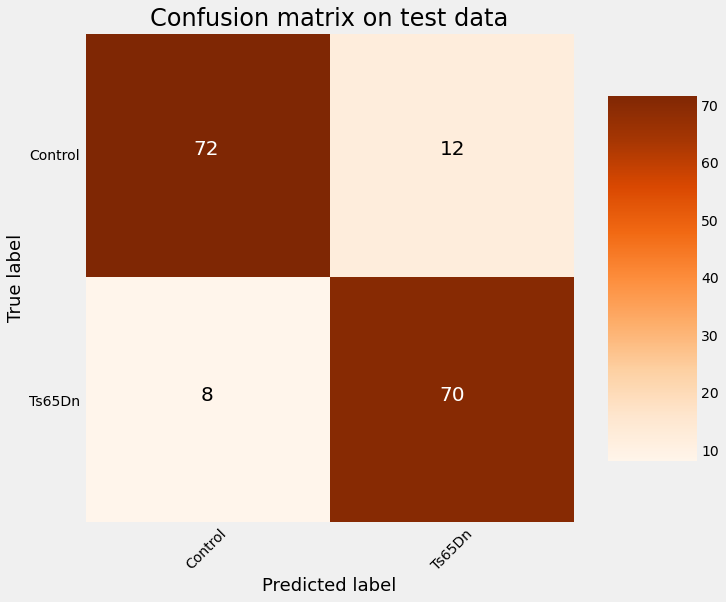

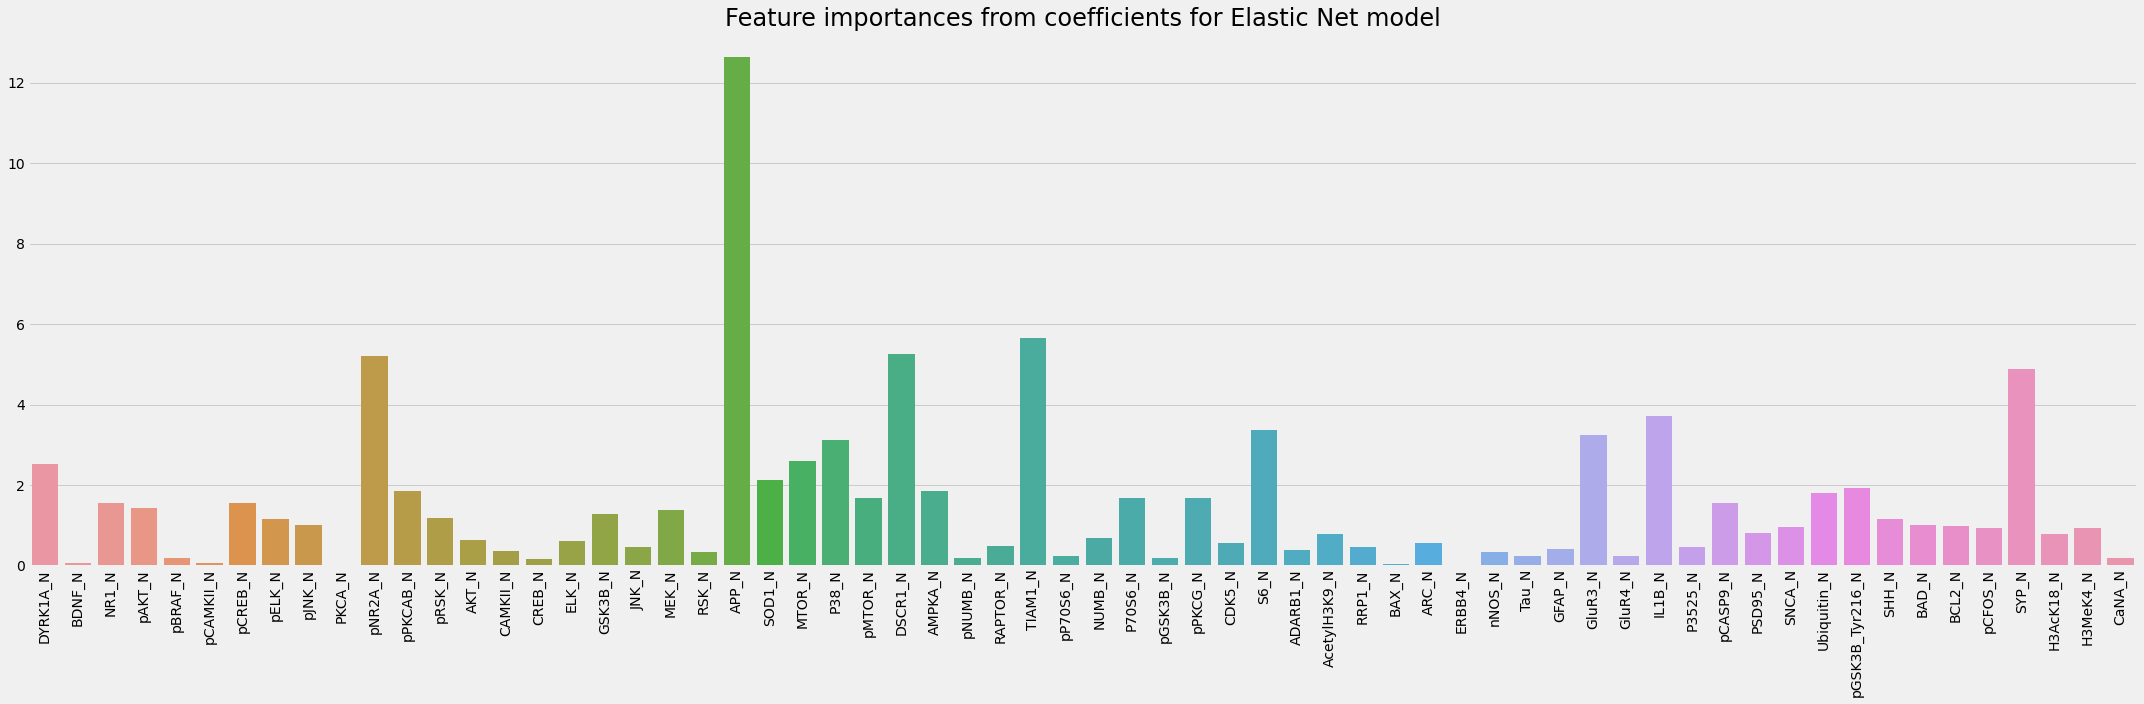

----------------------------------------------------------------------------------------------------
Time spent on Elastic Net: 0.404 minutes (i.e. 24.2 seconds).
____________________________________________________________________________________________________ 


Testing Random Forest Classifier with {'n_estimators': [1, 10, 100, 500], 'max_depth': [10, 500, 700], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12]}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Random Forest Classifier:
{'max_depth': 500, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 500}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Random Forest Classifier on train and test:
1.0 0.9814
----------------------------------------------------------------------------------

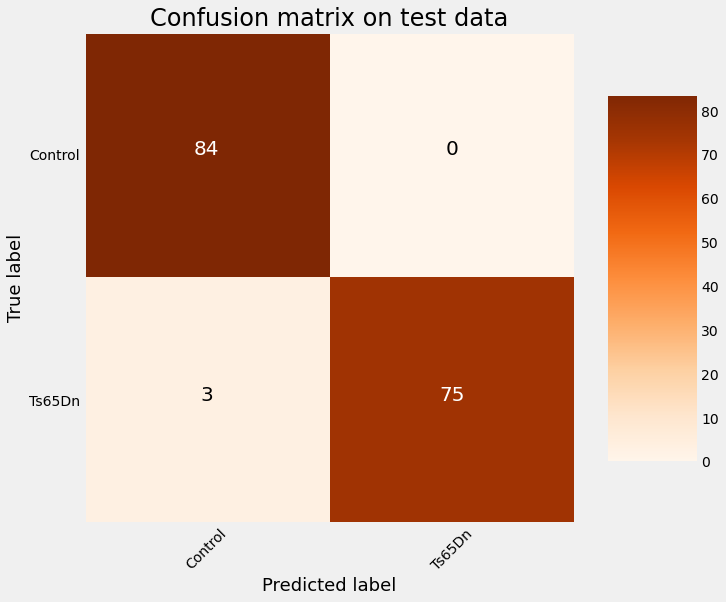

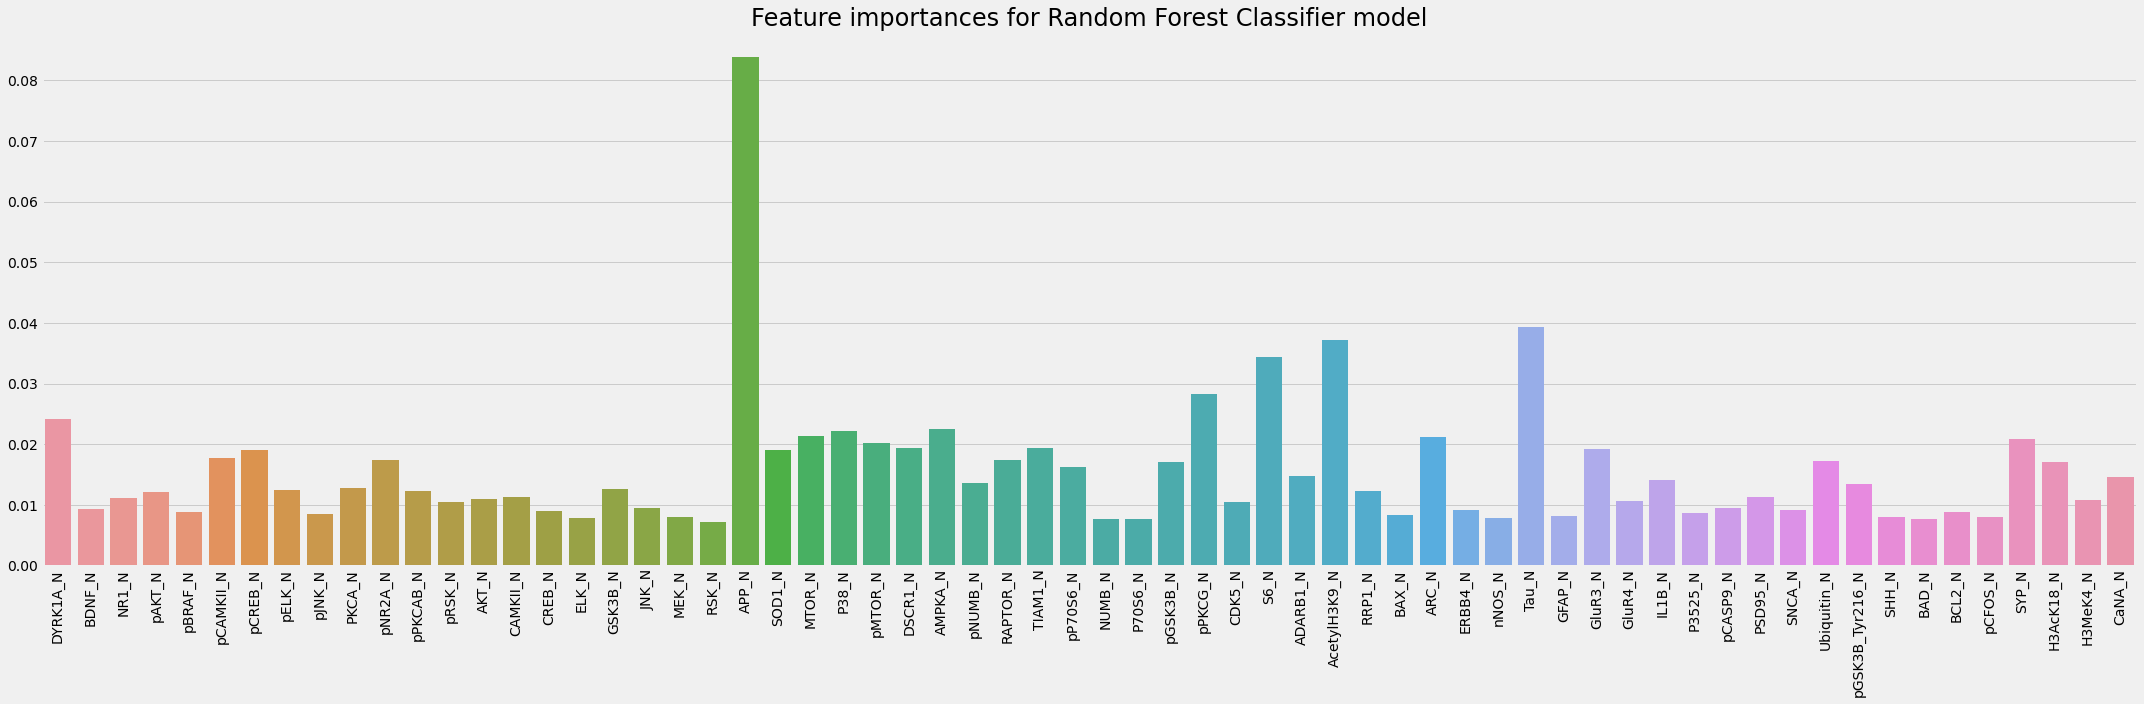

----------------------------------------------------------------------------------------------------
Time spent on Random Forest Classifier: 5.529 minutes (i.e. 331.7 seconds).
____________________________________________________________________________________________________ 


Testing Support Vector Classifier with {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 2, 3, 4], 'gamma': ['scale', 'auto'], 'C': [0.1, 1, 10, 100]}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Support Vector Classifier:
{'C': 100, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Support Vector Classifier on train and test:
0.9989 0.9876
----------------------------------------------------------------------------------------------------
macro ROC-AUC score rounded till 4 dec

F-1 score on train  ...  ROC-AUC score on test
Model name                                     ...                       
Lasso                                  0.9694  ...                 0.9432
Ridge                                  0.9650  ...                 0.9437
Elastic Net                            0.9311  ...                 0.8773
Random Forest Classifier               1.0000  ...                 0.9808
Support Vector Classifier              0.9989  ...                 0.9876

[5 rows x 4 columns]

----------------------------------------------------------------------------------------------------


 ____________________________________________________________________________________________________
Time spent on all models: 7.292 minutes (i.e. 437.5 seconds).
____________________________________________________________________________________________________


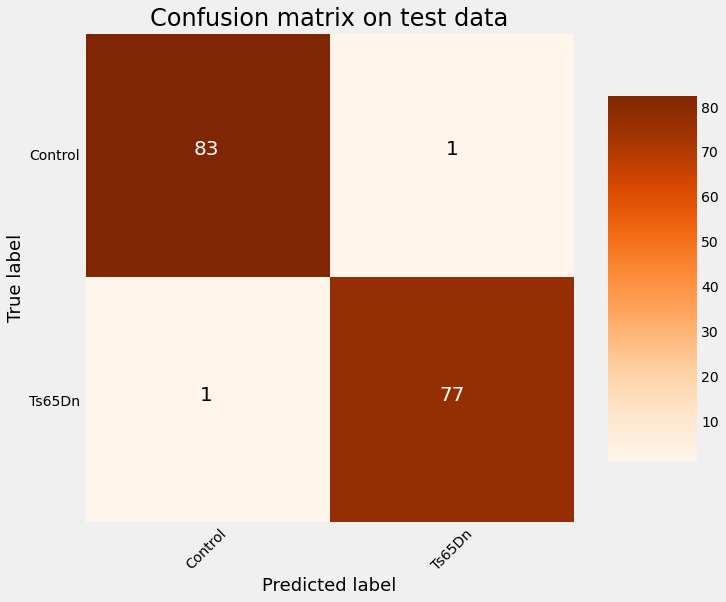

In [ ]:
test_GridSearchCV_models(models_dict=models_dict, hyperparam_grids_list=hyperparam_grids_list, 
                         X_train=reduced_high_correlation_X_train, y_train=y_train, X_test=reduced_high_correlation_X_test, y_test=y_test,
                         metric_average = 'macro', target_classes=['Control', 'Ts65Dn'])

### 3. Using data obtained from recursive feature elimination using RFECV with RFC as estimator 

#### a). Using reduced input data from RFECV with ROC-AUC scoring

Testing Lasso with {'penalty': ['l1'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000], 'solver': ['liblinear', 'saga']}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Lasso:
{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Lasso on train and test:
1.0 0.9691
----------------------------------------------------------------------------------------------------
macro ROC-AUC score rounded till 4 decimals for Lasso on train and test:
1.0 0.9689
----------------------------------------------------------------------------------------------------
Classification report for Lasso on training data: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       486
           1       1.00      1.00      1.00       432

    accuracy 

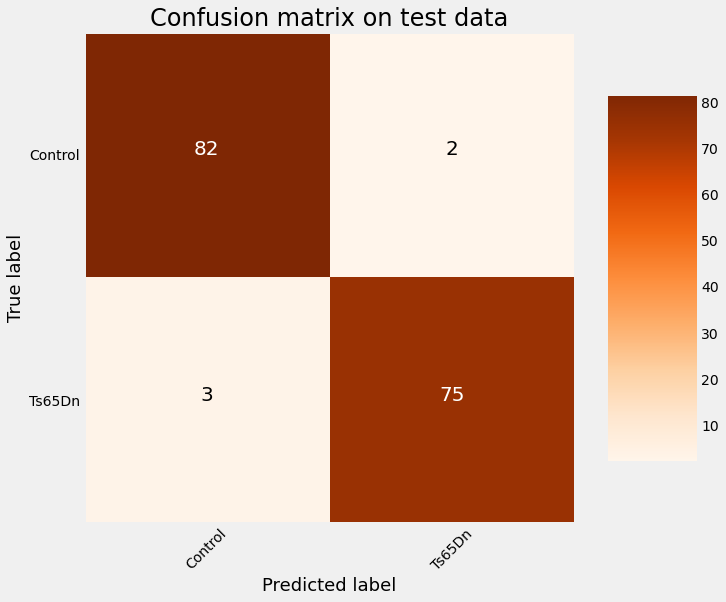

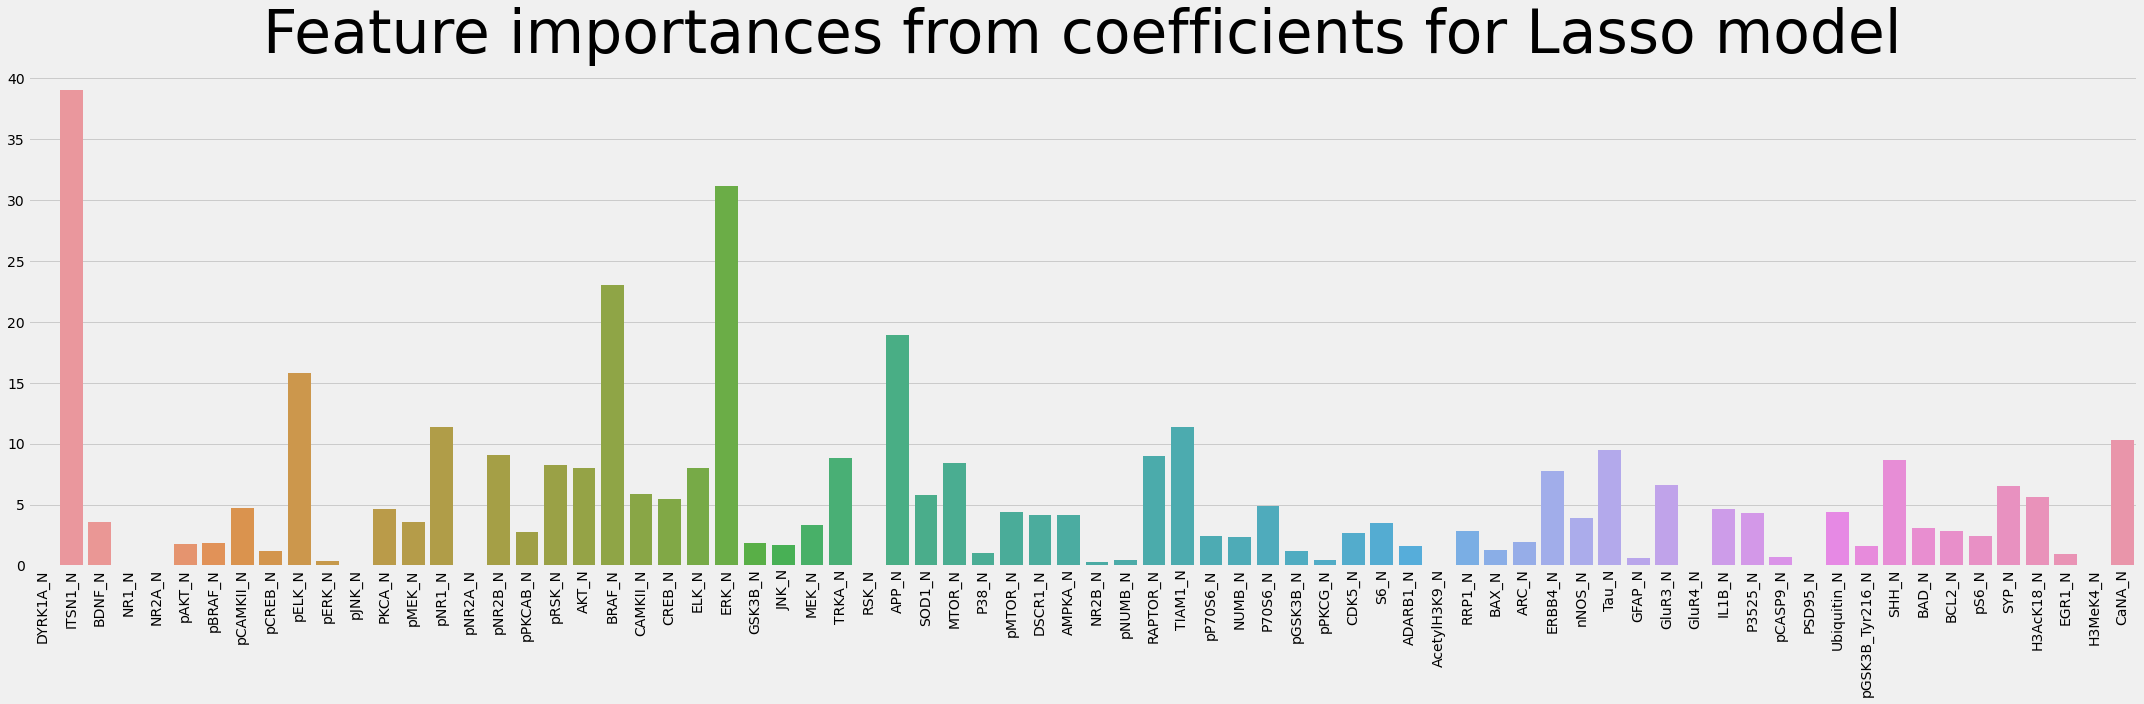

----------------------------------------------------------------------------------------------------
Time spent on Lasso: 0.136 minutes (i.e. 8.2 seconds).
____________________________________________________________________________________________________ 


Testing Ridge with {'penalty': ['l2'], 'C': [0.1, 1, 10, 100, 1000, 1500, 2000, 2500, 3000], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Ridge:
{'C': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Ridge on train and test:
1.0 0.9691
----------------------------------------------------------------------------------------------------
macro ROC-AUC score rounded till 4 decimals for Ridge on train and test:
1.0 0.9689
-----------------------------------------------

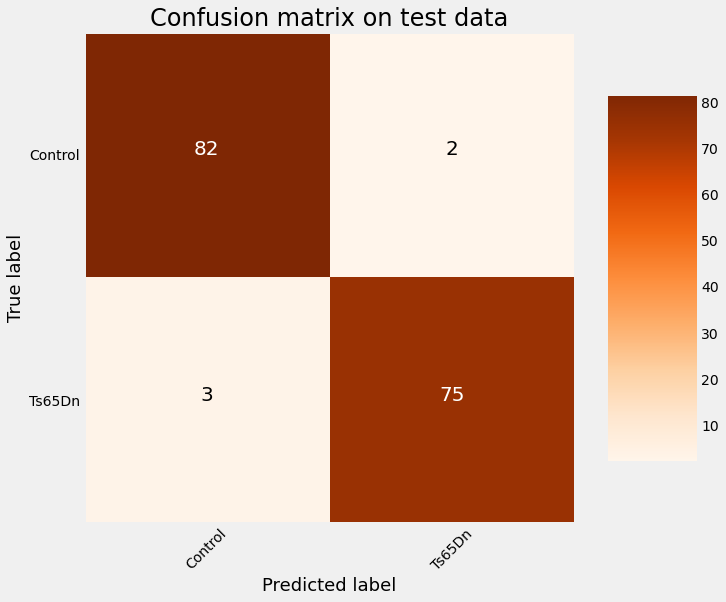

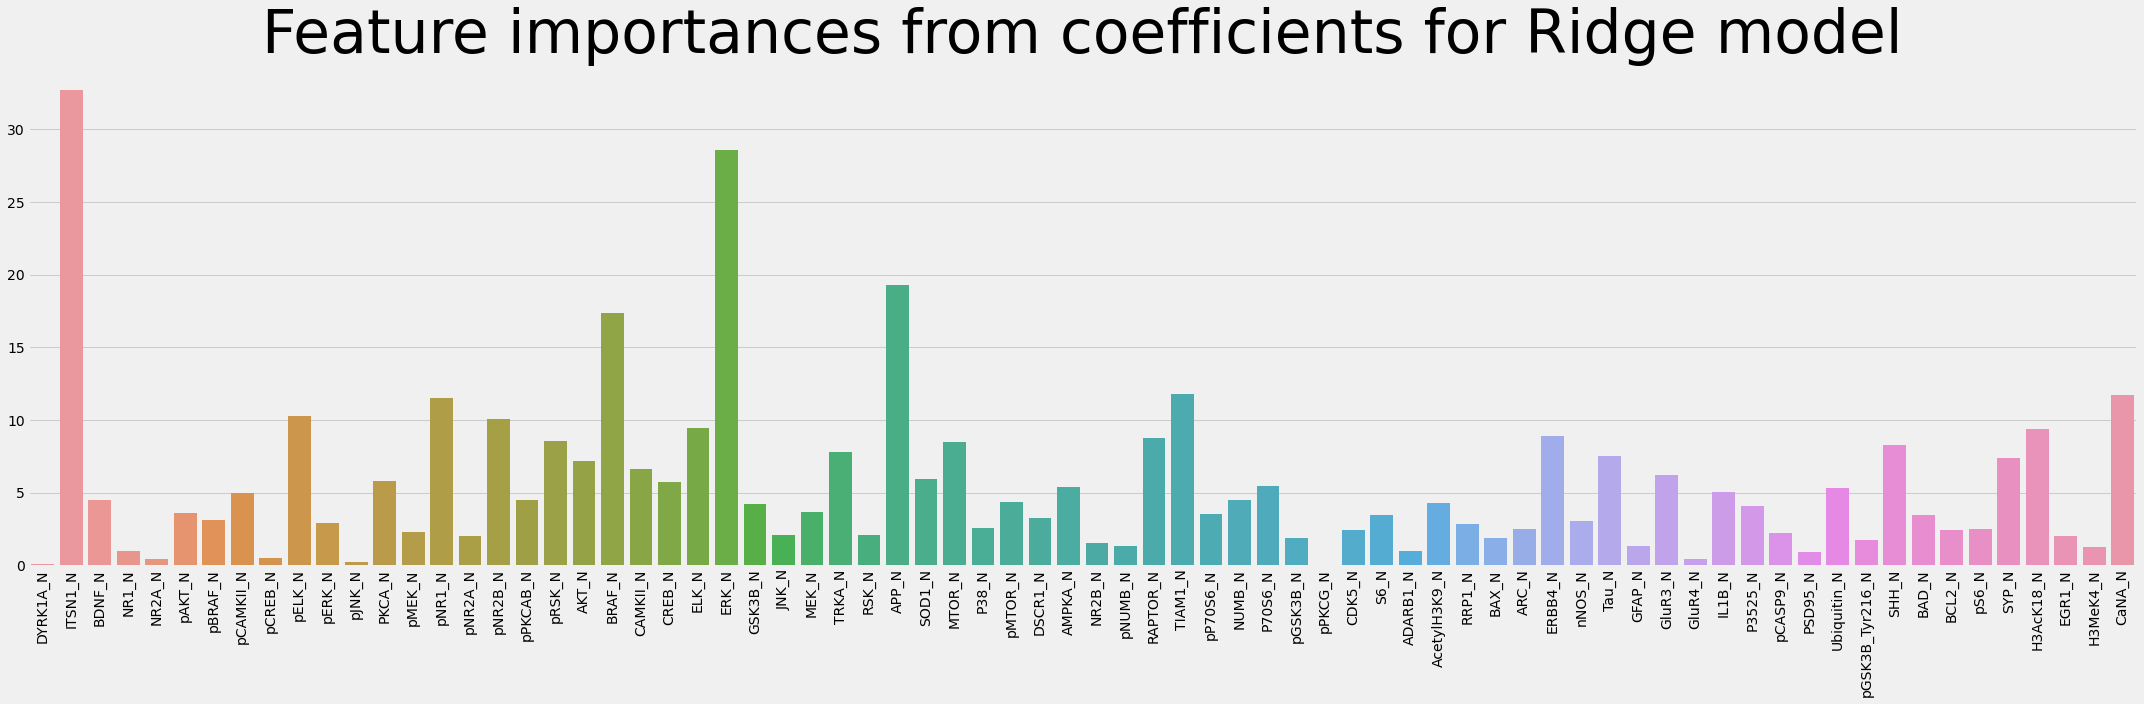

----------------------------------------------------------------------------------------------------
Time spent on Ridge: 0.175 minutes (i.e. 10.5 seconds).
____________________________________________________________________________________________________ 


Testing Elastic Net with {'penalty': ['elasticnet'], 'C': [0.001, 0.1, 1, 10, 100, 150, 1000], 'l1_ratio': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.8, 0.9], 'solver': ['saga']}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Elastic Net:
{'C': 1, 'l1_ratio': 0.8, 'penalty': 'elasticnet', 'solver': 'saga'}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Elastic Net on train and test:
0.9759 0.9814
----------------------------------------------------------------------------------------------------
macro ROC-AUC score rounded till 4 decimals for Elastic Net on 

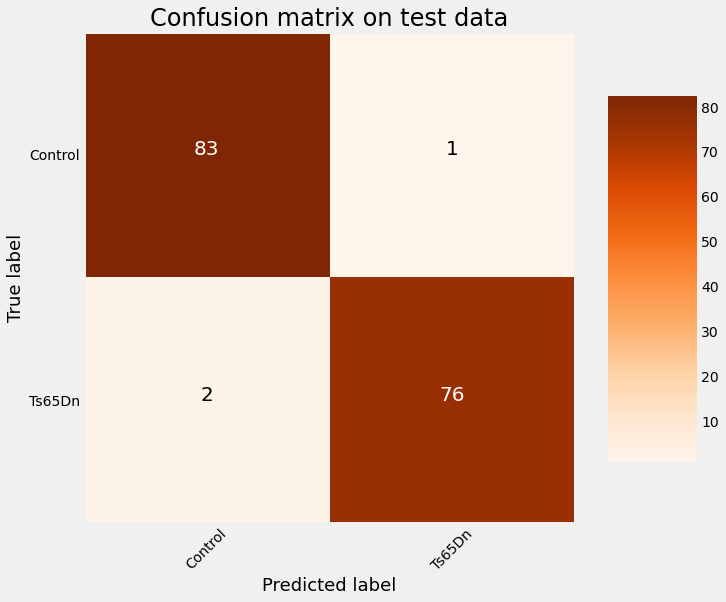

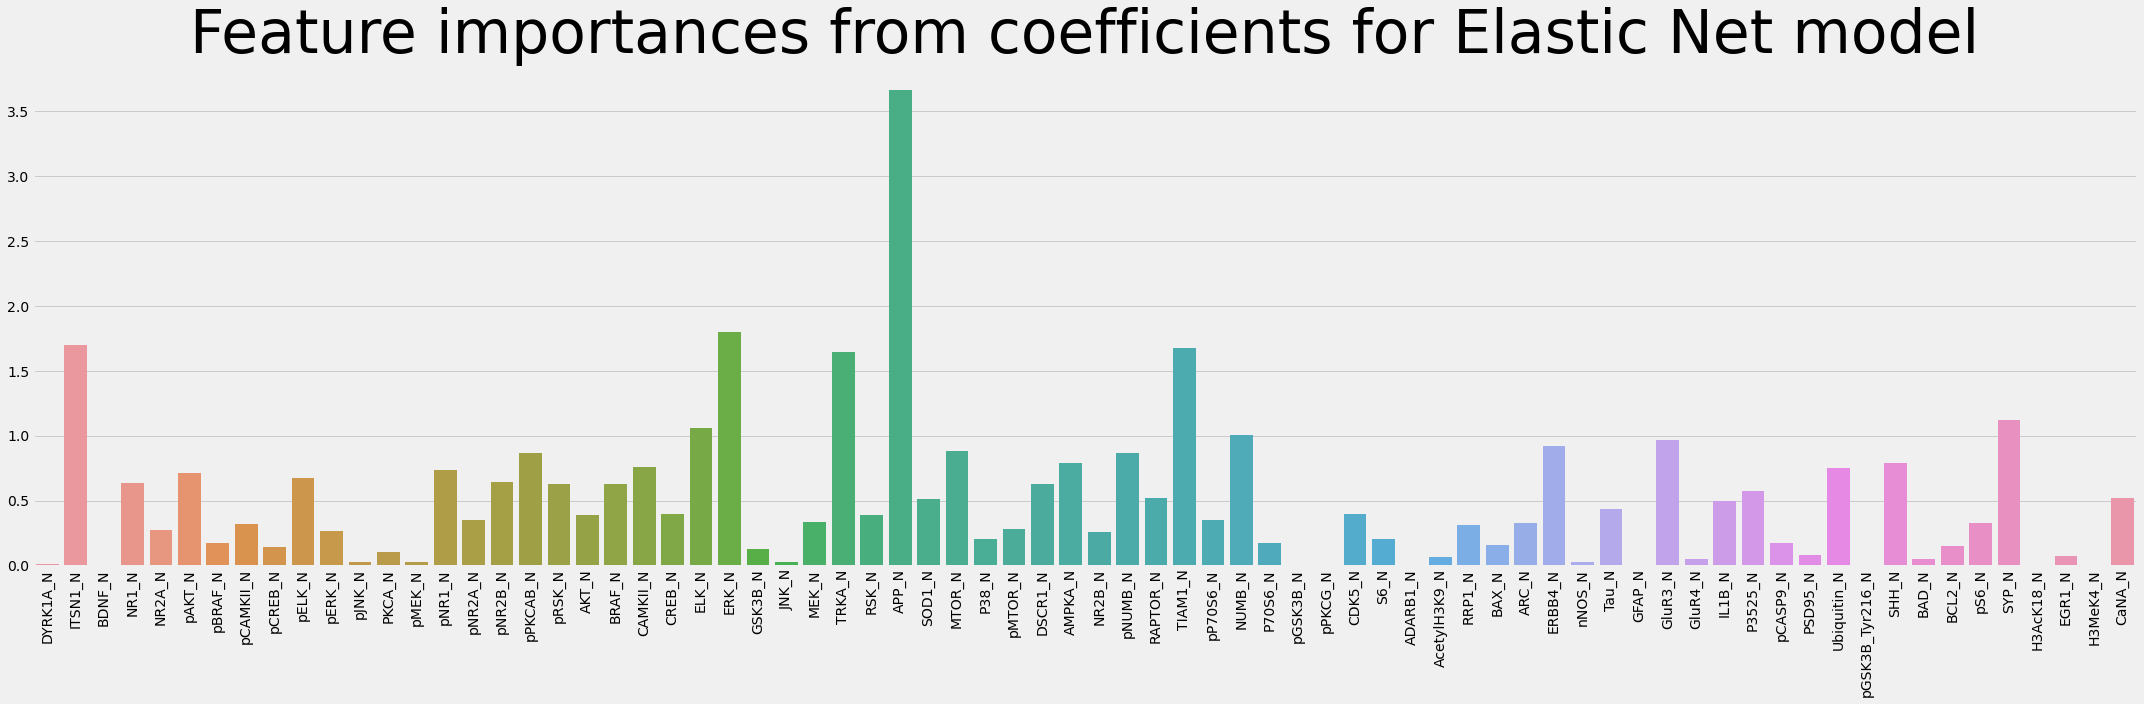

----------------------------------------------------------------------------------------------------
Time spent on Elastic Net: 0.457 minutes (i.e. 27.4 seconds).
____________________________________________________________________________________________________ 


Testing Random Forest Classifier with {'n_estimators': [1, 10, 100, 500], 'max_depth': [10, 500, 700], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12]}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Random Forest Classifier:
{'max_depth': 700, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Random Forest Classifier on train and test:
1.0 0.9814
-----------------------------------------------------------------------------------

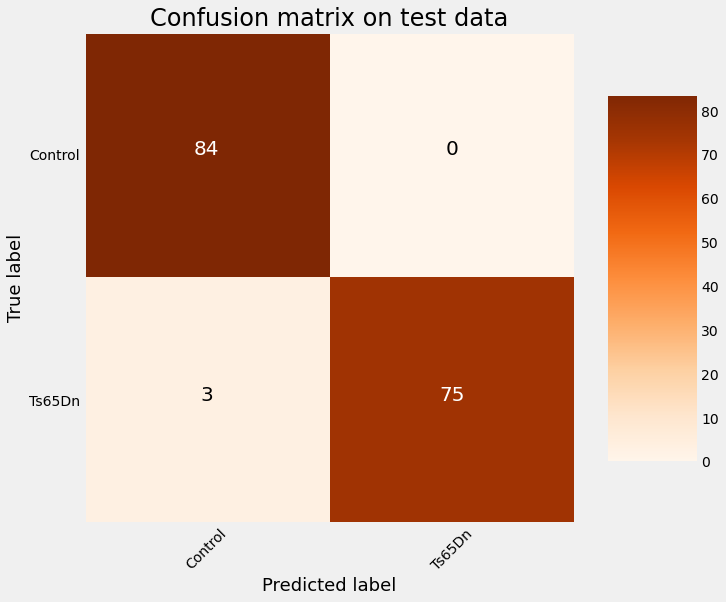

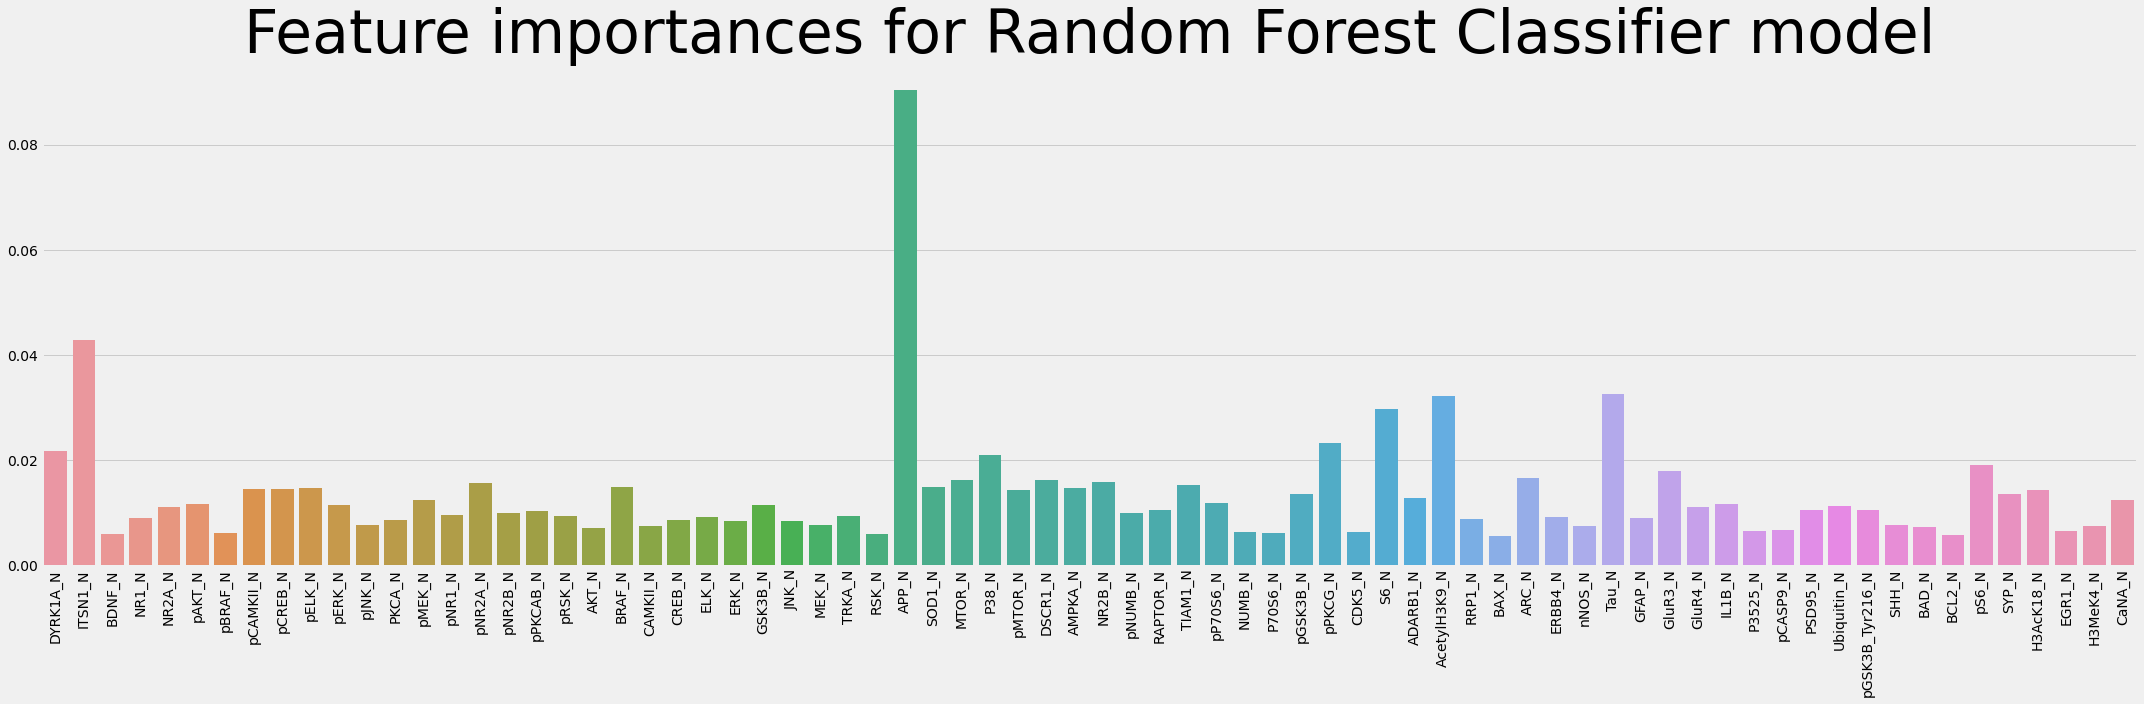

----------------------------------------------------------------------------------------------------
Time spent on Random Forest Classifier: 5.481 minutes (i.e. 328.8 seconds).
____________________________________________________________________________________________________ 


Testing Support Vector Classifier with {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 2, 3, 4], 'gamma': ['scale', 'auto'], 'C': [0.1, 1, 10, 100]}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Support Vector Classifier:
{'C': 10, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Support Vector Classifier on train and test:
1.0 0.9938
----------------------------------------------------------------------------------------------------
macro ROC-AUC score rounded till 4 decimal

F-1 score on train  ...  ROC-AUC score on test
Model name                                     ...                       
Lasso                                  1.0000  ...                 0.9689
Ridge                                  1.0000  ...                 0.9689
Elastic Net                            0.9759  ...                 0.9812
Random Forest Classifier               1.0000  ...                 0.9808
Support Vector Classifier              1.0000  ...                 0.9940

[5 rows x 4 columns]

----------------------------------------------------------------------------------------------------


 ____________________________________________________________________________________________________
Time spent on all models: 6.646 minutes (i.e. 398.7 seconds).
____________________________________________________________________________________________________


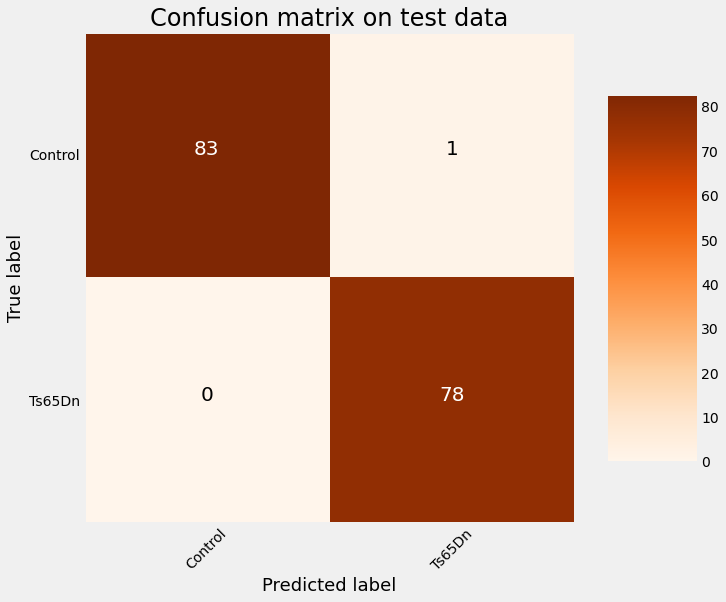

In [ ]:
test_GridSearchCV_models(models_dict=models_dict, hyperparam_grids_list=hyperparam_grids_list, 
                         X_train=reduced_roc_auc_RFC_RFECV_X_train, y_train=y_train, X_test=reduced_roc_auc_RFC_RFECV_X_test, y_test=y_test,
                         metric_average = 'macro', target_classes=['Control', 'Ts65Dn'])

#### b). Using reduced input data from RFECV with accuracy scoring

Testing Lasso with {'penalty': ['l1'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000], 'solver': ['liblinear', 'saga']}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Lasso:
{'C': 10, 'penalty': 'l1', 'solver': 'saga'}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Lasso on train and test:
0.9759 0.9567
----------------------------------------------------------------------------------------------------
macro ROC-AUC score rounded till 4 decimals for Lasso on train and test:
0.9752 0.956
----------------------------------------------------------------------------------------------------
Classification report for Lasso on training data: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       486
           1       0.99      0.96      0.97       432

    accuracy  

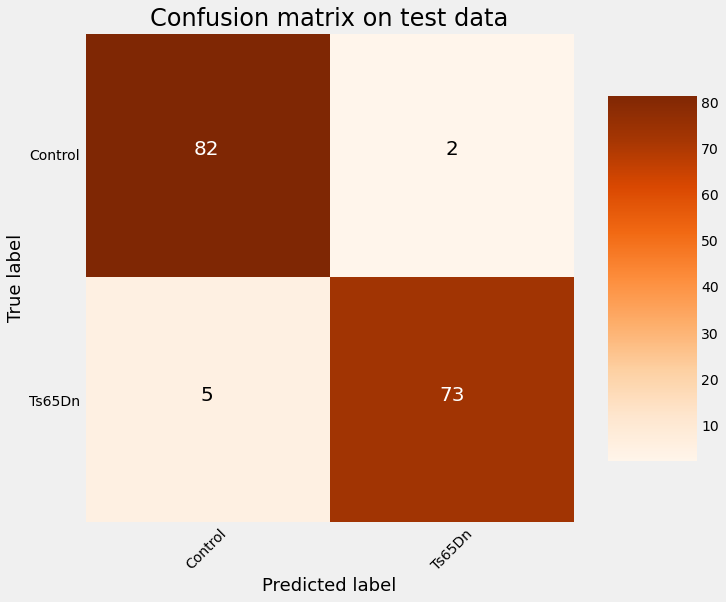

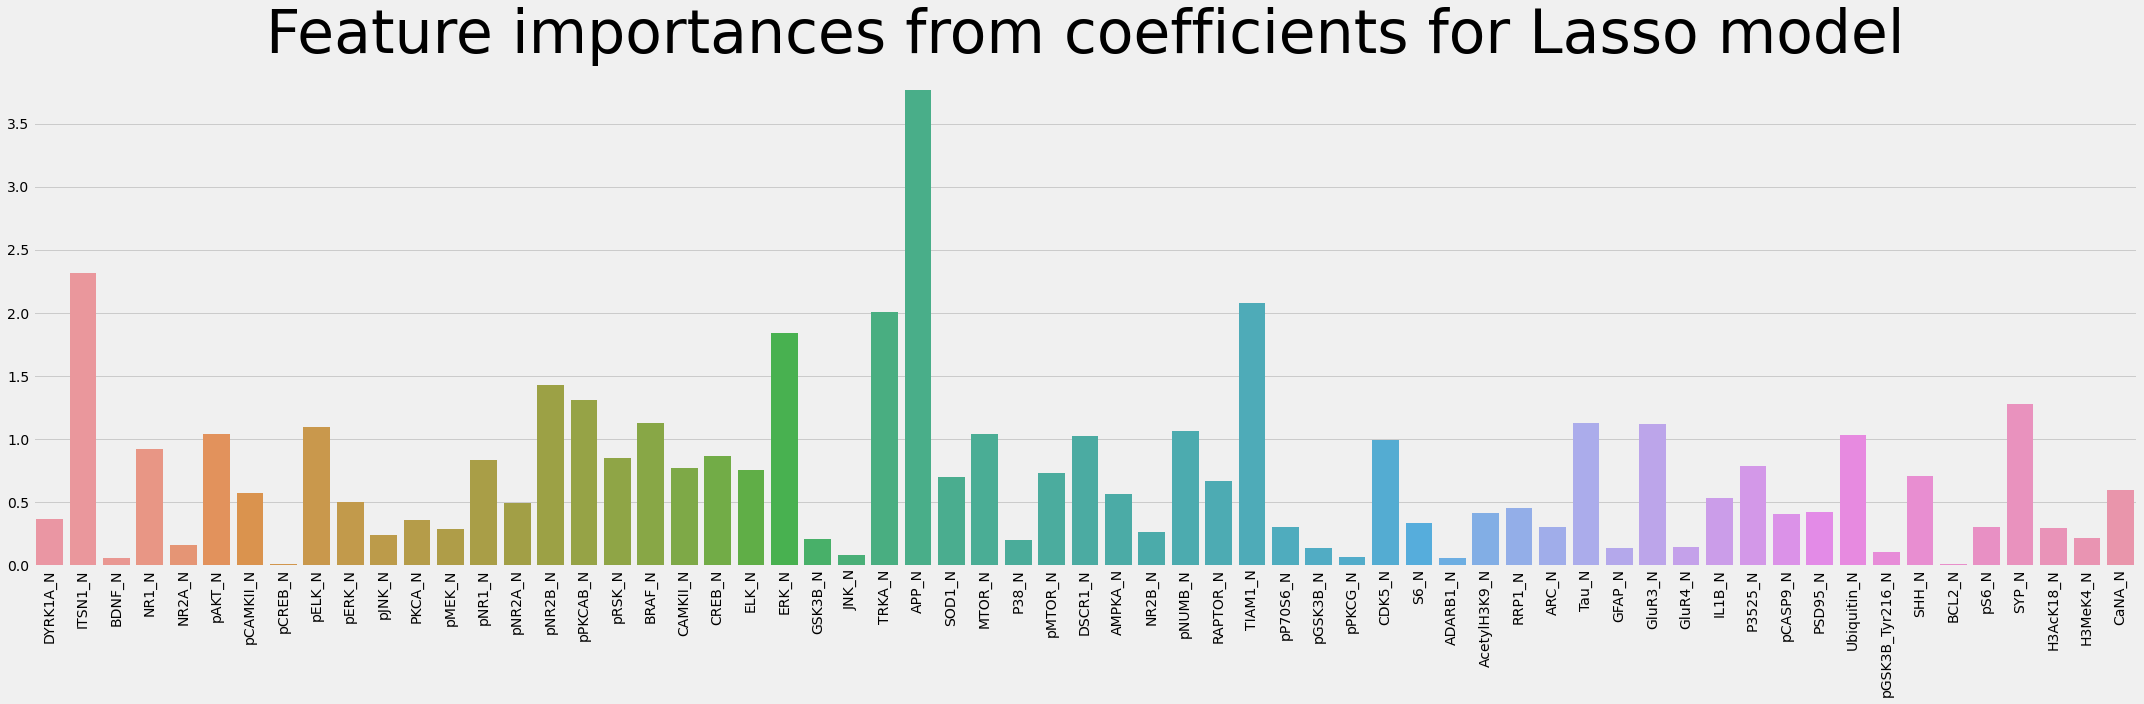

----------------------------------------------------------------------------------------------------
Time spent on Lasso: 0.164 minutes (i.e. 9.8 seconds).
____________________________________________________________________________________________________ 


Testing Ridge with {'penalty': ['l2'], 'C': [0.1, 1, 10, 100, 1000, 1500, 2000, 2500, 3000], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Ridge:
{'C': 10, 'penalty': 'l2', 'solver': 'sag'}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Ridge on train and test:
0.9792 0.9504
----------------------------------------------------------------------------------------------------
macro ROC-AUC score rounded till 4 decimals for Ridge on train and test:
0.9787 0.9496
-------------------------------------------------

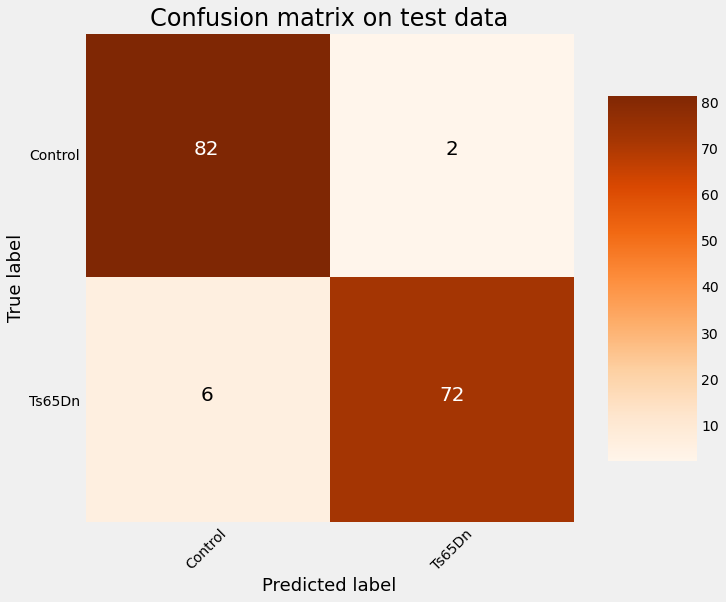

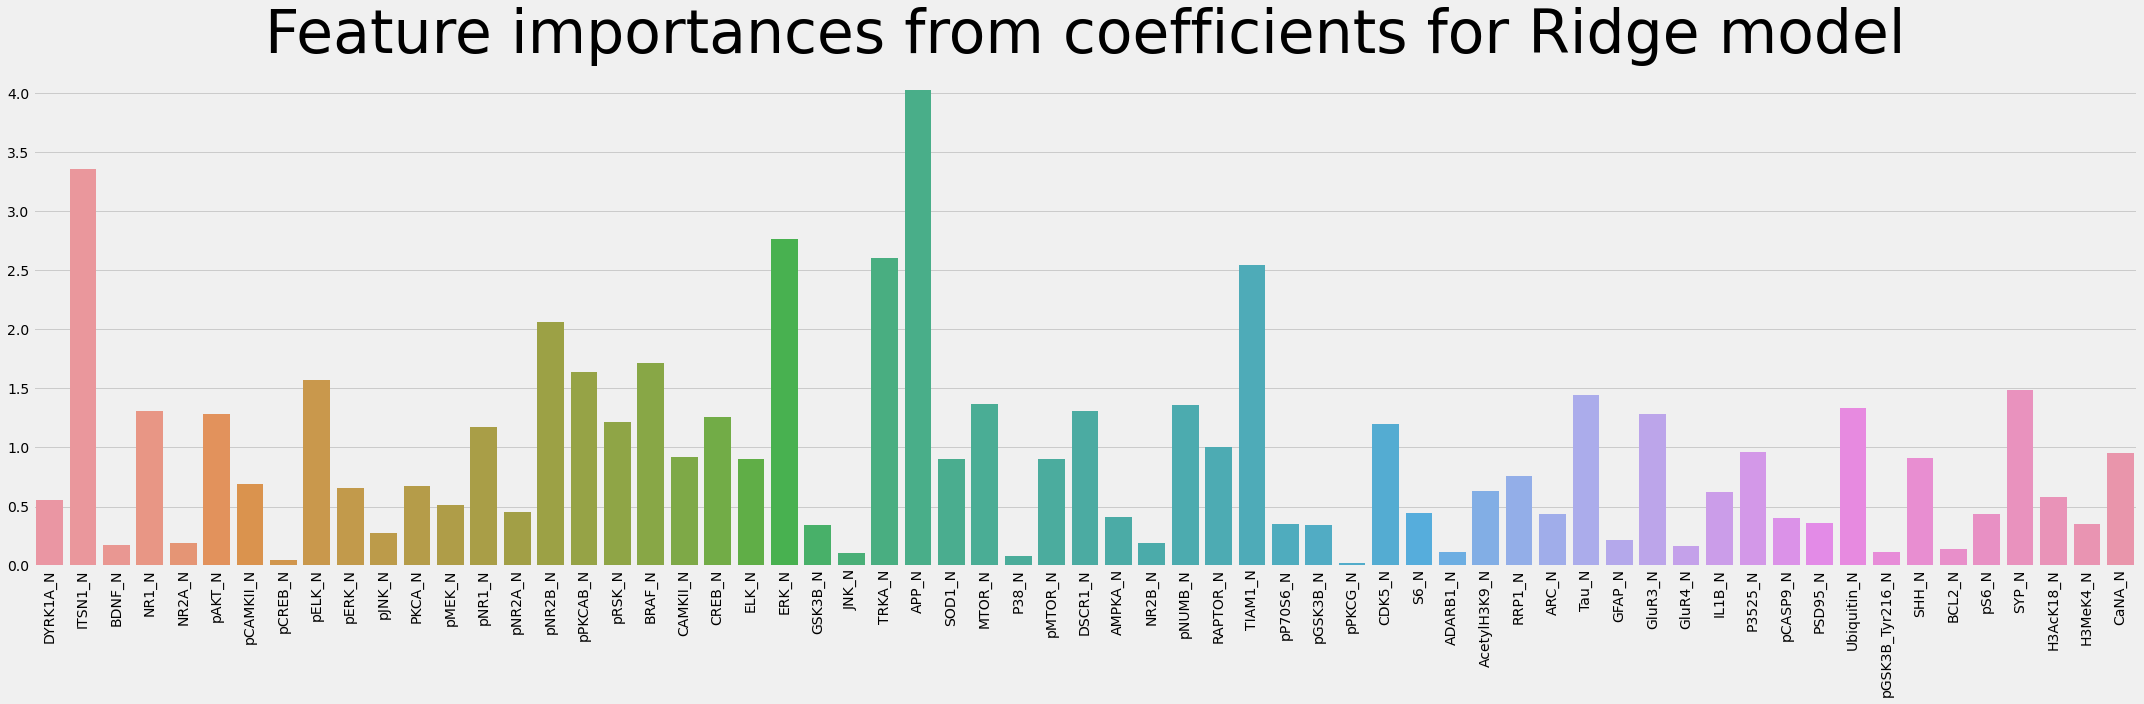

----------------------------------------------------------------------------------------------------
Time spent on Ridge: 0.164 minutes (i.e. 9.8 seconds).
____________________________________________________________________________________________________ 


Testing Elastic Net with {'penalty': ['elasticnet'], 'C': [0.001, 0.1, 1, 10, 100, 150, 1000], 'l1_ratio': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.8, 0.9], 'solver': ['saga']}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Elastic Net:
{'C': 1, 'l1_ratio': 1e-05, 'penalty': 'elasticnet', 'solver': 'saga'}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Elastic Net on train and test:
0.9759 0.9629
----------------------------------------------------------------------------------------------------
macro ROC-AUC score rounded till 4 decimals for Elastic Net on

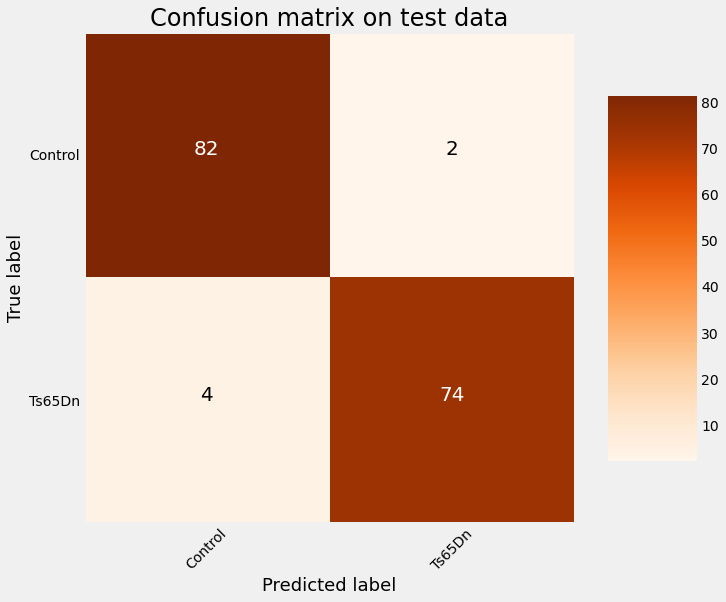

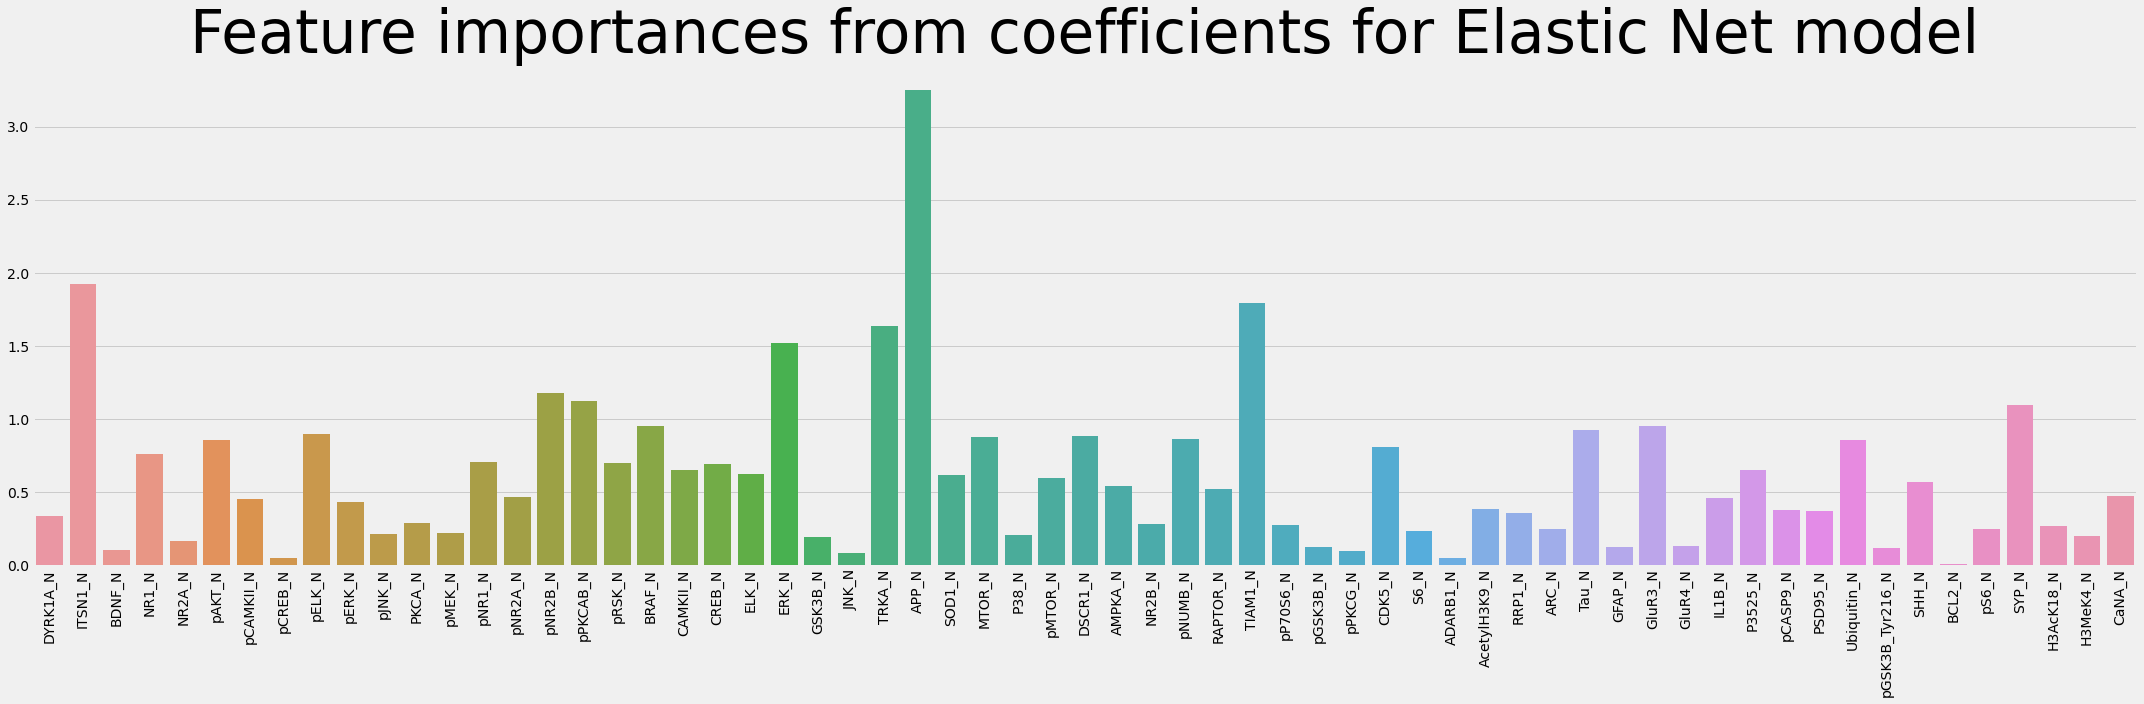

----------------------------------------------------------------------------------------------------
Time spent on Elastic Net: 0.394 minutes (i.e. 23.6 seconds).
____________________________________________________________________________________________________ 


Testing Random Forest Classifier with {'n_estimators': [1, 10, 100, 500], 'max_depth': [10, 500, 700], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12]}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Random Forest Classifier:
{'max_depth': 700, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Random Forest Classifier on train and test:
1.0 0.9814
-----------------------------------------------------------------------------------

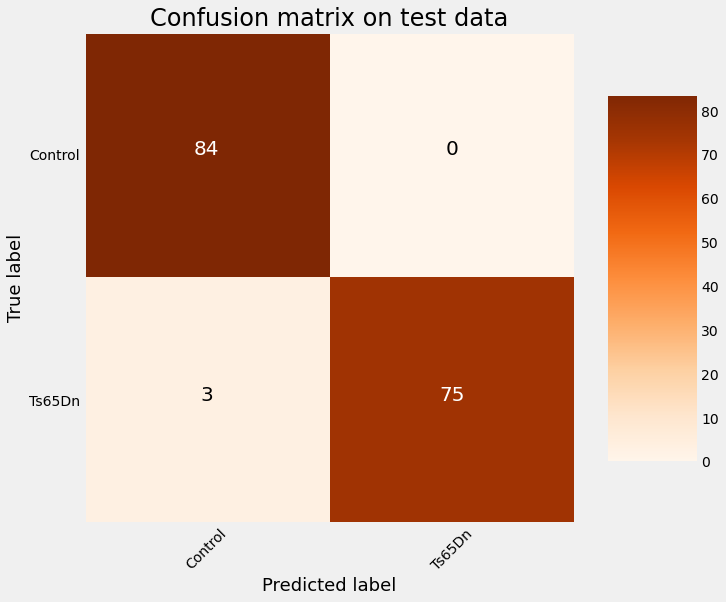

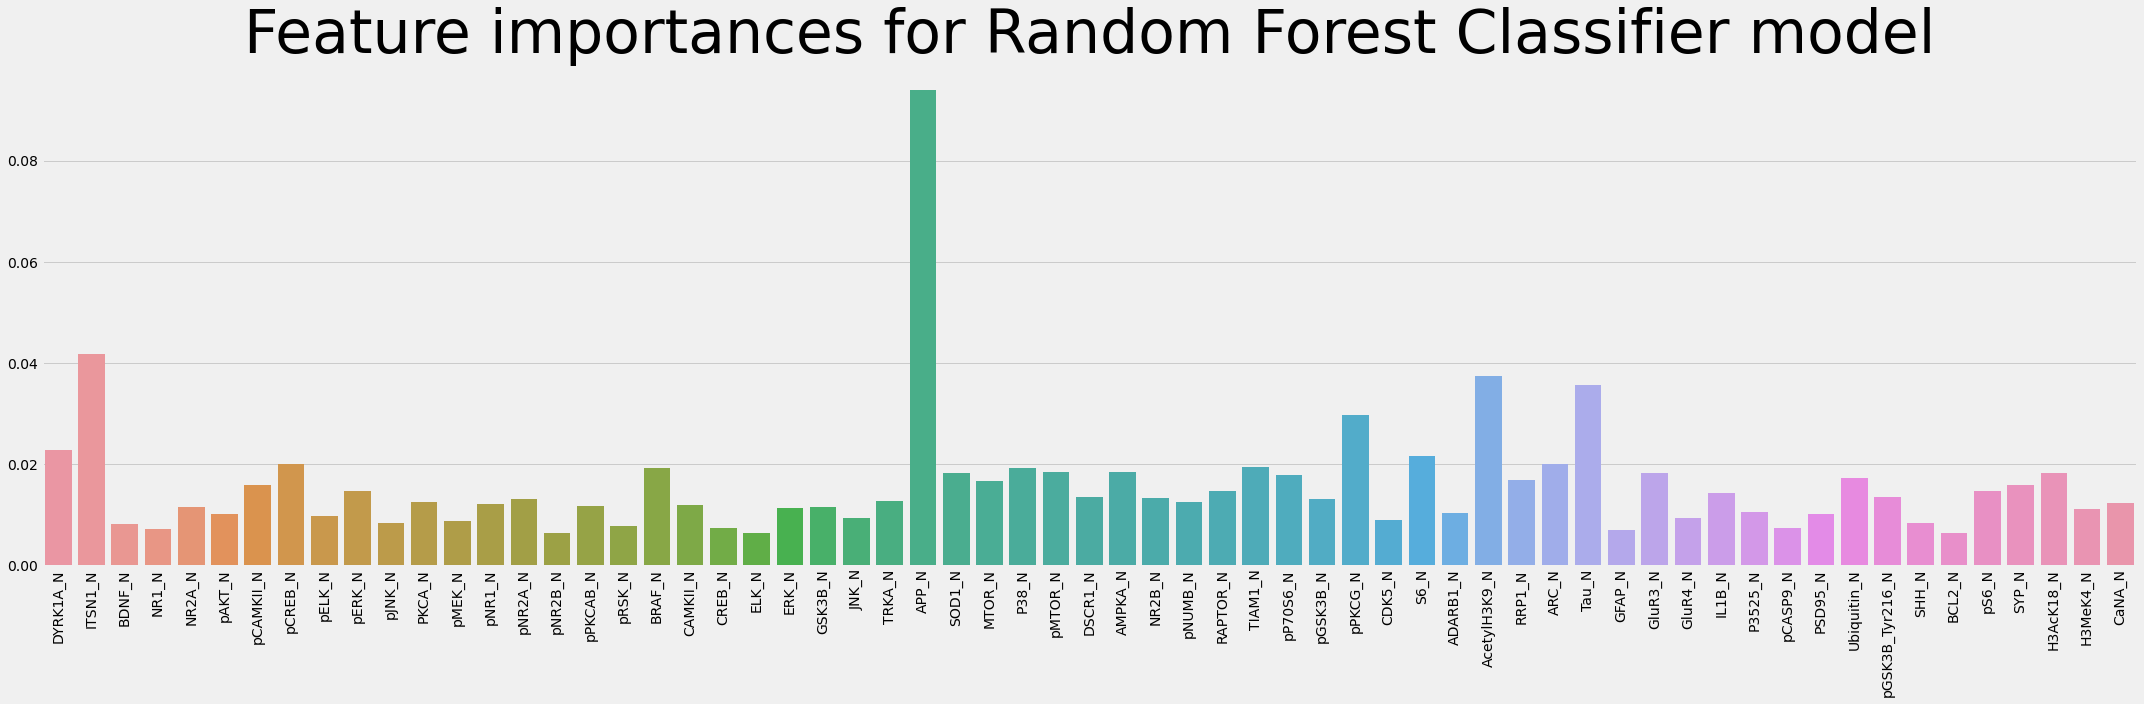

----------------------------------------------------------------------------------------------------
Time spent on Random Forest Classifier: 5.449 minutes (i.e. 326.9 seconds).
____________________________________________________________________________________________________ 


Testing Support Vector Classifier with {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 2, 3, 4], 'gamma': ['scale', 'auto'], 'C': [0.1, 1, 10, 100]}
----------------------------------------------------------------------------------------------------
Best hyperparameters for Support Vector Classifier:
{'C': 10, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
----------------------------------------------------------------------------------------------------
macro F-1 score rounded till 4 decimals for Support Vector Classifier on train and test:
1.0 0.9938
----------------------------------------------------------------------------------------------------
macro ROC-AUC score rounded till 4 decimal

F-1 score on train  ...  ROC-AUC score on test
Model name                                     ...                       
Lasso                                  0.9759  ...                 0.9560
Ridge                                  0.9792  ...                 0.9496
Elastic Net                            0.9759  ...                 0.9625
Random Forest Classifier               1.0000  ...                 0.9808
Support Vector Classifier              1.0000  ...                 0.9940

[5 rows x 4 columns]

----------------------------------------------------------------------------------------------------


 ____________________________________________________________________________________________________
Time spent on all models: 6.625 minutes (i.e. 397.5 seconds).
____________________________________________________________________________________________________


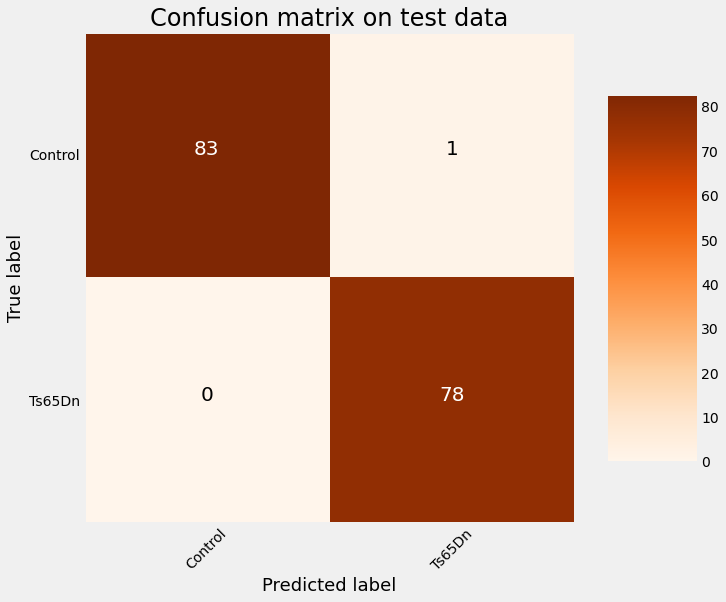

In [ ]:
test_GridSearchCV_models(models_dict=models_dict, hyperparam_grids_list=hyperparam_grids_list, 
                         X_train=reduced_accuracy_RFC_RFECV_X_train, y_train=y_train, X_test=reduced_accuracy_RFC_RFECV_X_test, y_test=y_test,
                         metric_average = 'macro', target_classes=['Control', 'Ts65Dn'])

# Credits

1. [EE 769: Module 1.2.2 - ML for Smart Monkeys](https://youtu.be/Ato-hcv0NK0?list=PLZKhx5nBXhfhL28m4mjIM5kSwh5gUV2k6)

2. Dataset source: 

Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez

Clara Higuera Department of Software Engineering and Artificial Intelligence, Faculty of Informatics and the Department of Biochemistry and Molecular Biology, Faculty of Chemistry, University Complutense, Madrid, Spain.
Email: clarahiguera '@' ucm.es

Katheleen J. Gardiner, creator and owner of the protein expression data, is currently with the Linda Crnic Institute for Down Syndrome, Department of Pediatrics, Department of Biochemistry and Molecular Genetics, Human Medical Genetics and Genomics, and Neuroscience Programs, University of Colorado, School of Medicine, Aurora, Colorado, USA.
Email: katheleen.gardiner '@' ucdenver.edu

Krzysztof J. Cios is currently with the Department of Computer Science, Virginia Commonwealth University, Richmond, Virginia, USA, and IITiS Polish Academy of Sciences, Poland.
Email: kcios '@' vcu.edu

3. Dataset citation: Higuera C, Gardiner KJ, Cios KJ (2015) Self-Organizing Feature Maps Identify Proteins Critical to Learning in a Mouse Model of Down Syndrome. PLoS ONE 10(6): e0129126. [Web Link] journal.pone.0129126

4. Dataset downloaded from: https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression

3. [Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.](https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html)

# Notes

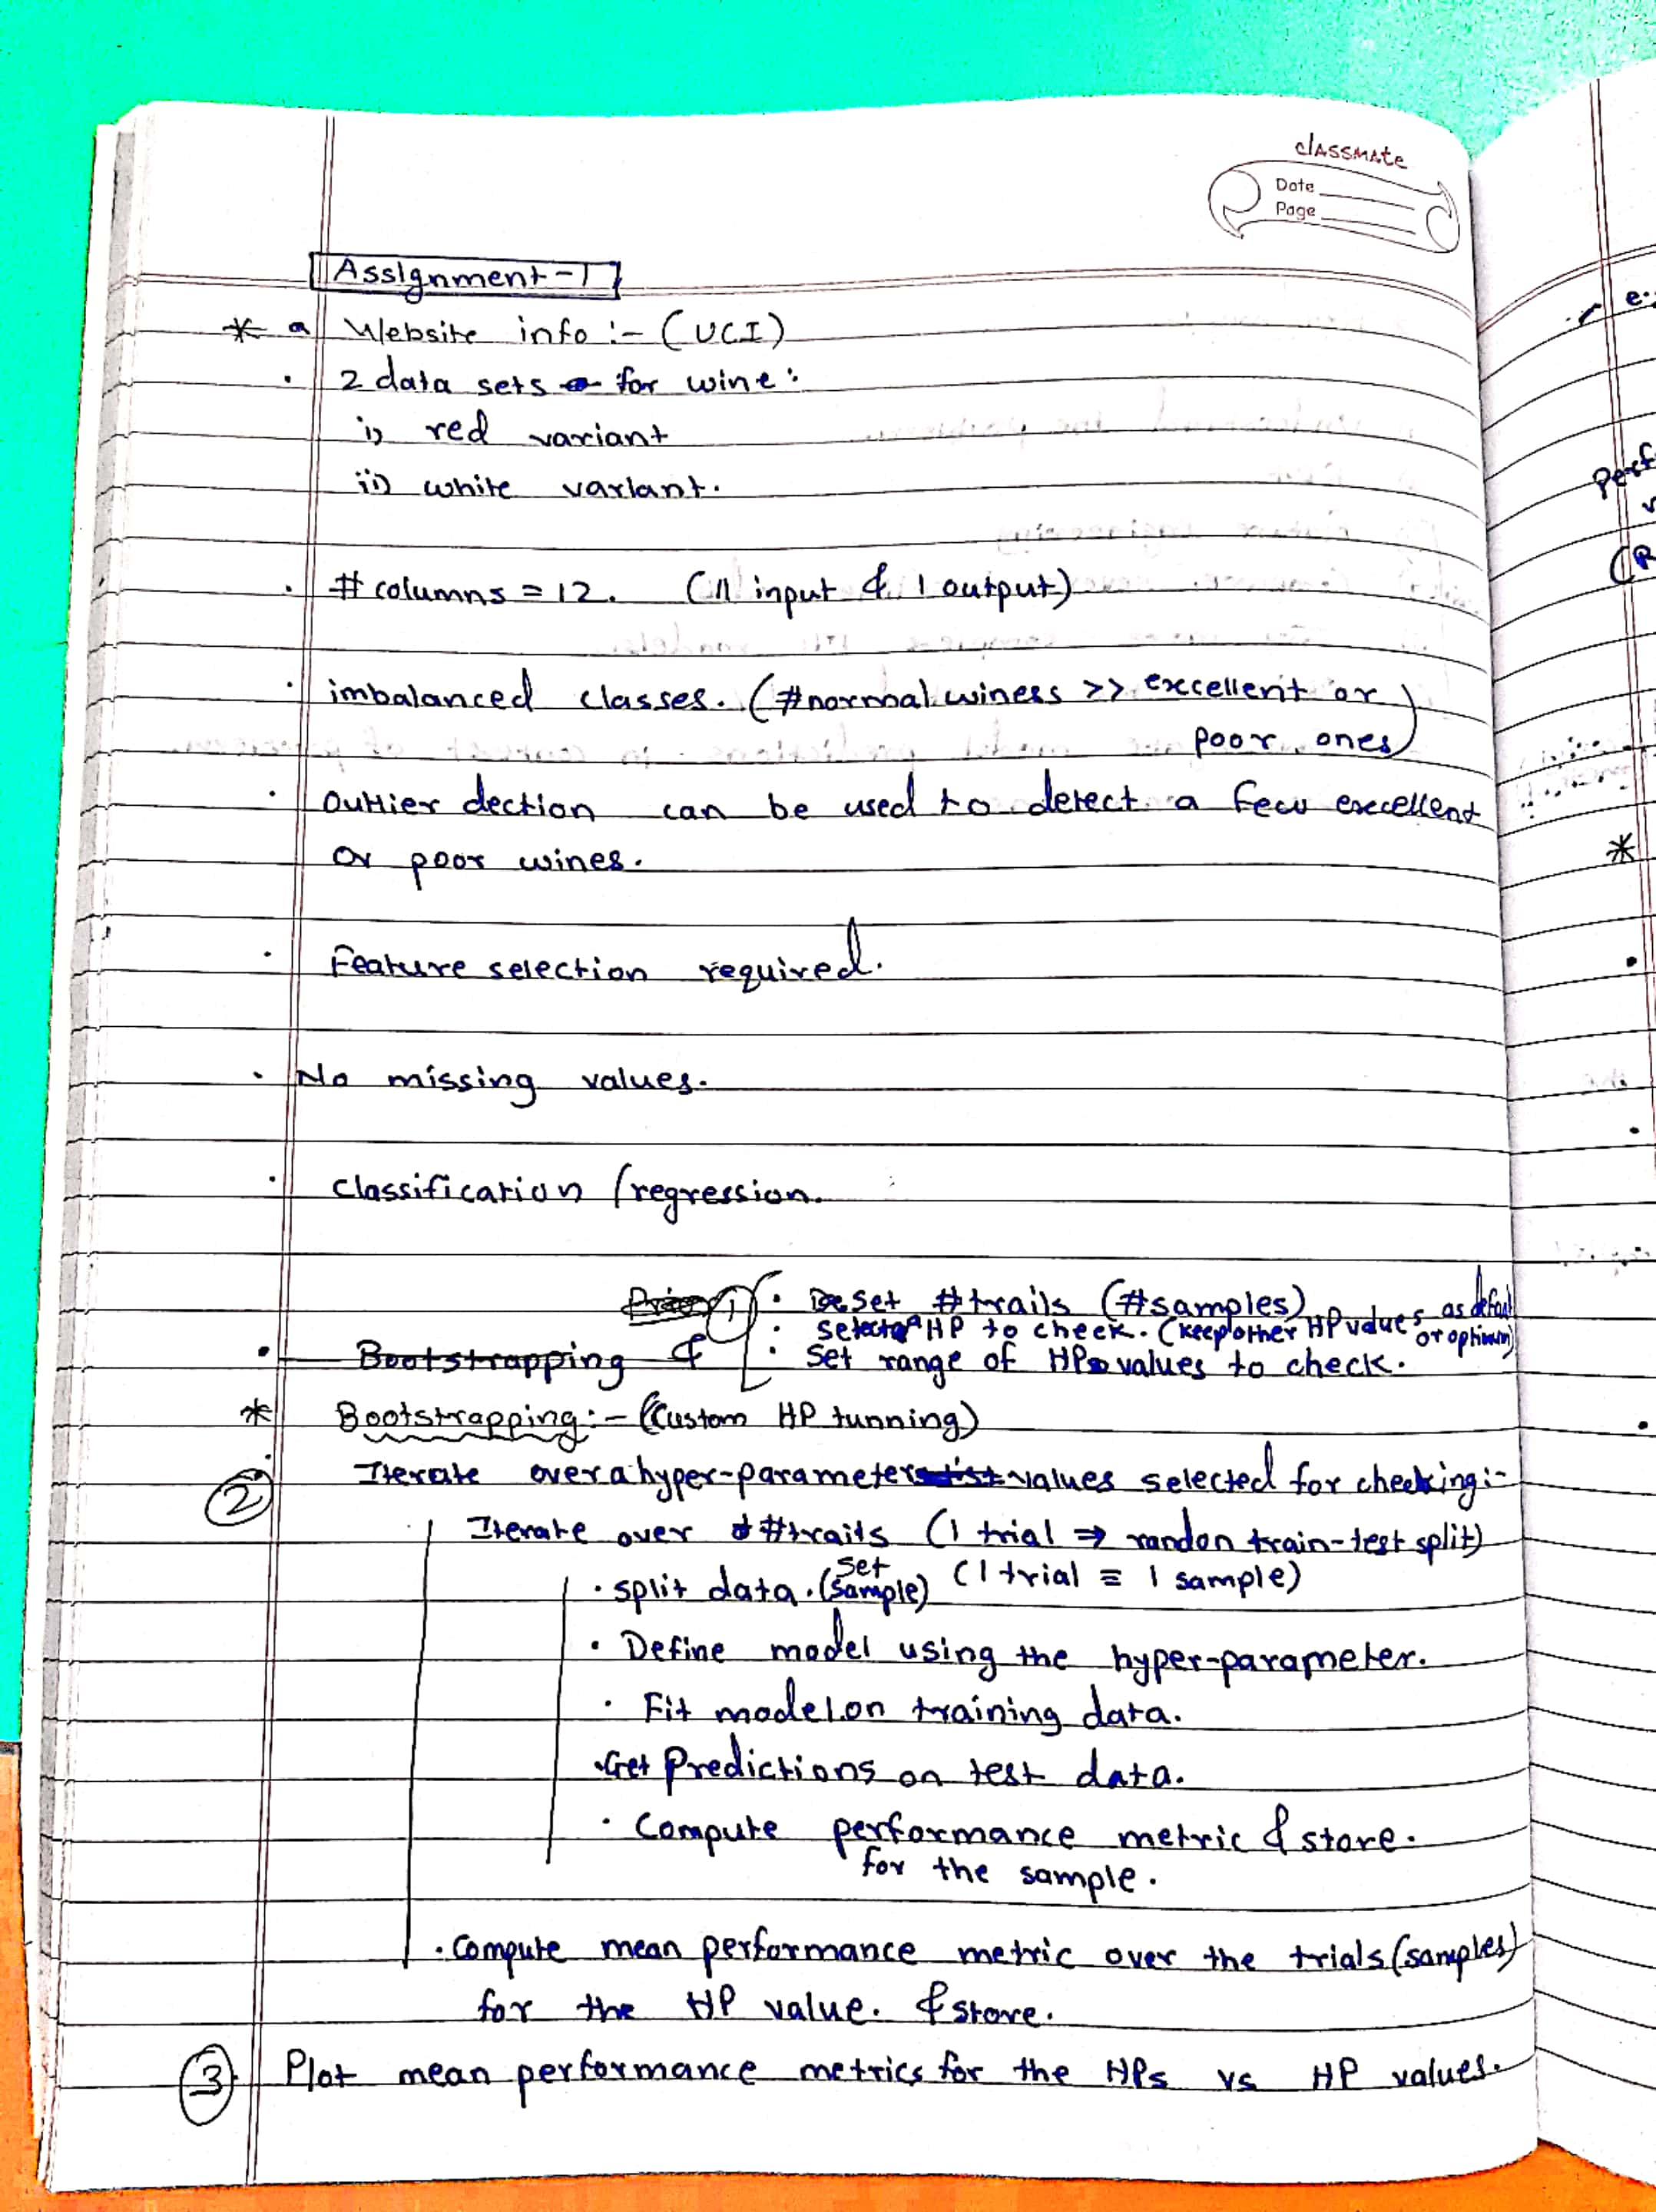

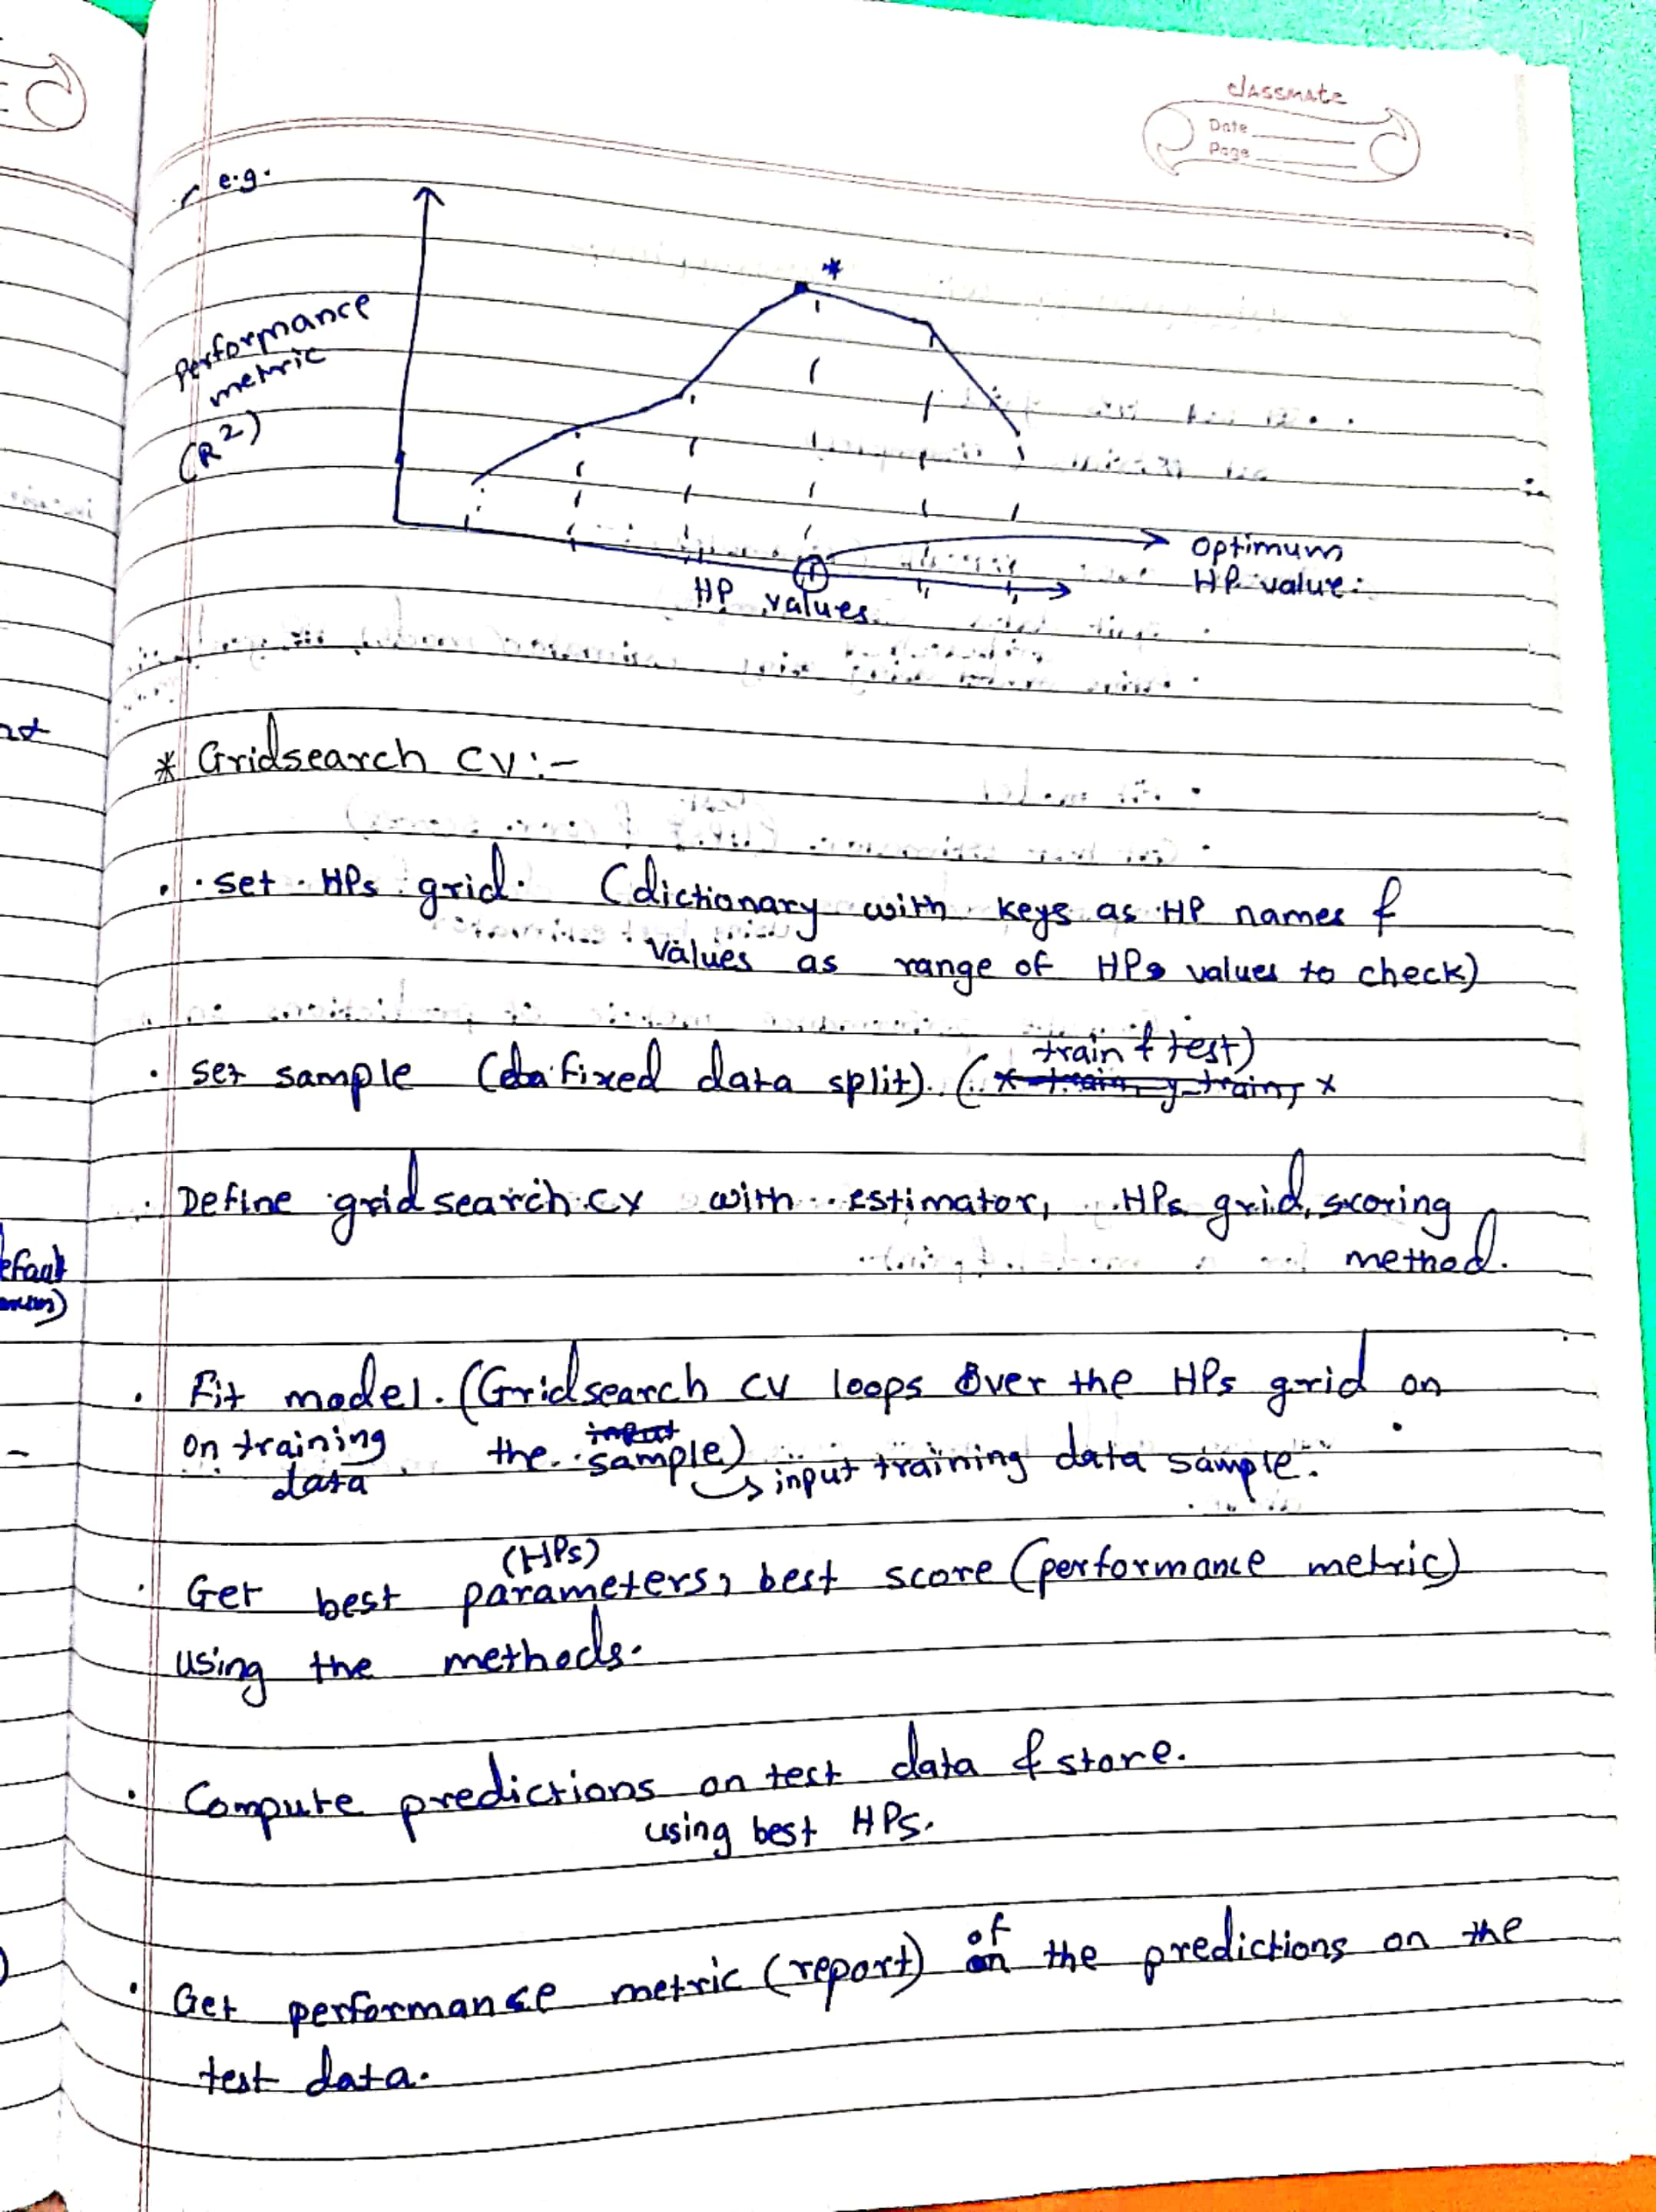

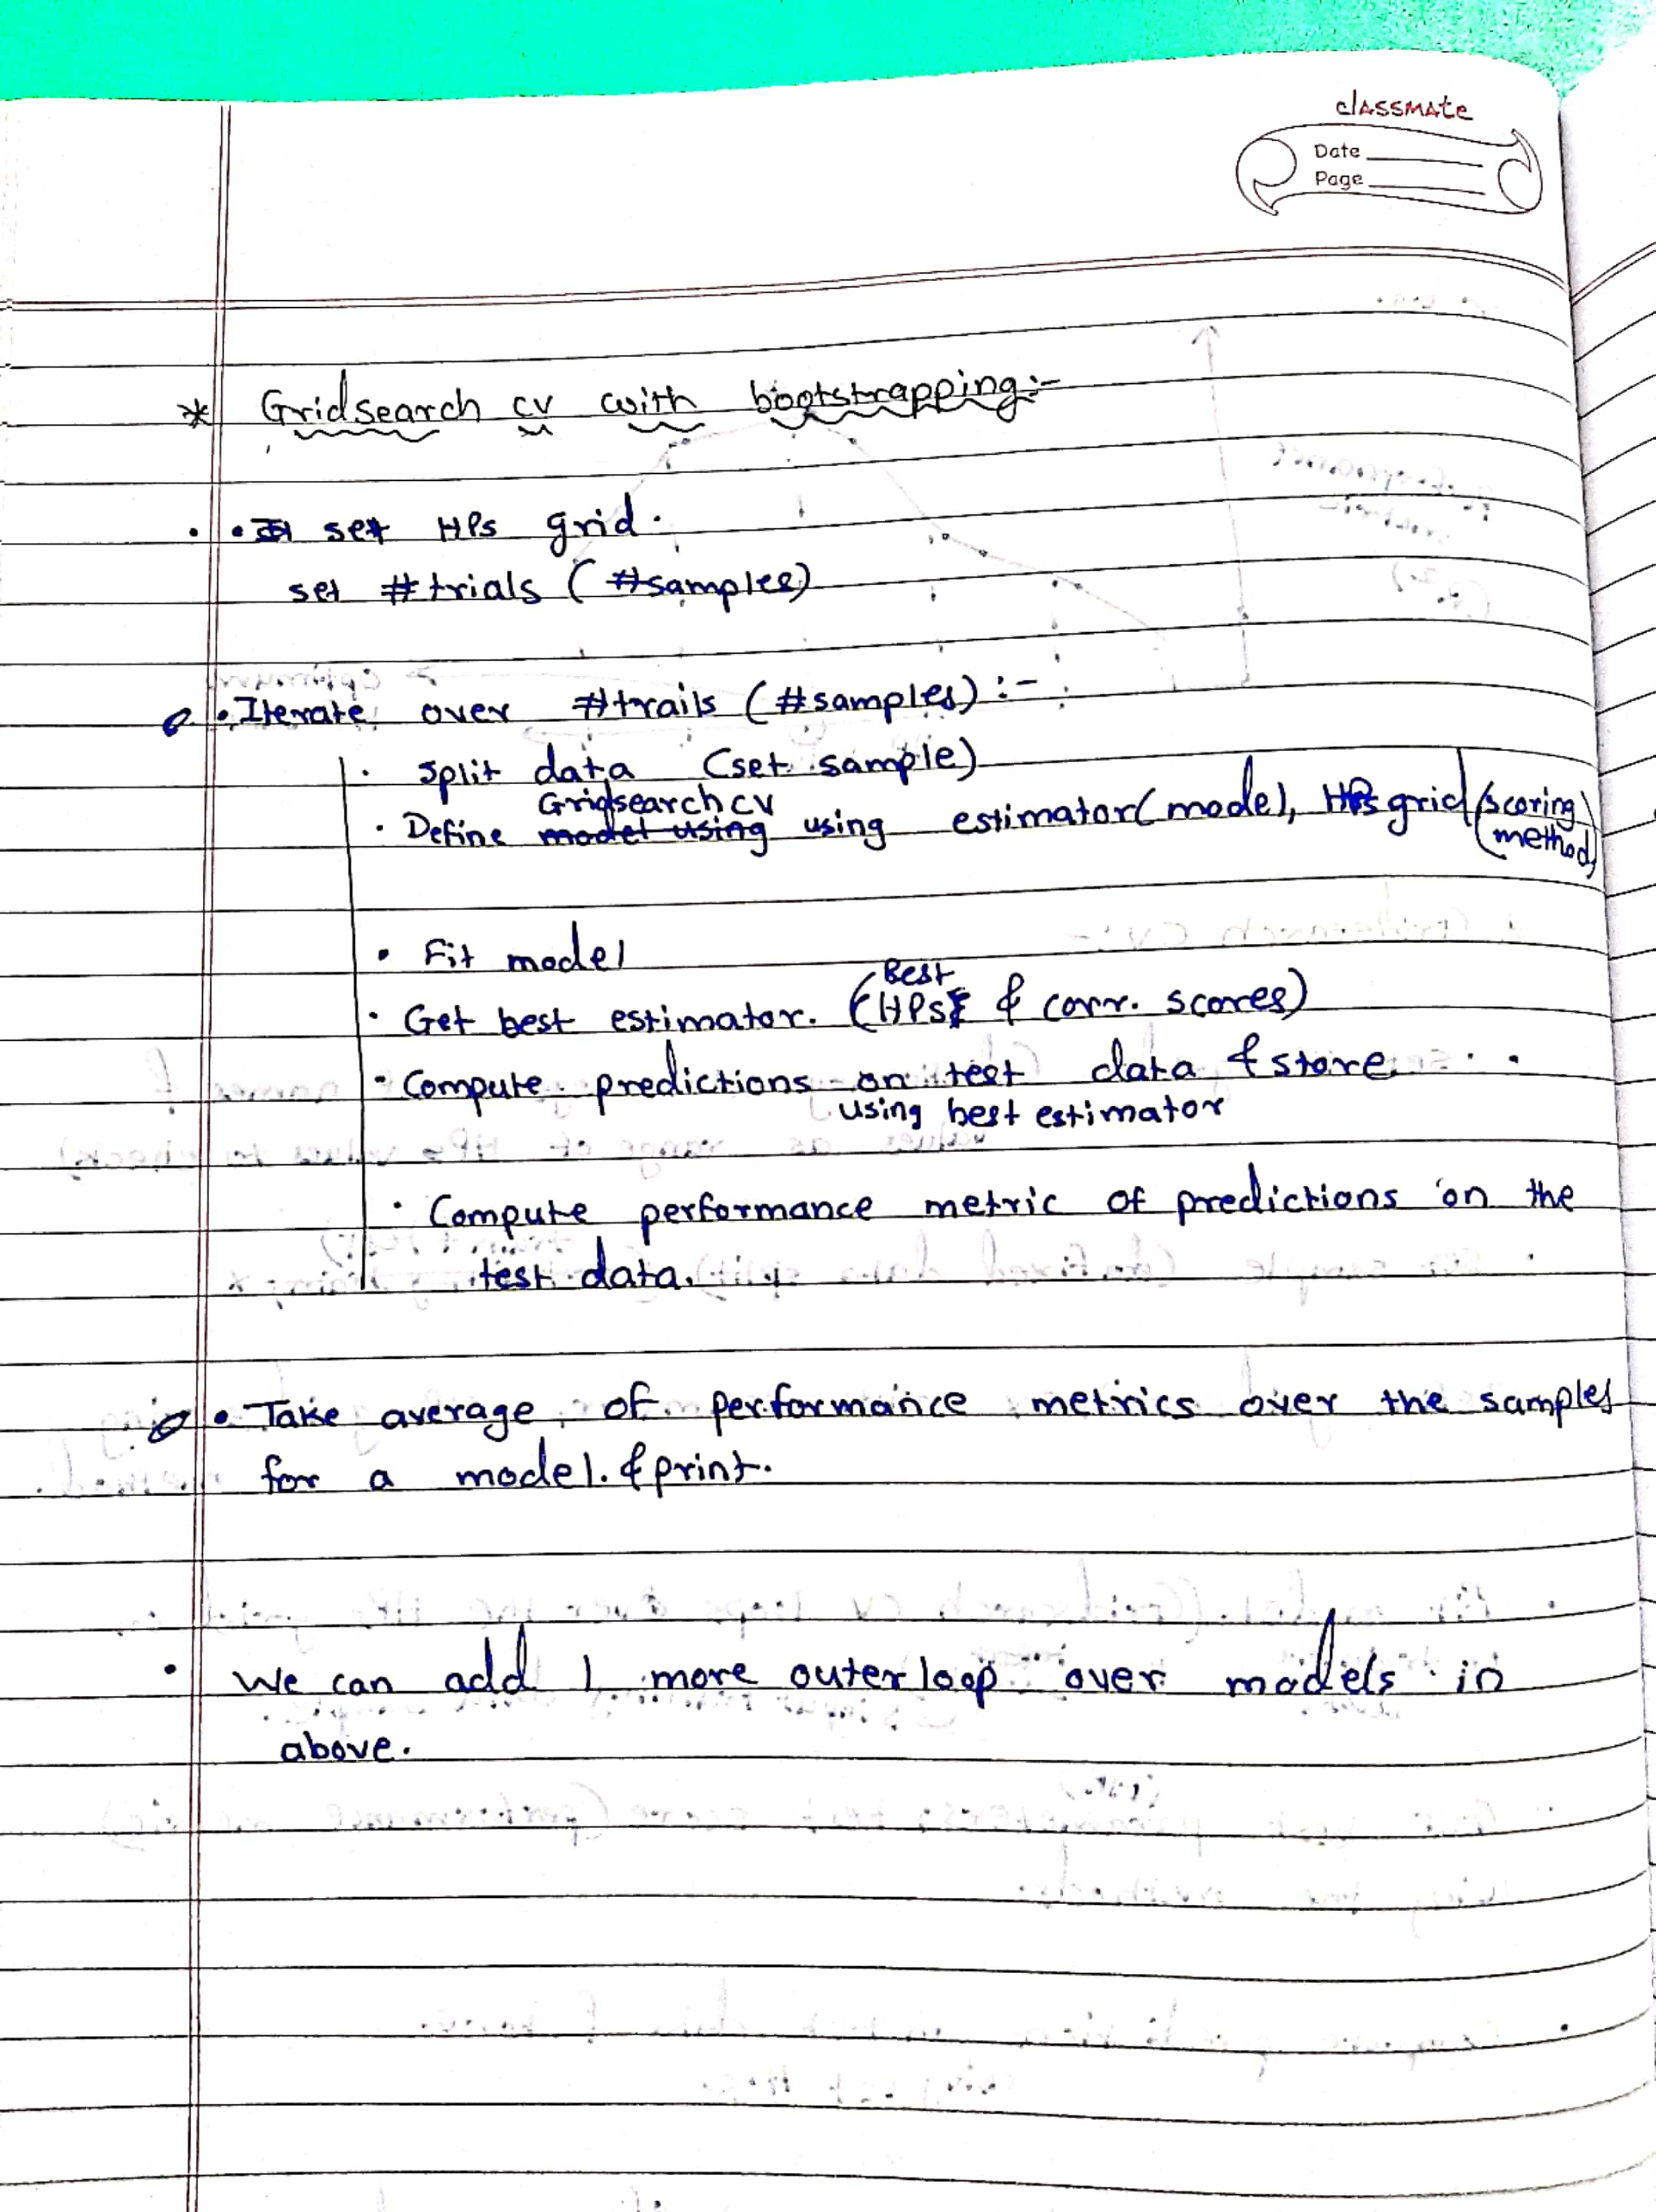

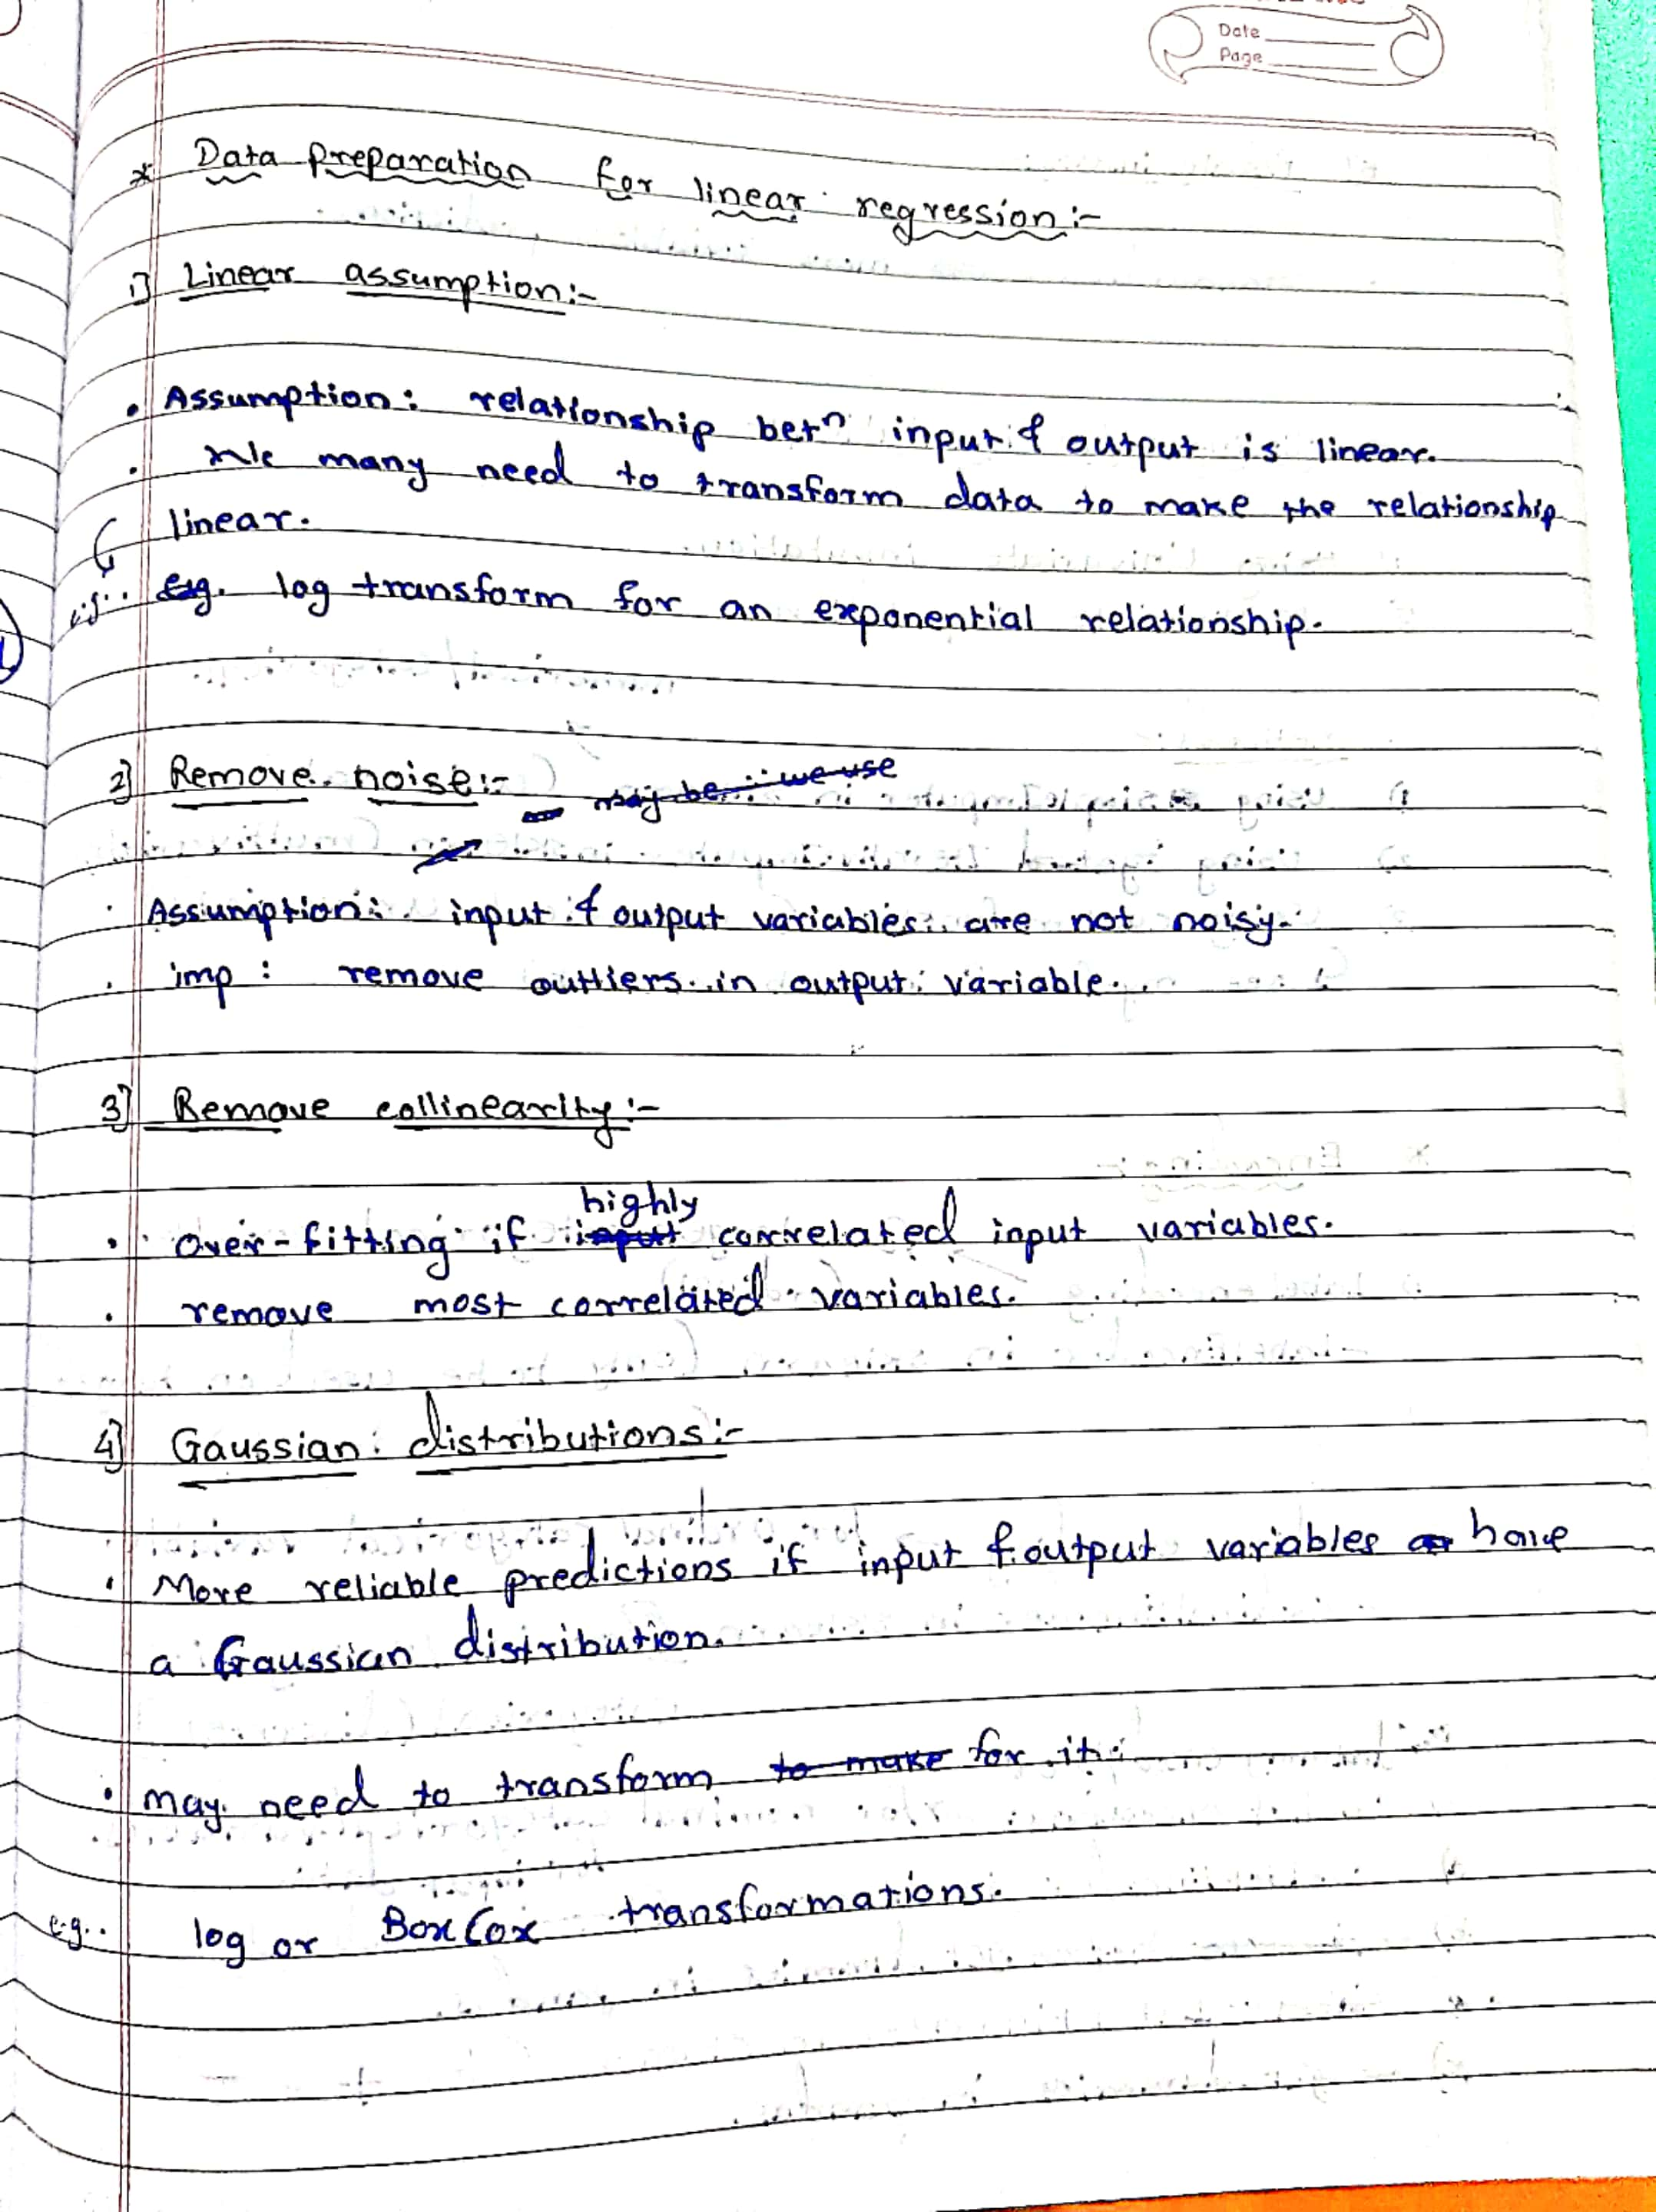

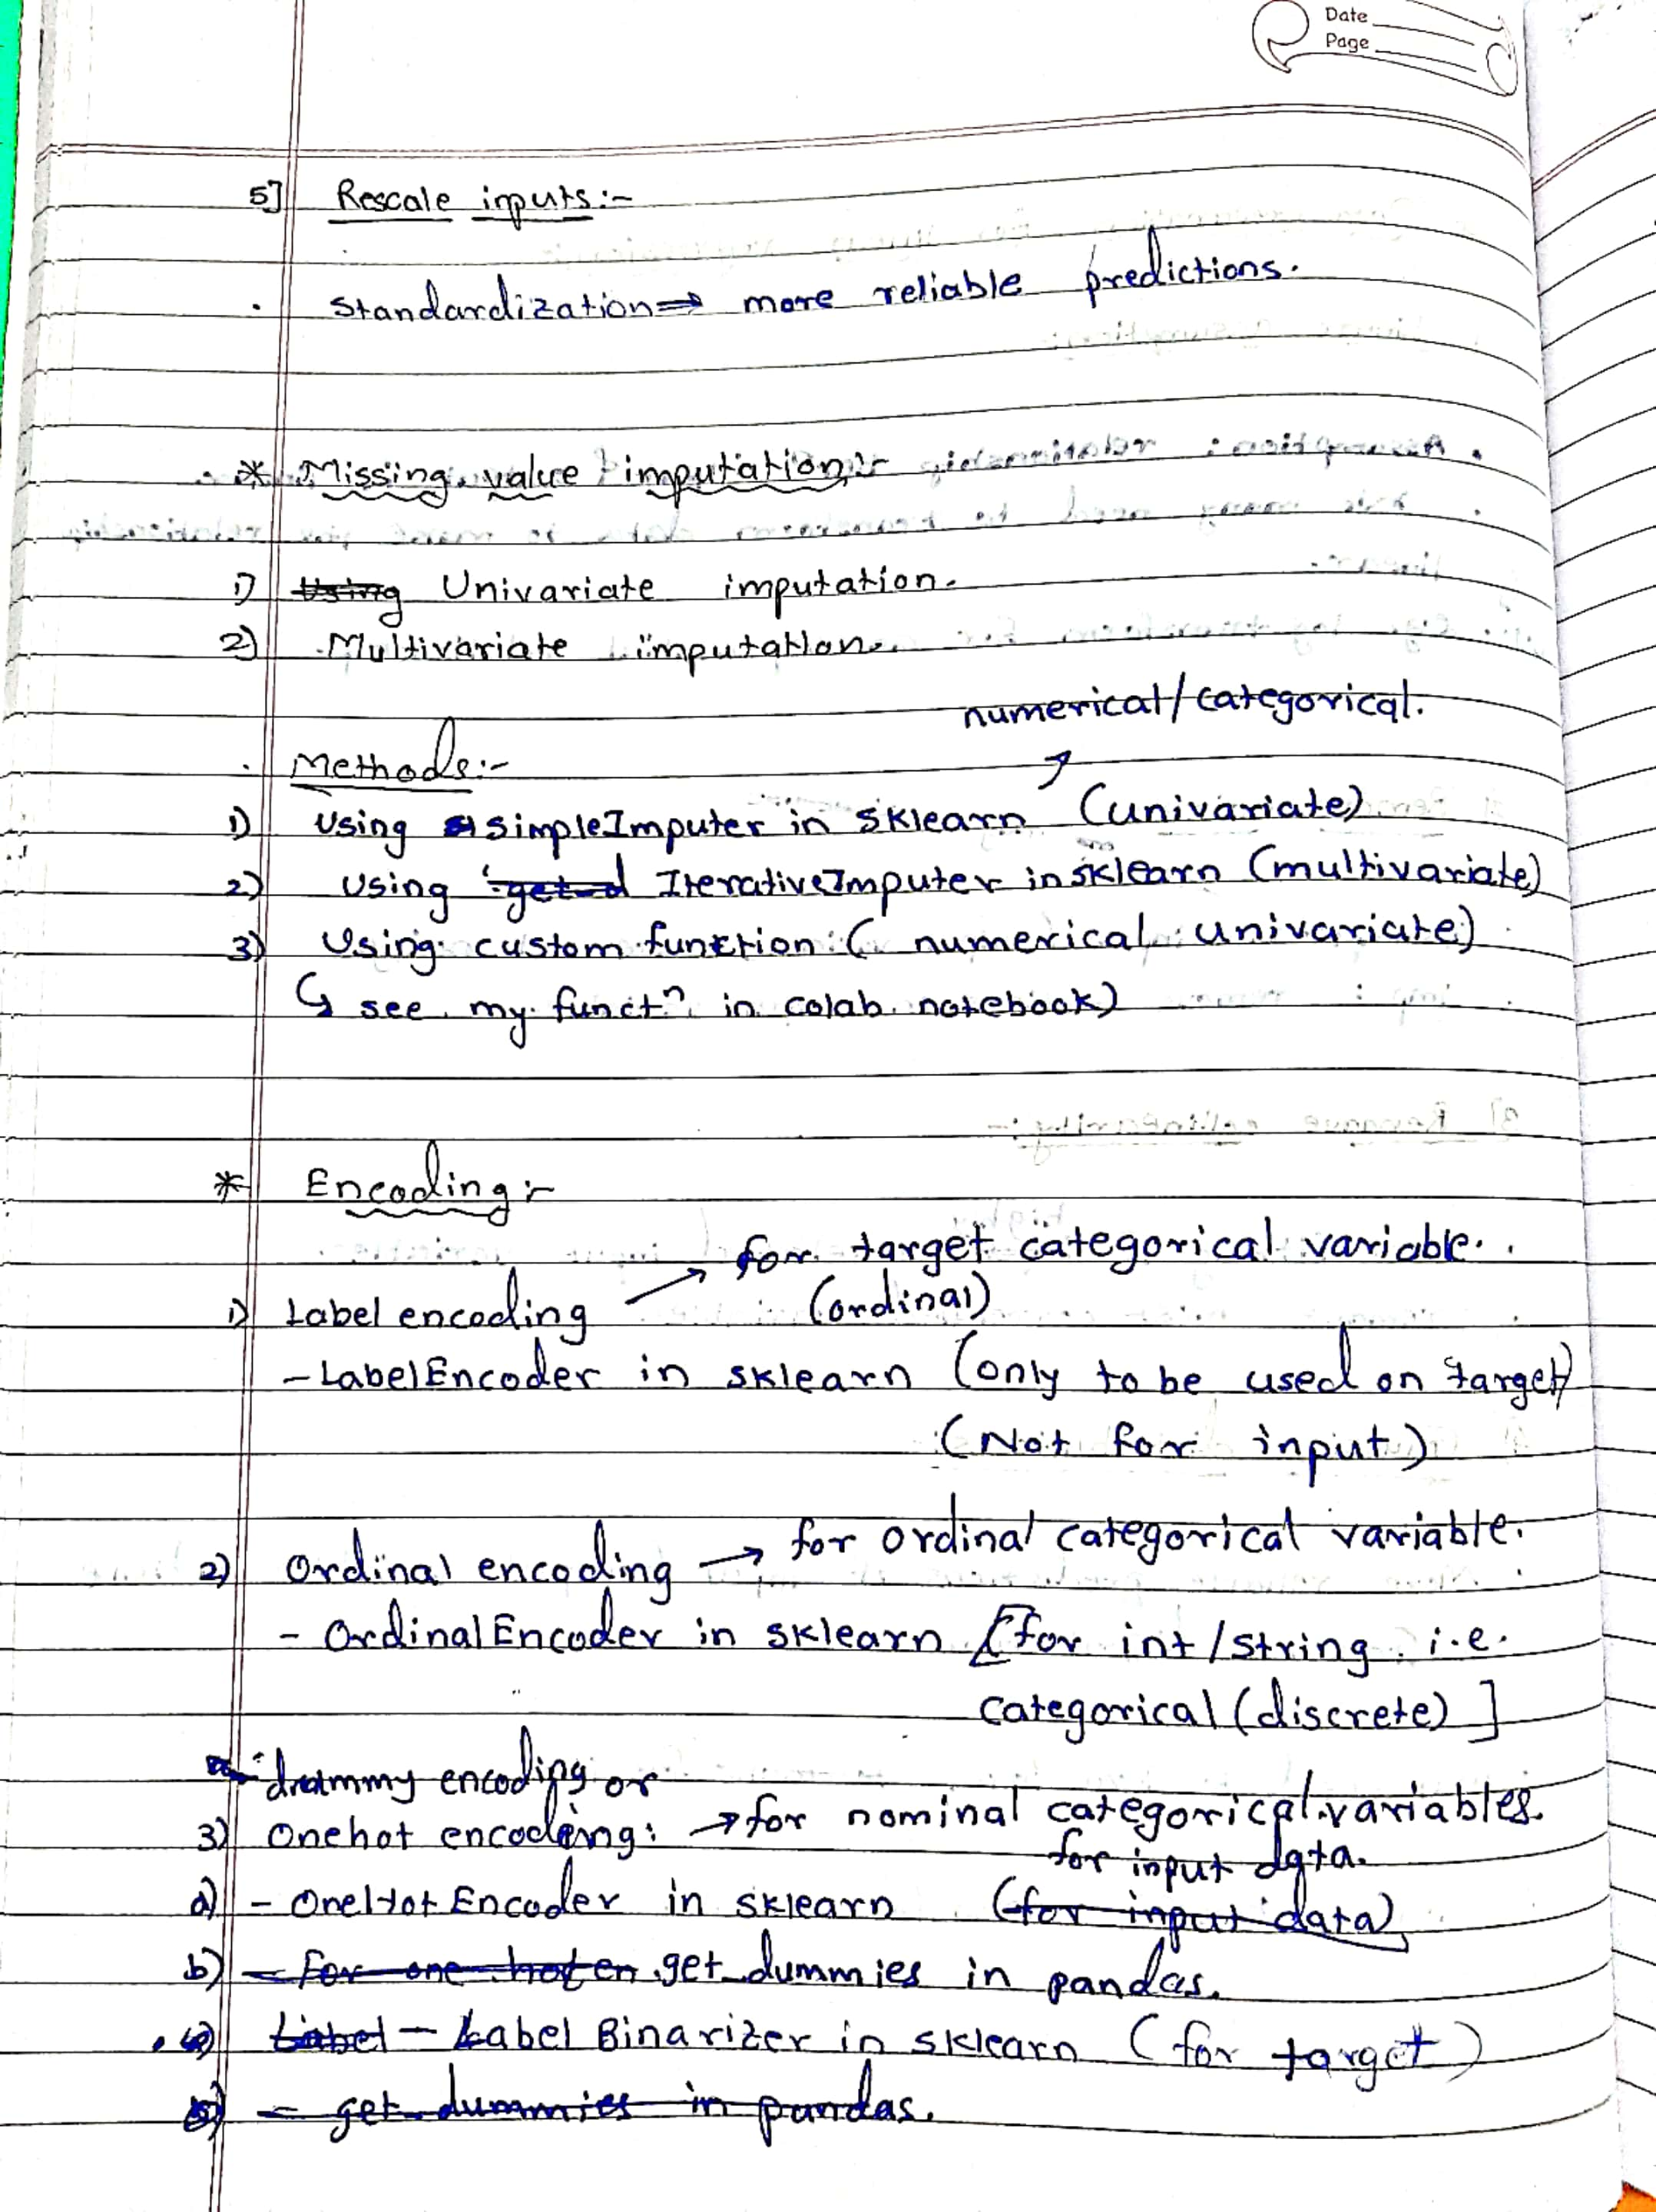